In [1]:
# Import Data Science libraries
import pandas as pd
import numpy as np
from scipy.stats import linregress
# Import Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as style
# Import requests
import requests
import json
import time
from pprint import pprint


In [2]:
# Study data files
countries_AQI_datapath = "CSV's/AQI and Lat Long of Countries.csv"
continents_datapath = "CSV's/Countries by continents.csv"
#Read in the csv
AQI_df = pd.read_csv(countries_AQI_datapath)
continents_df = pd.read_csv(continents_datapath)

In [3]:
AQI_df.head()

Country              City  AQI Value AQI Category  CO AQI Value  \
0  Russian Federation        Praskoveya         51     Moderate             1   
1              Brazil  Presidente Dutra         41         Good             1   
2              Brazil  Presidente Dutra         41         Good             1   
3               Italy   Priolo Gargallo         66     Moderate             1   
4              Poland         Przasnysz         34         Good             1   

  CO AQI Category  Ozone AQI Value Ozone AQI Category  NO2 AQI Value  \
0            Good               36               Good              0   
1            Good                5               Good              1   
2            Good                5               Good              1   
3            Good               39               Good              2   
4            Good               34               Good              0   

  NO2 AQI Category  PM2.5 AQI Value PM2.5 AQI Category      lat      lng  
0             Good               51           Moderate  44.7444  44.2031  
1             Good               41               Good  -5.2900 -44.4900  
2             Good               41               Good -11.2958 -41.9869  
3             Good               66           Moderate  37.1667  15.1833  
4             Good               20               Good  53.0167  20.8833

In [4]:
continents_df.head()

Continent   Country
0    Africa   Algeria
1    Africa    Angola
2    Africa     Benin
3    Africa  Botswana
4    Africa   Burkina

In [5]:
AQI_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16695 entries, 0 to 16694
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             16393 non-null  object 
 1   City                16695 non-null  object 
 2   AQI Value           16695 non-null  int64  
 3   AQI Category        16695 non-null  object 
 4   CO AQI Value        16695 non-null  int64  
 5   CO AQI Category     16695 non-null  object 
 6   Ozone AQI Value     16695 non-null  int64  
 7   Ozone AQI Category  16695 non-null  object 
 8   NO2 AQI Value       16695 non-null  int64  
 9   NO2 AQI Category    16695 non-null  object 
 10  PM2.5 AQI Value     16695 non-null  int64  
 11  PM2.5 AQI Category  16695 non-null  object 
 12  lat                 16695 non-null  float64
 13  lng                 16695 non-null  float64
dtypes: float64(2), int64(5), object(7)
memory usage: 1.8+ MB


In [6]:
# Dropping all rows with null countries
AQI_df.dropna(inplace=True)
AQI_df

Country              City  AQI Value AQI Category  \
0            Russian Federation        Praskoveya         51     Moderate   
1                        Brazil  Presidente Dutra         41         Good   
2                        Brazil  Presidente Dutra         41         Good   
3                         Italy   Priolo Gargallo         66     Moderate   
4                        Poland         Przasnysz         34         Good   
...                         ...               ...        ...          ...   
16690  United States of America  Highland Springs         54     Moderate   
16691                  Slovakia            Martin         71     Moderate   
16692                  Slovakia            Martin         71     Moderate   
16693                    France            Sceaux         50         Good   
16694  United States of America       Westerville         71     Moderate   

       CO AQI Value CO AQI Category  Ozone AQI Value Ozone AQI Category  \
0                 1            Good               36               Good   
1                 1            Good                5               Good   
2                 1            Good                5               Good   
3                 1            Good               39               Good   
4                 1            Good               34               Good   
...             ...             ...              ...                ...   
16690             1            Good               34               Good   
16691             1            Good               39               Good   
16692             1            Good               39               Good   
16693             1            Good               20               Good   
16694             1            Good               44               Good   

       NO2 AQI Value NO2 AQI Category  PM2.5 AQI Value PM2.5 AQI Category  \
0                  0             Good               51           Moderate   
1                  1             Good               41               Good   
2                  1             Good               41               Good   
3                  2             Good               66           Moderate   
4                  0             Good               20               Good   
...              ...              ...              ...                ...   
16690              5             Good               54           Moderate   
16691              1             Good               71           Moderate   
16692              1             Good               71           Moderate   
16693              5             Good               50               Good   
16694              2             Good               71           Moderate   

           lat      lng  
0      44.7444  44.2031  
1      -5.2900 -44.4900  
2     -11.2958 -41.9869  
3      37.1667  15.1833  
4      53.0167  20.8833  
...        ...      ...  
16690  37.5516 -77.3285  
16691  49.0650  18.9219  
16692  36.3385 -88.8513  
16693  48.7786   2.2906  
16694  40.1241 -82.9210  

[16393 rows x 14 columns]

In [7]:
AQI_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16393 entries, 0 to 16694
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             16393 non-null  object 
 1   City                16393 non-null  object 
 2   AQI Value           16393 non-null  int64  
 3   AQI Category        16393 non-null  object 
 4   CO AQI Value        16393 non-null  int64  
 5   CO AQI Category     16393 non-null  object 
 6   Ozone AQI Value     16393 non-null  int64  
 7   Ozone AQI Category  16393 non-null  object 
 8   NO2 AQI Value       16393 non-null  int64  
 9   NO2 AQI Category    16393 non-null  object 
 10  PM2.5 AQI Value     16393 non-null  int64  
 11  PM2.5 AQI Category  16393 non-null  object 
 12  lat                 16393 non-null  float64
 13  lng                 16393 non-null  float64
dtypes: float64(2), int64(5), object(7)
memory usage: 1.9+ MB


In [8]:
# Dropping duplicate cities
duplicates = AQI_df[AQI_df.duplicated(subset=['City','Country'])]
duplicates

Country              City  AQI Value AQI Category  \
2                        Brazil  Presidente Dutra         41         Good   
6      United States of America       Punta Gorda         54     Moderate   
21     United States of America           Pontiac         77     Moderate   
34     United States of America            Dayton         45         Good   
35     United States of America            Dayton         45         Good   
...                         ...               ...        ...          ...   
16647  United States of America            Salina         51     Moderate   
16672  United States of America             Union         51     Moderate   
16673  United States of America             Union         51     Moderate   
16685                  Colombia           Viterbo         55     Moderate   
16692                  Slovakia            Martin         71     Moderate   

       CO AQI Value CO AQI Category  Ozone AQI Value Ozone AQI Category  \
2                 1            Good                5               Good   
6                 1            Good               14               Good   
21                2            Good               22               Good   
34                1            Good               32               Good   
35                1            Good               32               Good   
...             ...             ...              ...                ...   
16647             1            Good               34               Good   
16672             1            Good               47               Good   
16673             1            Good               47               Good   
16685             1            Good               24               Good   
16692             1            Good               39               Good   

       NO2 AQI Value NO2 AQI Category  PM2.5 AQI Value PM2.5 AQI Category  \
2                  1             Good               41               Good   
6                 11             Good               54           Moderate   
21                15             Good               77           Moderate   
34                 7             Good               45               Good   
35                 7             Good               45               Good   
...              ...              ...              ...                ...   
16647              1             Good               51           Moderate   
16672              2             Good               51           Moderate   
16673              2             Good               51           Moderate   
16685              0             Good               55           Moderate   
16692              1             Good               71           Moderate   

           lat       lng  
2     -11.2958  -41.9869  
6      26.8941  -82.0513  
21     40.8894  -88.6409  
34     39.2592 -119.5653  
35     30.0315  -94.9158  
...        ...       ...  
16647  43.1023  -76.1768  
16672  42.1258  -76.0329  
16673  38.4399  -90.9927  
16685   5.0667  -75.8833  
16692  36.3385  -88.8513  

[2437 rows x 14 columns]

In [9]:
AQI_df_clean = AQI_df.drop_duplicates(subset=["City", "Country"], keep="first")
AQI_df_clean

Country              City  AQI Value AQI Category  \
0            Russian Federation        Praskoveya         51     Moderate   
1                        Brazil  Presidente Dutra         41         Good   
3                         Italy   Priolo Gargallo         66     Moderate   
4                        Poland         Przasnysz         34         Good   
5      United States of America       Punta Gorda         54     Moderate   
...                         ...               ...        ...          ...   
16689                     China          Shaoguan        160    Unhealthy   
16690  United States of America  Highland Springs         54     Moderate   
16691                  Slovakia            Martin         71     Moderate   
16693                    France            Sceaux         50         Good   
16694  United States of America       Westerville         71     Moderate   

       CO AQI Value CO AQI Category  Ozone AQI Value Ozone AQI Category  \
0                 1            Good               36               Good   
1                 1            Good                5               Good   
3                 1            Good               39               Good   
4                 1            Good               34               Good   
5                 1            Good               14               Good   
...             ...             ...              ...                ...   
16689             3            Good              160          Unhealthy   
16690             1            Good               34               Good   
16691             1            Good               39               Good   
16693             1            Good               20               Good   
16694             1            Good               44               Good   

       NO2 AQI Value NO2 AQI Category  PM2.5 AQI Value PM2.5 AQI Category  \
0                  0             Good               51           Moderate   
1                  1             Good               41               Good   
3                  2             Good               66           Moderate   
4                  0             Good               20               Good   
5                 11             Good               54           Moderate   
...              ...              ...              ...                ...   
16689              1             Good               79           Moderate   
16690              5             Good               54           Moderate   
16691              1             Good               71           Moderate   
16693              5             Good               50               Good   
16694              2             Good               71           Moderate   

           lat       lng  
0      44.7444   44.2031  
1      -5.2900  -44.4900  
3      37.1667   15.1833  
4      53.0167   20.8833  
5      16.1005  -88.8074  
...        ...       ...  
16689  24.8011  113.5927  
16690  37.5516  -77.3285  
16691  49.0650   18.9219  
16693  48.7786    2.2906  
16694  40.1241  -82.9210  

[13956 rows x 14 columns]

In [10]:
continents_df.head()

Continent   Country
0    Africa   Algeria
1    Africa    Angola
2    Africa     Benin
3    Africa  Botswana
4    Africa   Burkina

In [11]:
continents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Continent  196 non-null    object
 1   Country    196 non-null    object
dtypes: object(2)
memory usage: 3.2+ KB


In [12]:
AQI_df_clean = AQI_df_clean.rename(columns={
    'AQI Value':'Air_Quality_Value',
    'AQI Category':'Air_Quality_Category',
    'CO AQI Value':'CO_AQI_Value',
    'CO AQI Category':'CO_AQI_Category',
    'Ozone AQI Value':'Ozone_AQI_Value',
    'Ozone AQI Category':'Ozone_AQI_Category',
    'NO2 AQI Value':'NO2_AQI_Value',
    'NO2 AQI Category':'NO2_AQI_Category',
    'PM2.5 AQI Value':'PM2.5_AQI_Value',
    'PM2.5 AQI Category':'PM2.5_AQI_Category',
    'lat': 'Latitude',
    'lng': 'Longitude'
})

In [13]:
AQI_df_clean.head()

Country              City  Air_Quality_Value  \
0        Russian Federation        Praskoveya                 51   
1                    Brazil  Presidente Dutra                 41   
3                     Italy   Priolo Gargallo                 66   
4                    Poland         Przasnysz                 34   
5  United States of America       Punta Gorda                 54   

  Air_Quality_Category  CO_AQI_Value CO_AQI_Category  Ozone_AQI_Value  \
0             Moderate             1            Good               36   
1                 Good             1            Good                5   
3             Moderate             1            Good               39   
4                 Good             1            Good               34   
5             Moderate             1            Good               14   

  Ozone_AQI_Category  NO2_AQI_Value NO2_AQI_Category  PM2.5_AQI_Value  \
0               Good              0             Good               51   
1               Good              1             Good               41   
3               Good              2             Good               66   
4               Good              0             Good               20   
5               Good             11             Good               54   

  PM2.5_AQI_Category  Latitude  Longitude  
0           Moderate   44.7444    44.2031  
1               Good   -5.2900   -44.4900  
3           Moderate   37.1667    15.1833  
4               Good   53.0167    20.8833  
5           Moderate   16.1005   -88.8074

In [14]:
# Dictionary for standardizing country names
standard_country_names = {
    'United States of America': 'United States',
    'Russian Federation': 'Russia',
    'United Kingdom of Great Britain and Northern Ireland':'United Kingdom',
    'Viet Nam': 'Vietnam',
    'Myanmar':'Burma (Myanmar)',
    'United Republic of Tanzania':'Tanzania',
    'Democratic Republic of the Congo':'Congo',
    'Bolivia(Plurinational State of)':'Bolivia',
    'Venezuela(Bolivarian Republic of)':'Venezuela',
    'Burkina Faso':'Burkina',
    "Côte d'Ivoire" : 'Ivory Coast',
    'Iran (Islamic Republic of)' : 'Iran',
    'Cabo Verde' : 'Cape Verde',
    'Republic of North Macedonia' : 'Macedonia',
    'North Macedonia' : 'Macedonia',
    'Republic of Moldova' : 'Moldova',
    "Lao People's Democratic Republic" : 'Laos',
    'State of Palestine' : 'Palestine',
    'Syrian Arab Republic' : 'Syria',
    'Kingdom of Eswatini' :'Swaziland',
    'Eswatini' :'Swaziland',
    'Republic of Korea':'South Korea',
    'Aruba' : 'Aruba',
    'State of Palestine': 'Palestine',
    'Palestine': 'Palestine'
    # Add more mappings if needed
}
# Apply the mapping to DataFrames to standardize country names
AQI_df_clean['Country'] = AQI_df_clean['Country'].map(standard_country_names).fillna(AQI_df_clean['Country'])

In [15]:
AQI_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13956 entries, 0 to 16694
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               13956 non-null  object 
 1   City                  13956 non-null  object 
 2   Air_Quality_Value     13956 non-null  int64  
 3   Air_Quality_Category  13956 non-null  object 
 4   CO_AQI_Value          13956 non-null  int64  
 5   CO_AQI_Category       13956 non-null  object 
 6   Ozone_AQI_Value       13956 non-null  int64  
 7   Ozone_AQI_Category    13956 non-null  object 
 8   NO2_AQI_Value         13956 non-null  int64  
 9   NO2_AQI_Category      13956 non-null  object 
 10  PM2.5_AQI_Value       13956 non-null  int64  
 11  PM2.5_AQI_Category    13956 non-null  object 
 12  Latitude              13956 non-null  float64
 13  Longitude             13956 non-null  float64
dtypes: float64(2), int64(5), object(7)
memory usage: 1.6+ MB


In [16]:
cities_continents_merged = AQI_df_clean.merge(continents_df, on='Country', how='left')
cities_continents_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13956 entries, 0 to 13955
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               13956 non-null  object 
 1   City                  13956 non-null  object 
 2   Air_Quality_Value     13956 non-null  int64  
 3   Air_Quality_Category  13956 non-null  object 
 4   CO_AQI_Value          13956 non-null  int64  
 5   CO_AQI_Category       13956 non-null  object 
 6   Ozone_AQI_Value       13956 non-null  int64  
 7   Ozone_AQI_Category    13956 non-null  object 
 8   NO2_AQI_Value         13956 non-null  int64  
 9   NO2_AQI_Category      13956 non-null  object 
 10  PM2.5_AQI_Value       13956 non-null  int64  
 11  PM2.5_AQI_Category    13956 non-null  object 
 12  Latitude              13956 non-null  float64
 13  Longitude             13956 non-null  float64
 14  Continent             13878 non-null  object 
dtypes: float64(2), int6

In [17]:
cities_continents_merged

Country              City  Air_Quality_Value  \
0             Russia        Praskoveya                 51   
1             Brazil  Presidente Dutra                 41   
2              Italy   Priolo Gargallo                 66   
3             Poland         Przasnysz                 34   
4      United States       Punta Gorda                 54   
...              ...               ...                ...   
13951          China          Shaoguan                160   
13952  United States  Highland Springs                 54   
13953       Slovakia            Martin                 71   
13954         France            Sceaux                 50   
13955  United States       Westerville                 71   

      Air_Quality_Category  CO_AQI_Value CO_AQI_Category  Ozone_AQI_Value  \
0                 Moderate             1            Good               36   
1                     Good             1            Good                5   
2                 Moderate             1            Good               39   
3                     Good             1            Good               34   
4                 Moderate             1            Good               14   
...                    ...           ...             ...              ...   
13951            Unhealthy             3            Good              160   
13952             Moderate             1            Good               34   
13953             Moderate             1            Good               39   
13954                 Good             1            Good               20   
13955             Moderate             1            Good               44   

      Ozone_AQI_Category  NO2_AQI_Value NO2_AQI_Category  PM2.5_AQI_Value  \
0                   Good              0             Good               51   
1                   Good              1             Good               41   
2                   Good              2             Good               66   
3                   Good              0             Good               20   
4                   Good             11             Good               54   
...                  ...            ...              ...              ...   
13951          Unhealthy              1             Good               79   
13952               Good              5             Good               54   
13953               Good              1             Good               71   
13954               Good              5             Good               50   
13955               Good              2             Good               71   

      PM2.5_AQI_Category  Latitude  Longitude      Continent  
0               Moderate   44.7444    44.2031           Asia  
1                   Good   -5.2900   -44.4900  South America  
2               Moderate   37.1667    15.1833         Europe  
3                   Good   53.0167    20.8833         Europe  
4               Moderate   16.1005   -88.8074  North America  
...                  ...       ...        ...            ...  
13951           Moderate   24.8011   113.5927           Asia  
13952           Moderate   37.5516   -77.3285  North America  
13953           Moderate   49.0650    18.9219         Europe  
13954               Good   48.7786     2.2906         Europe  
13955           Moderate   40.1241   -82.9210  North America  

[13956 rows x 15 columns]

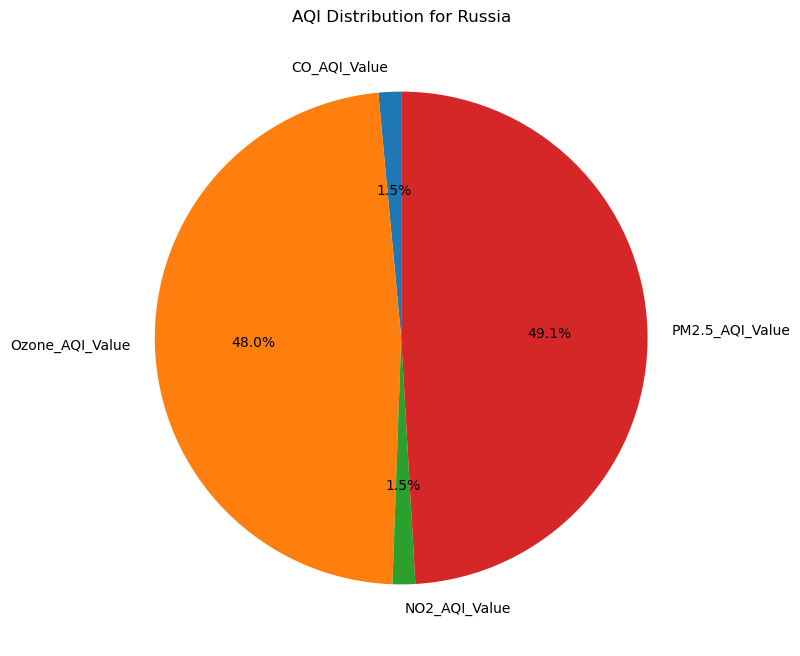

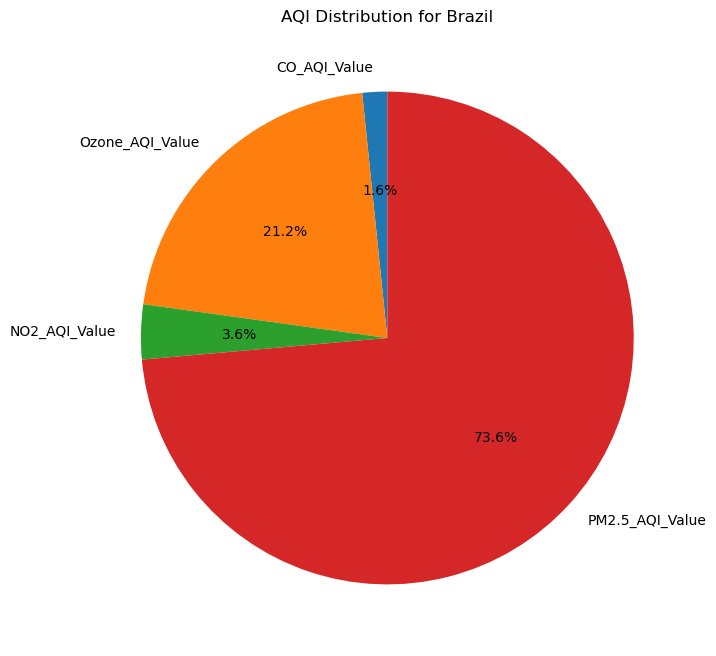

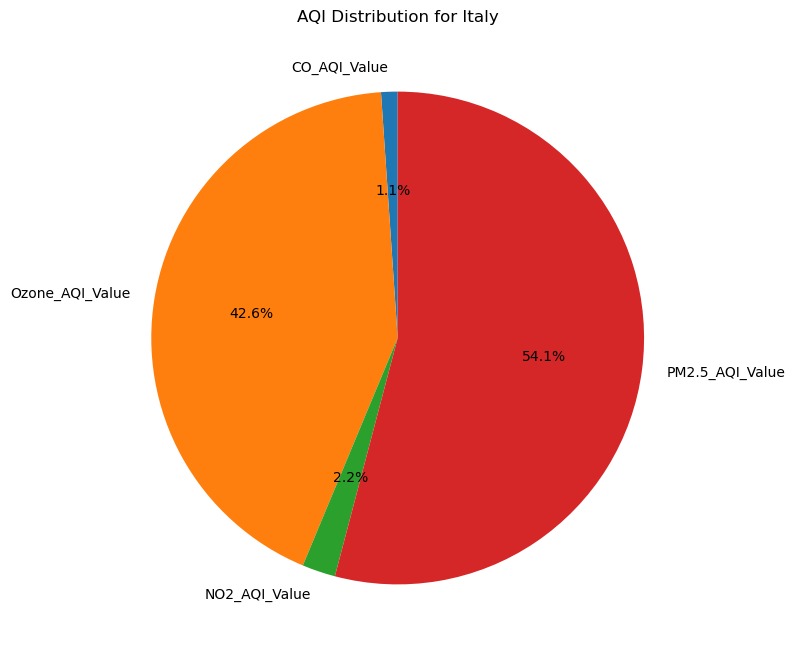

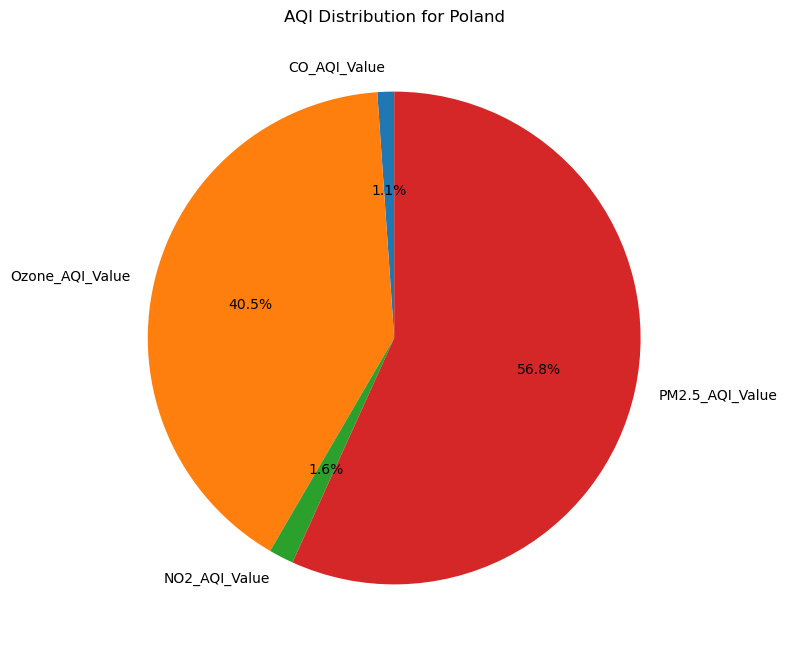

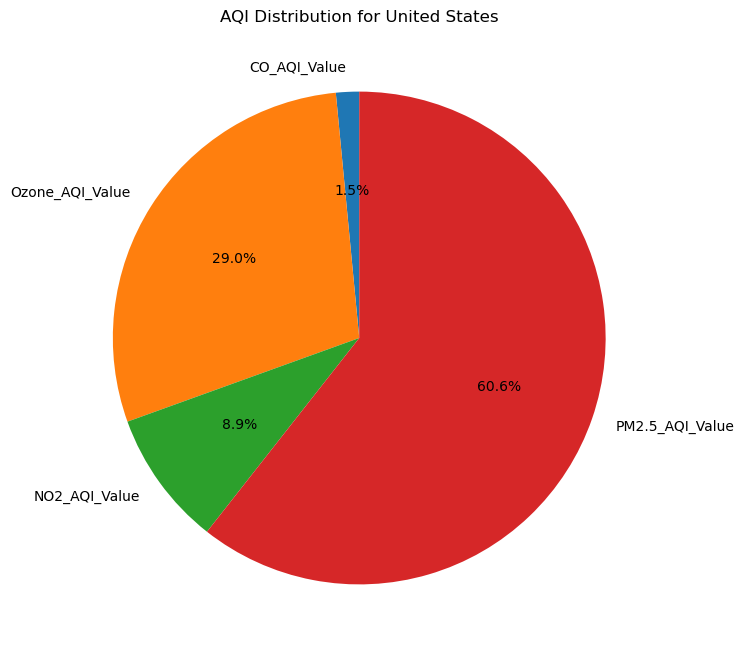

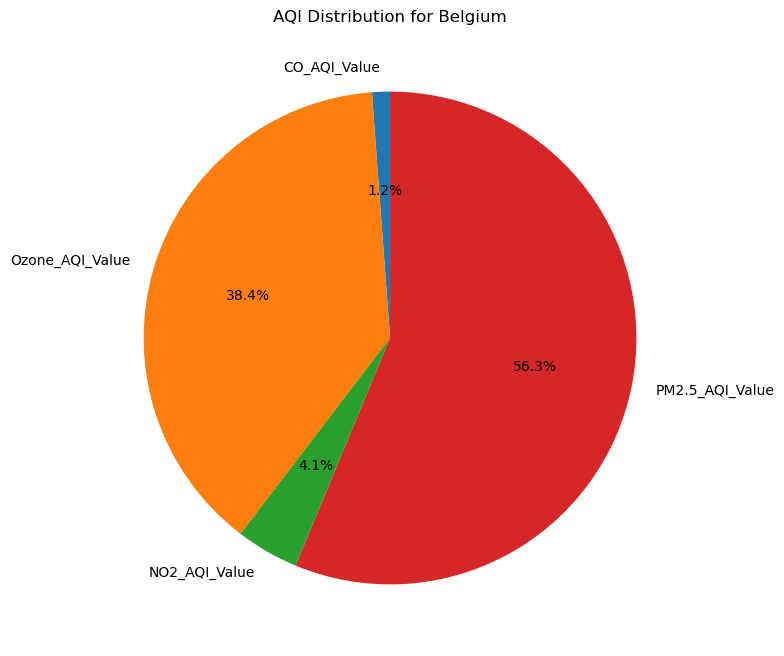

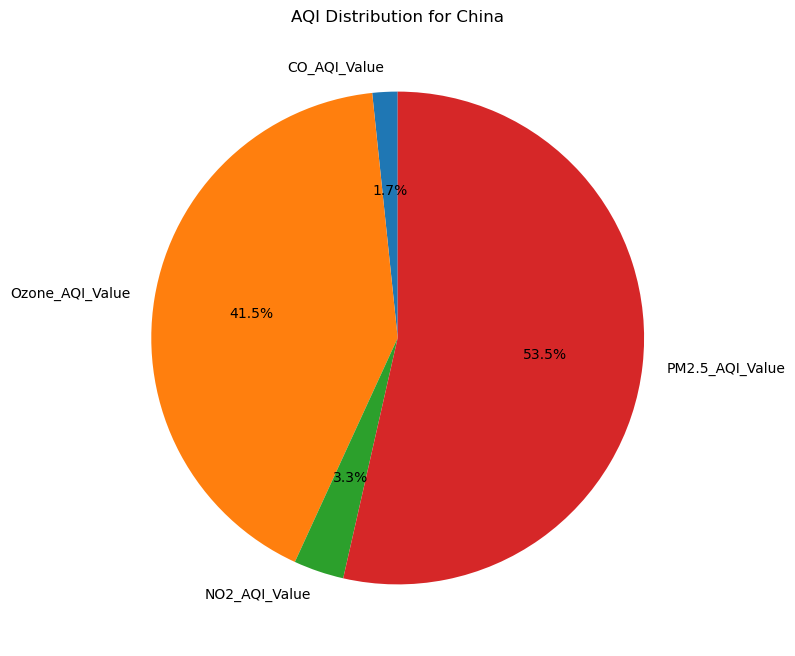

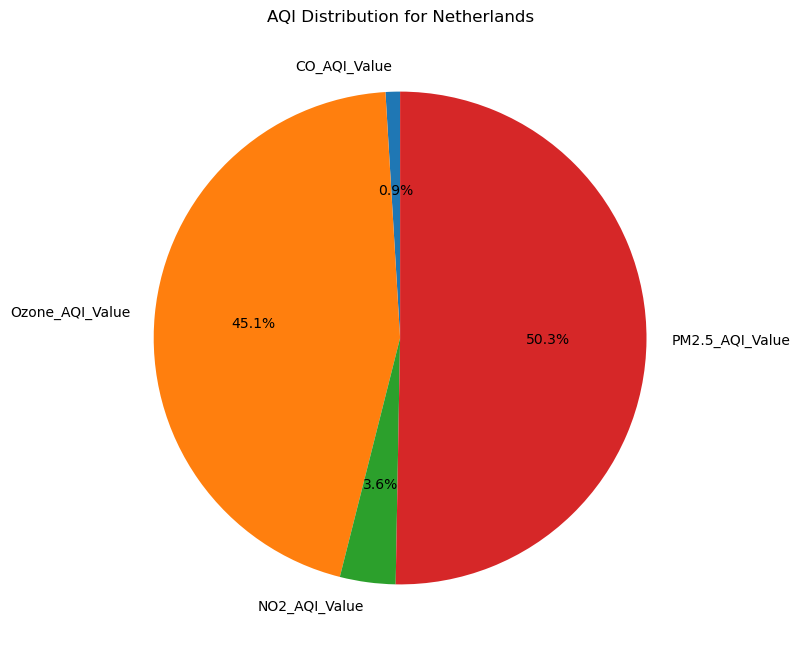

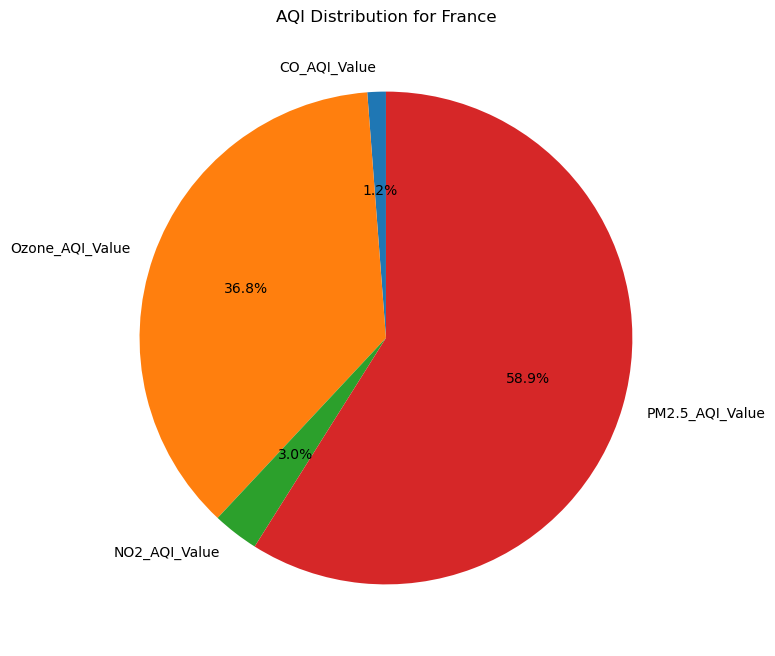

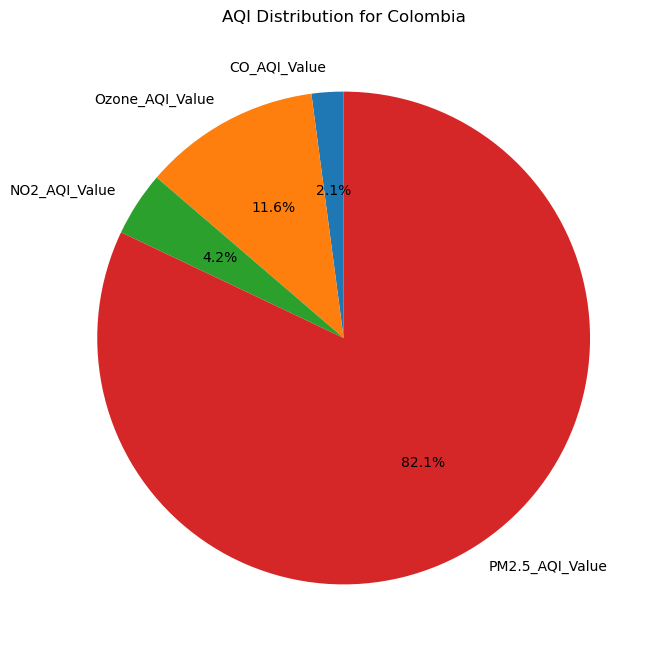

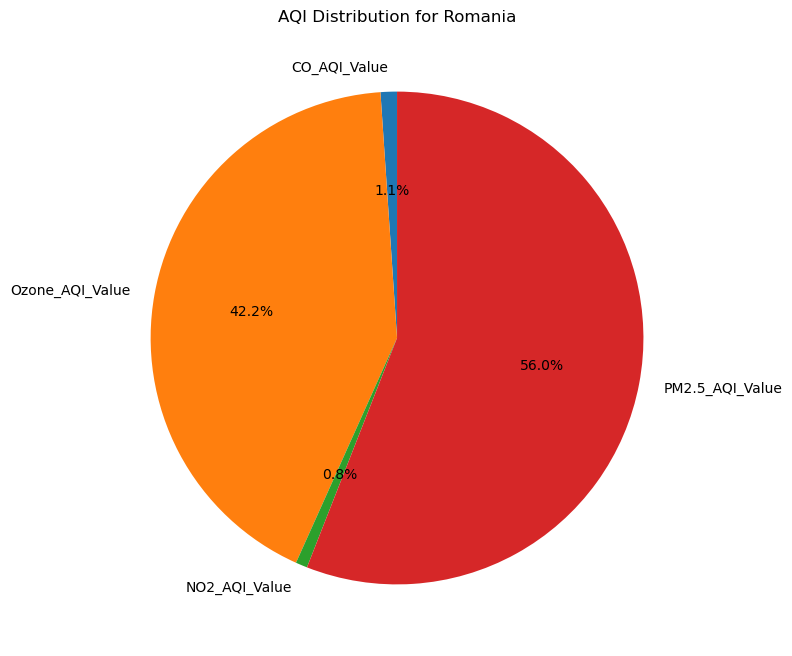

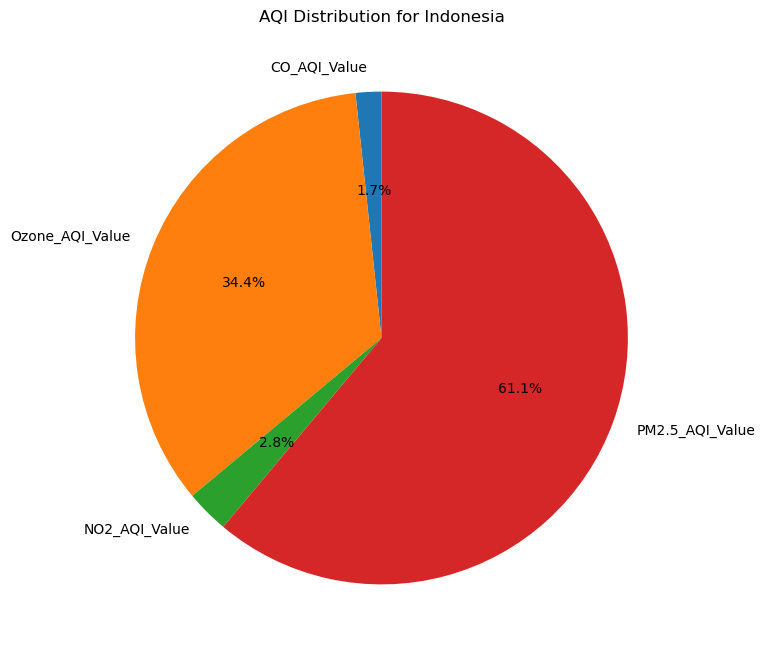

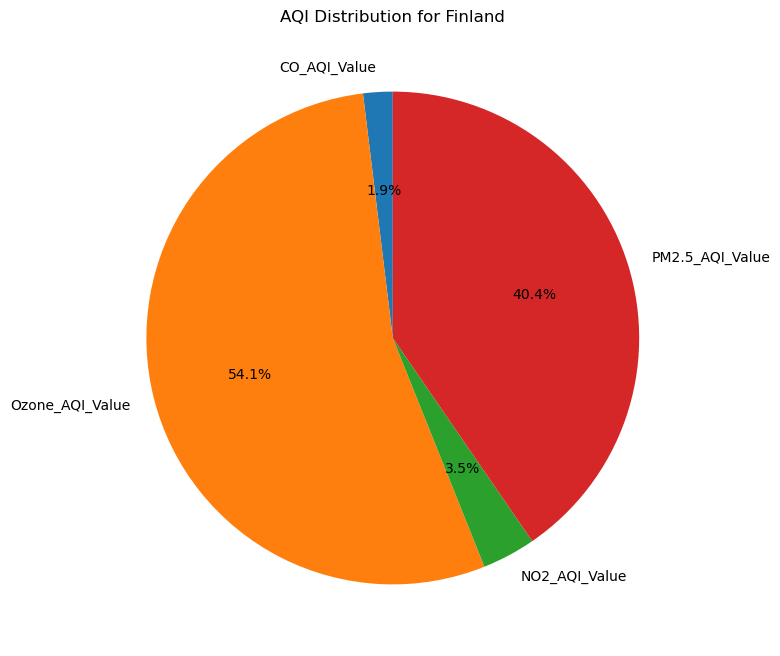

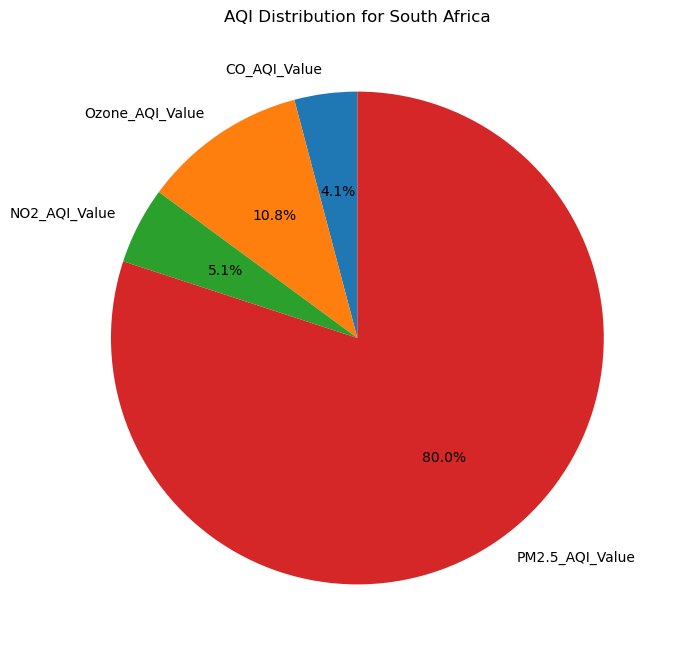

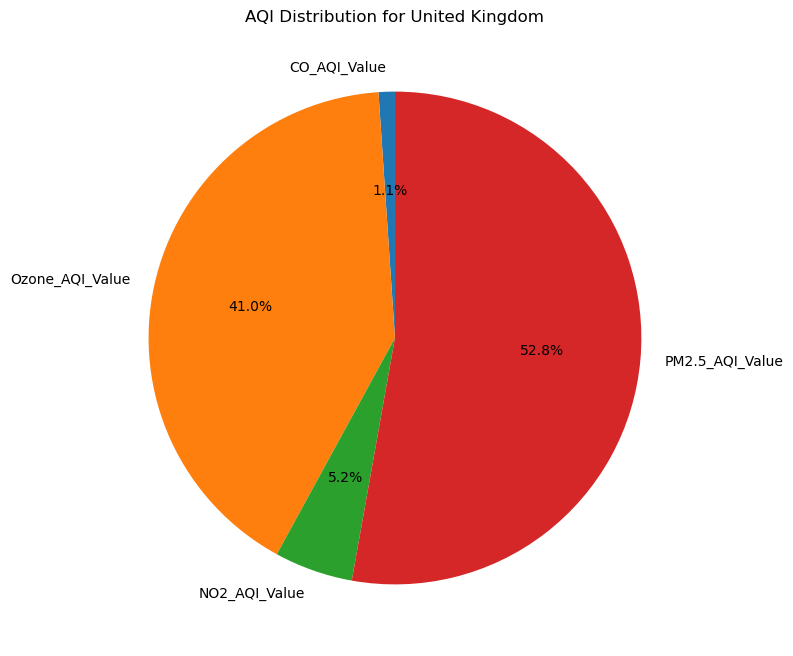

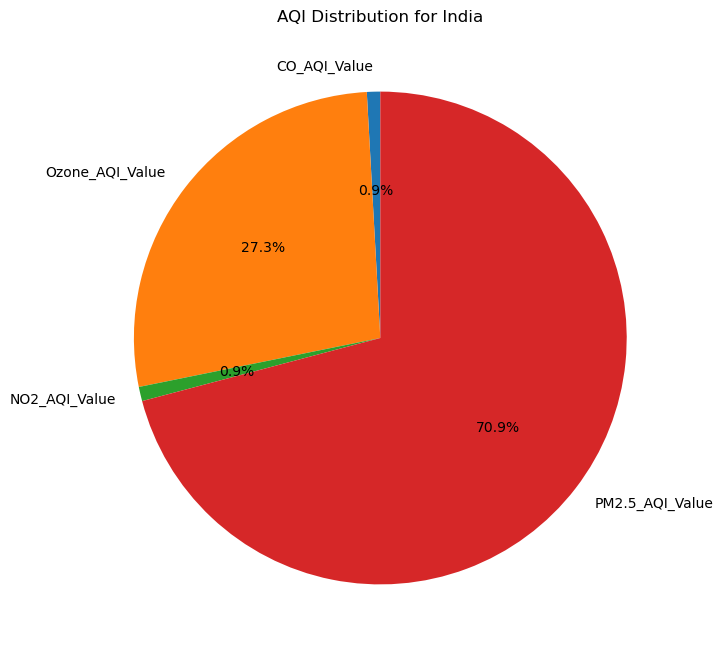

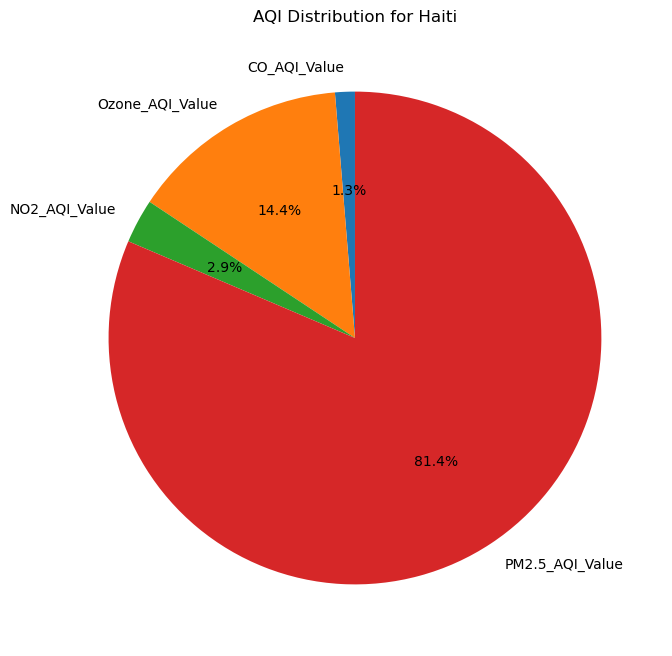

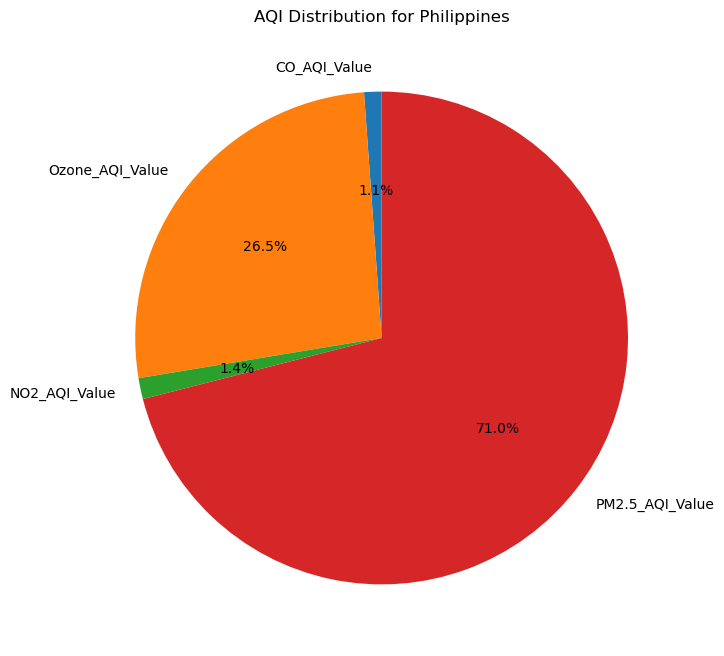

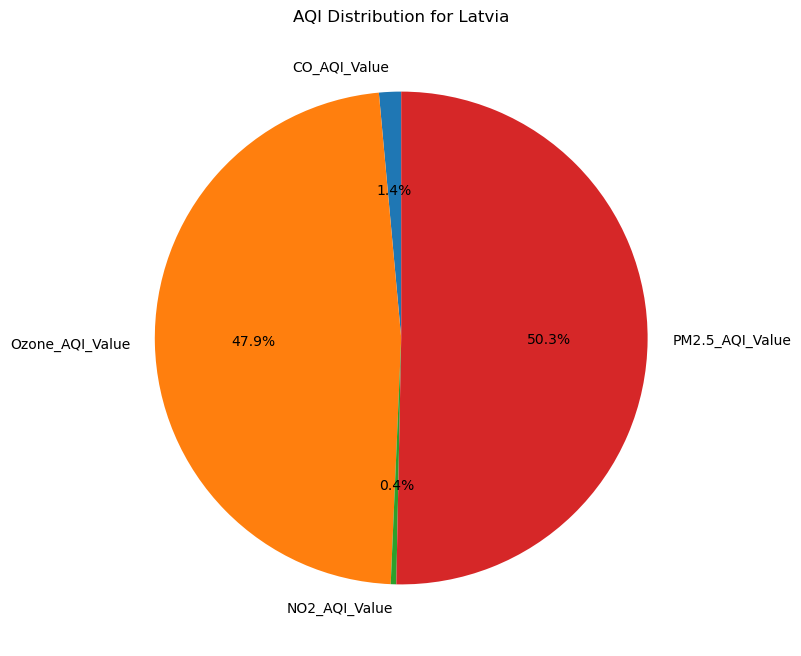

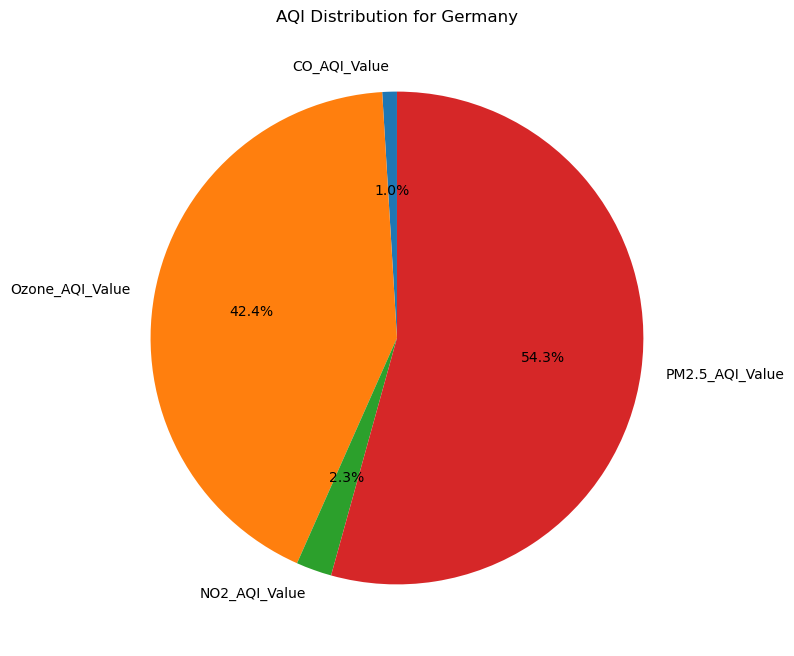

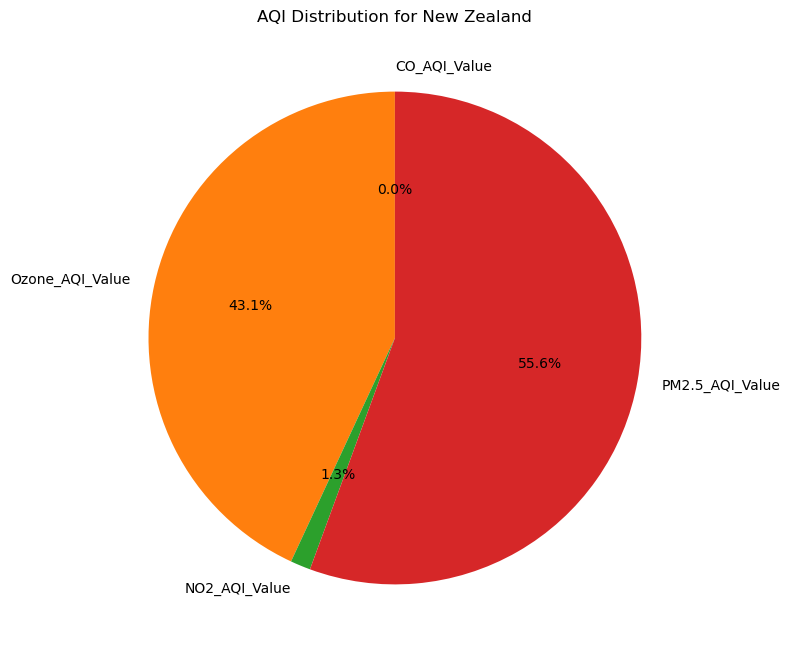

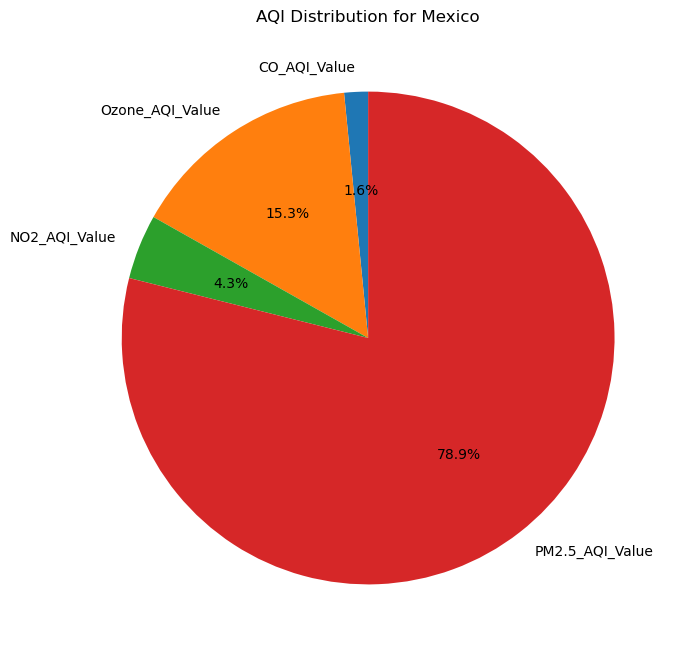

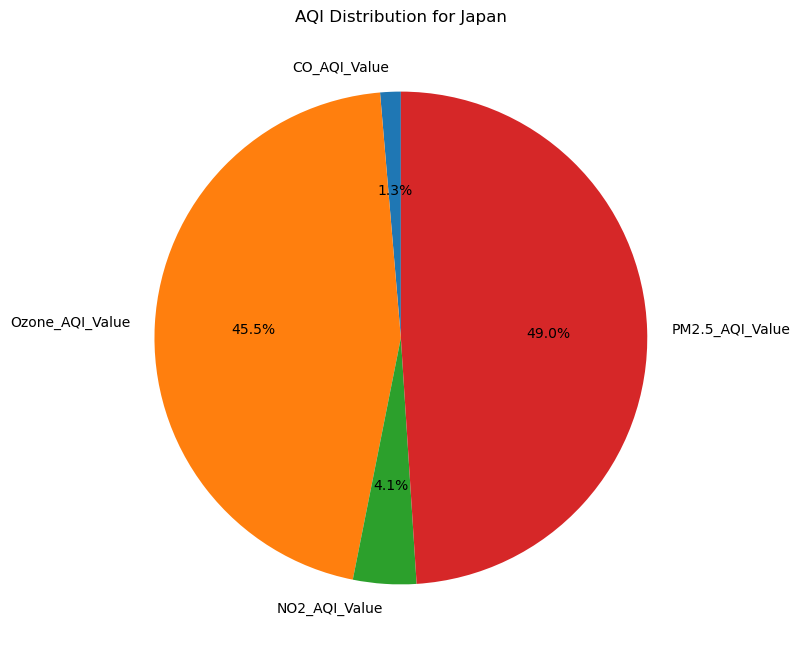

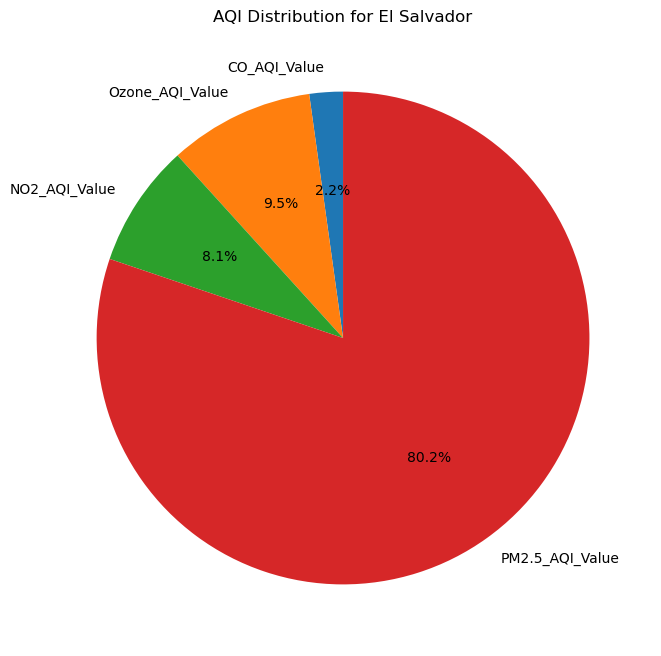

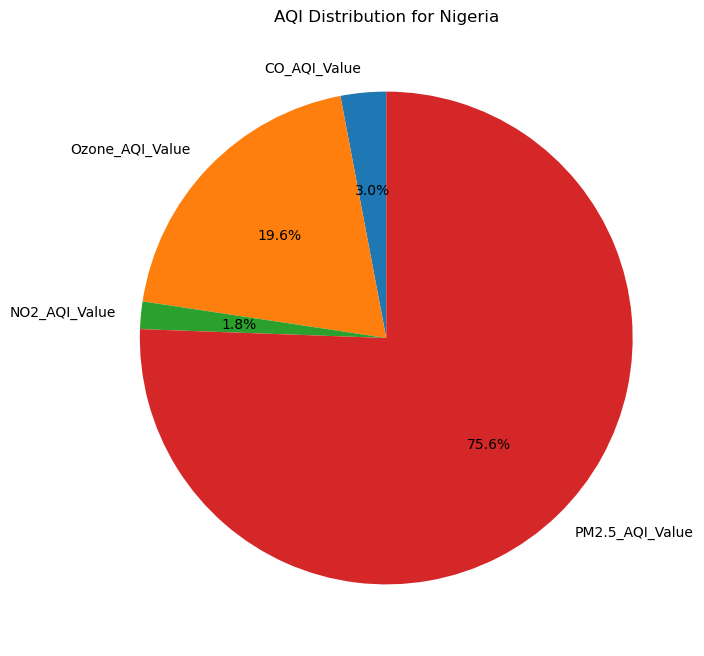

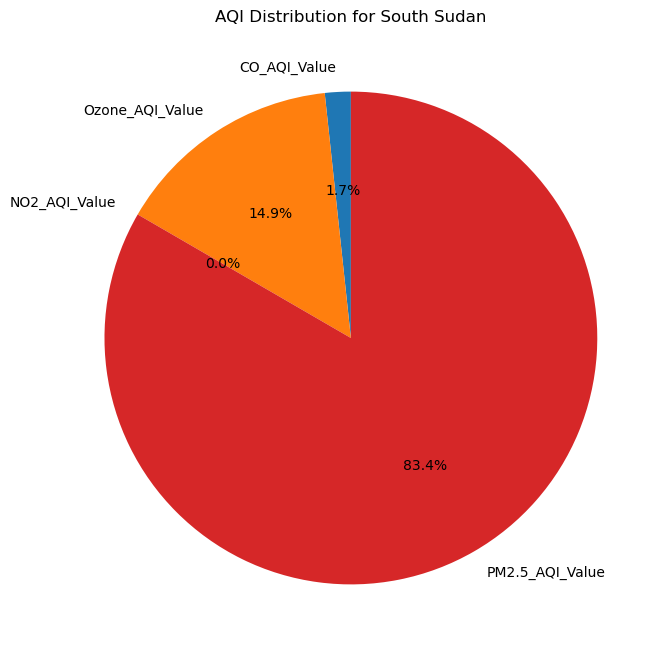

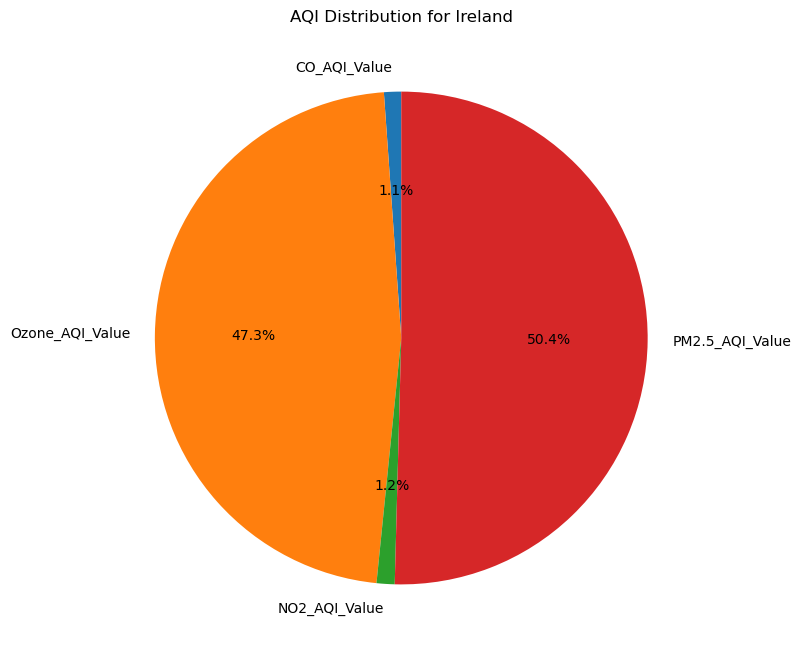

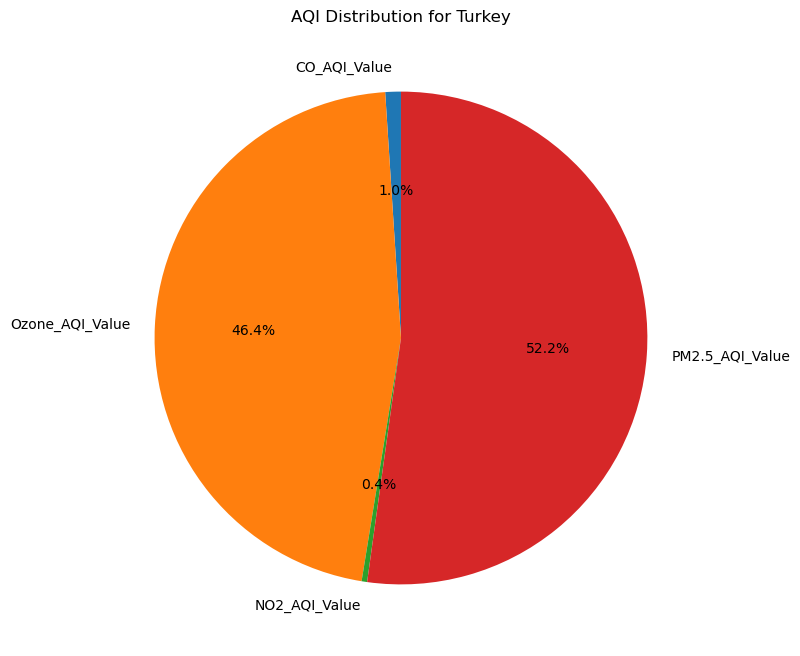

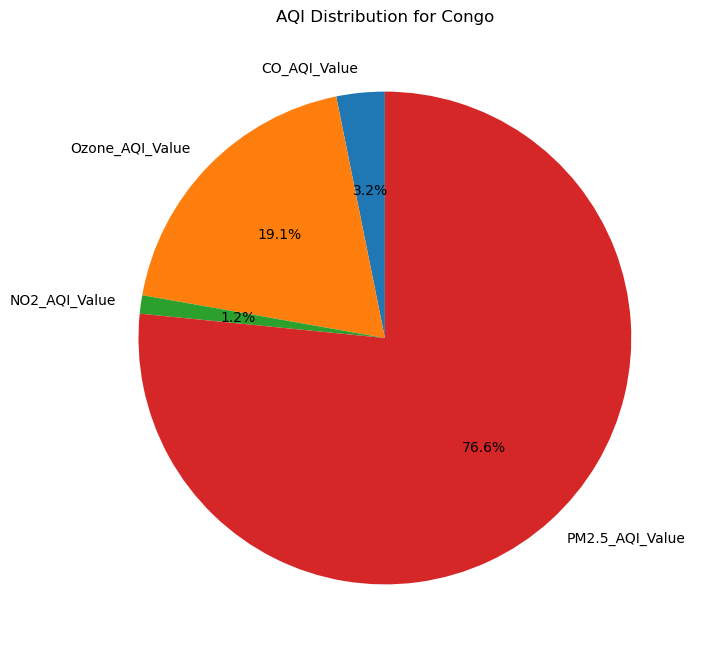

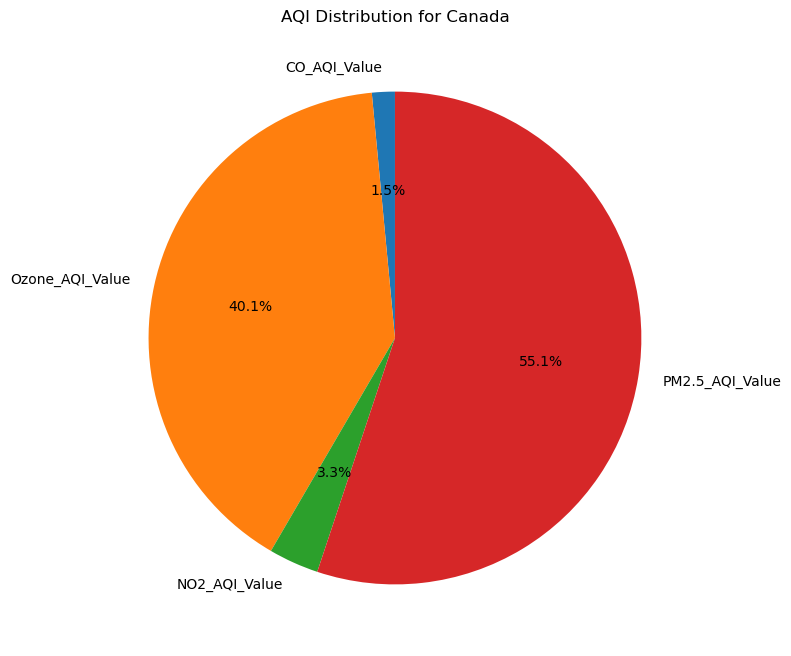

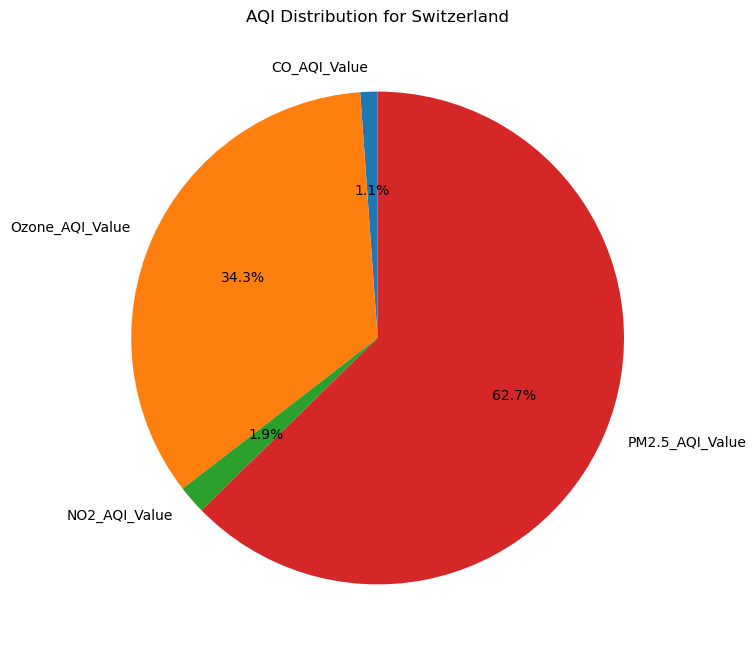

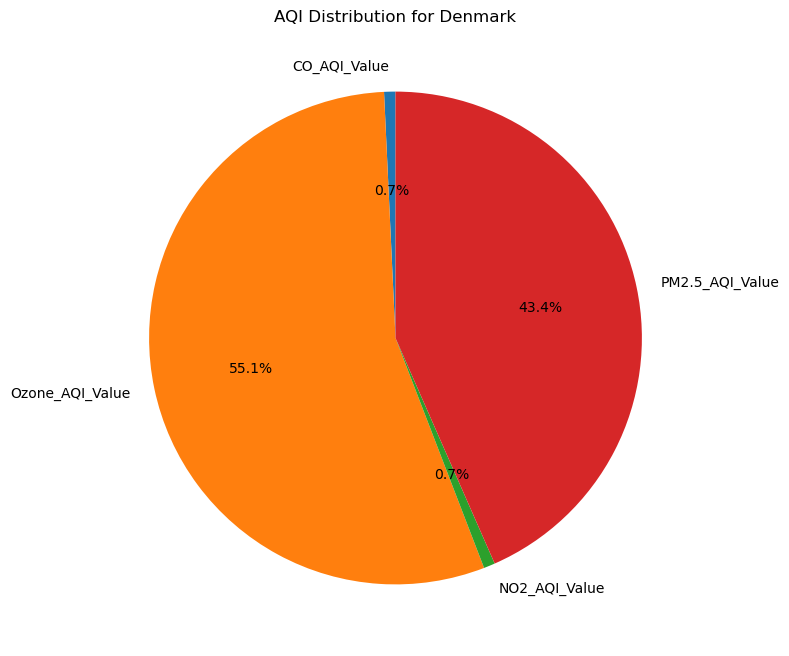

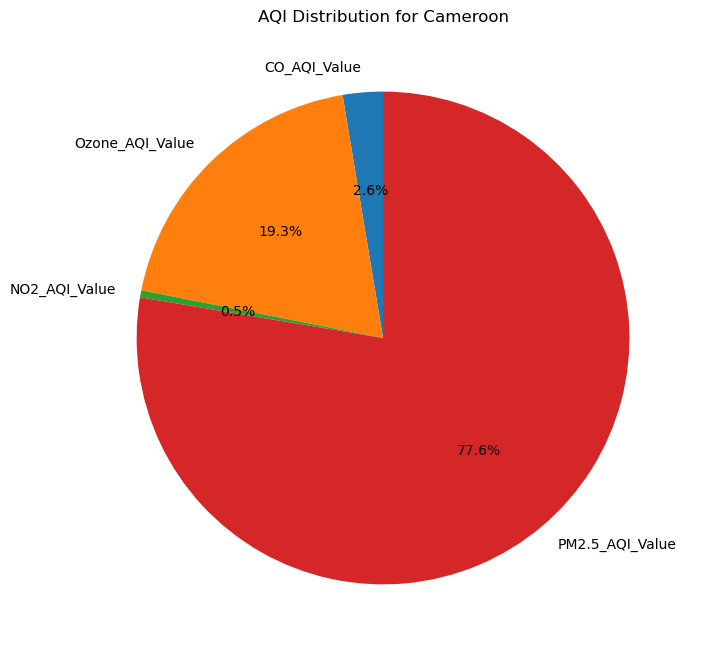

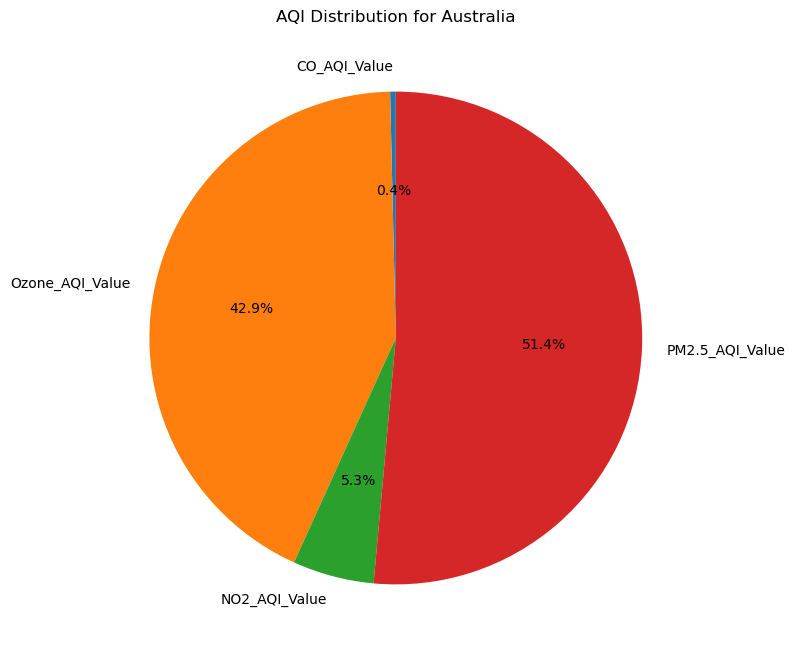

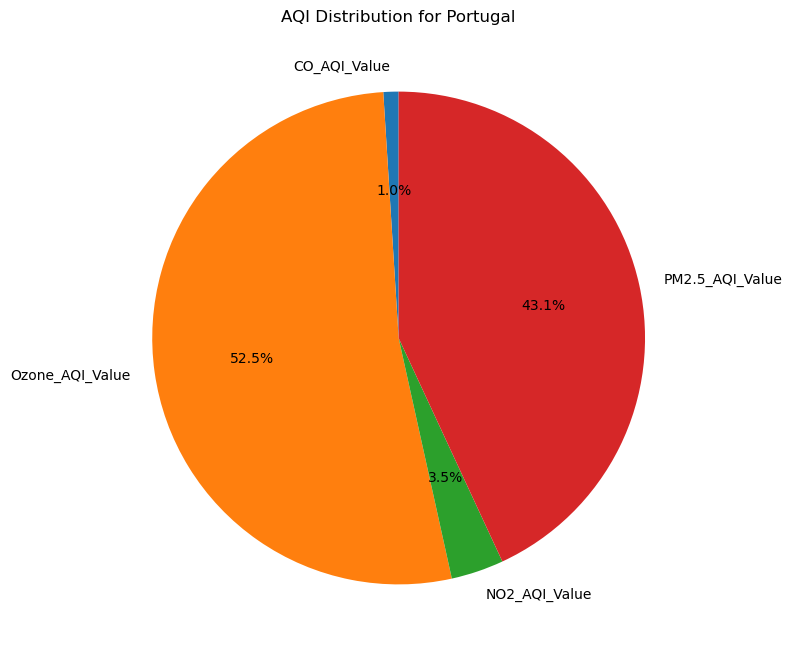

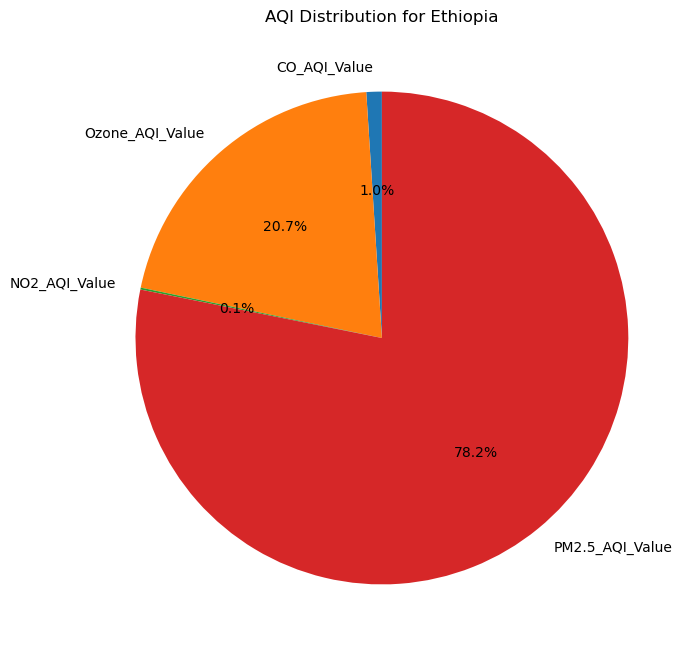

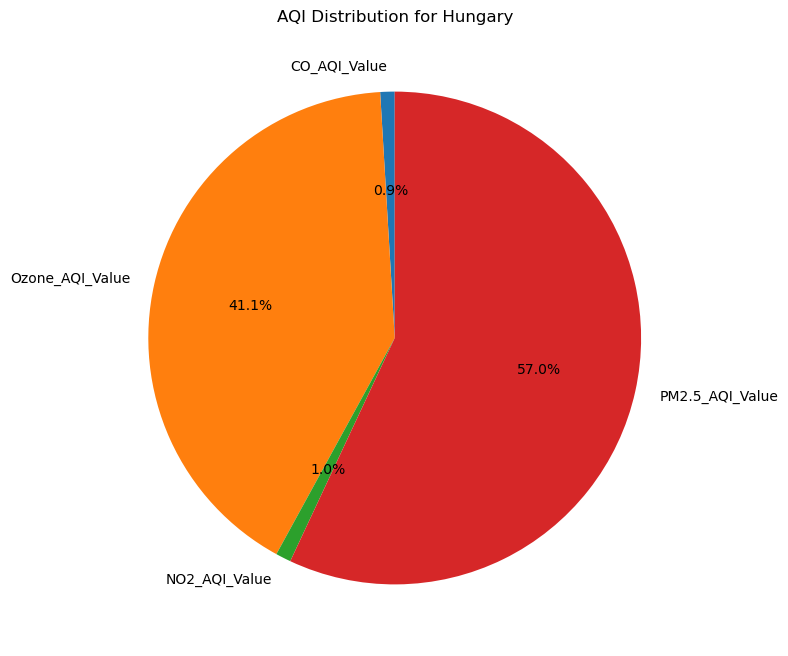

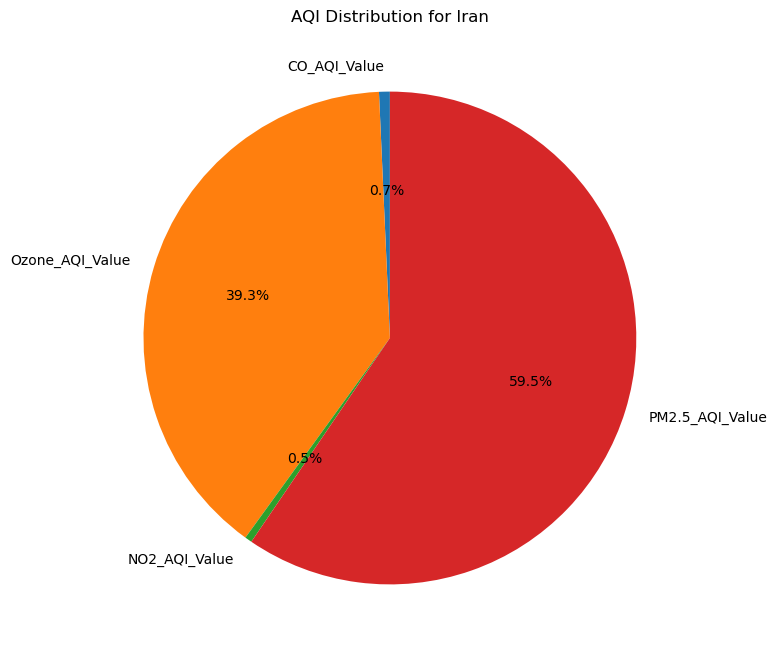

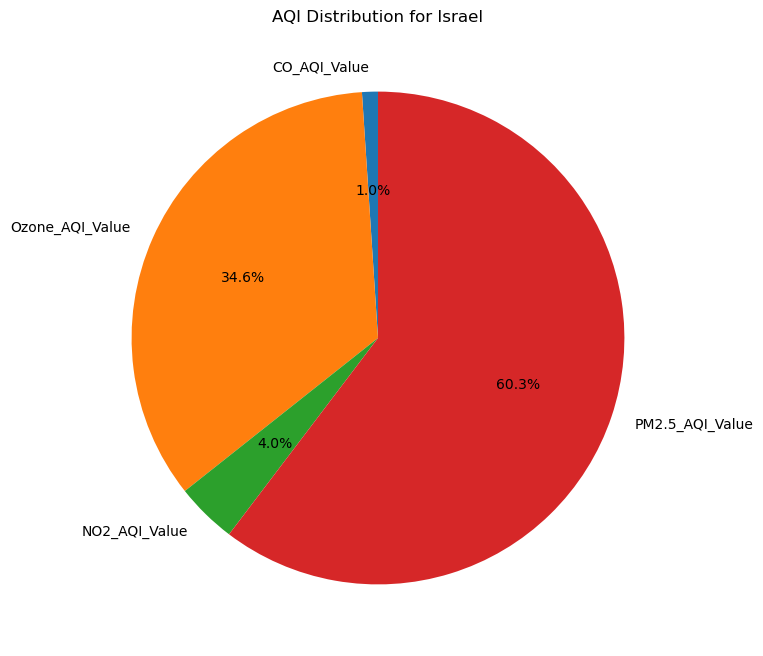

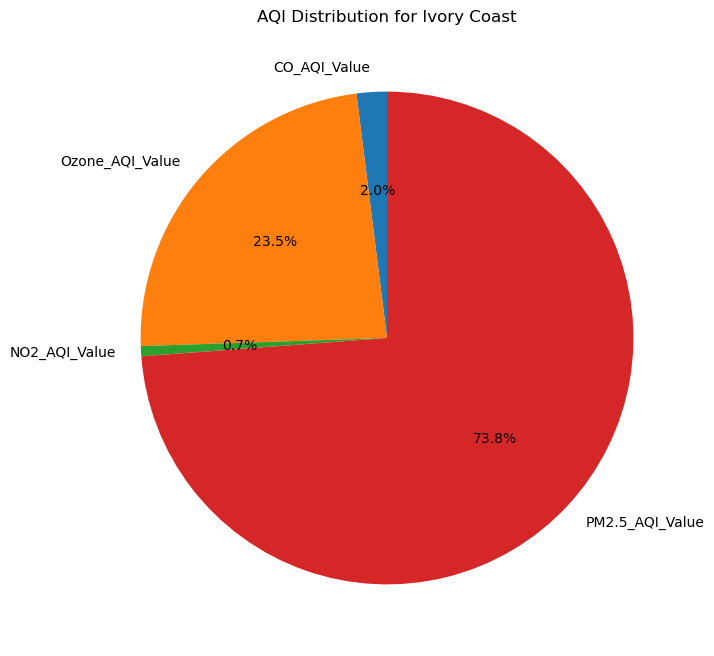

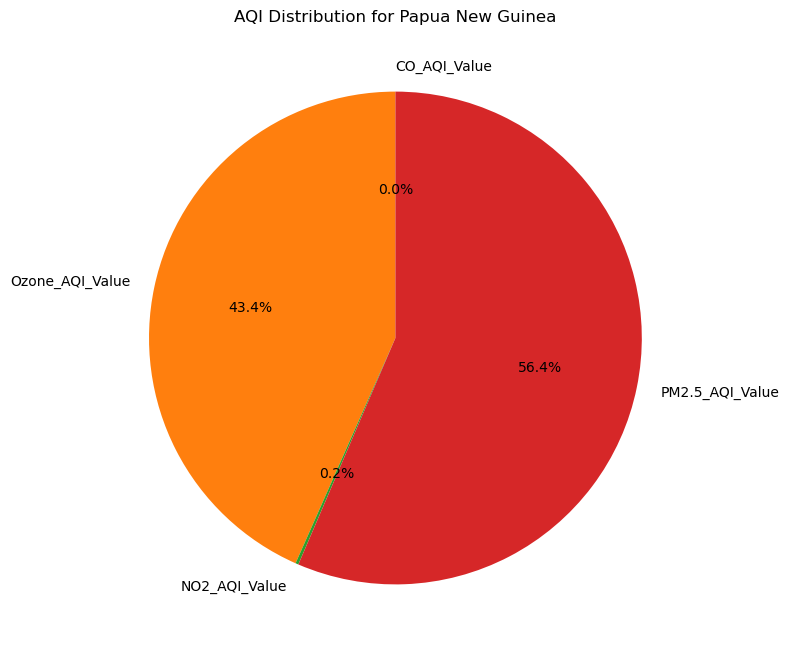

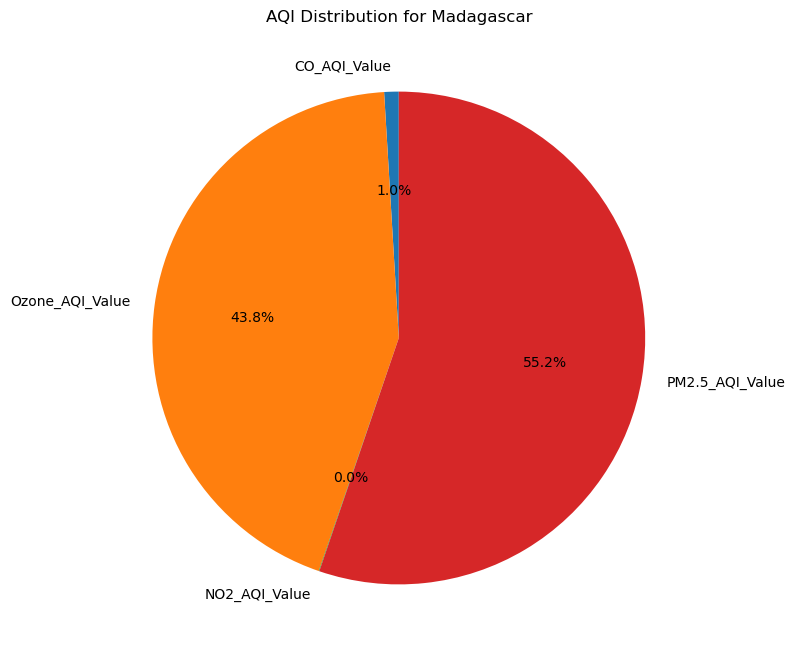

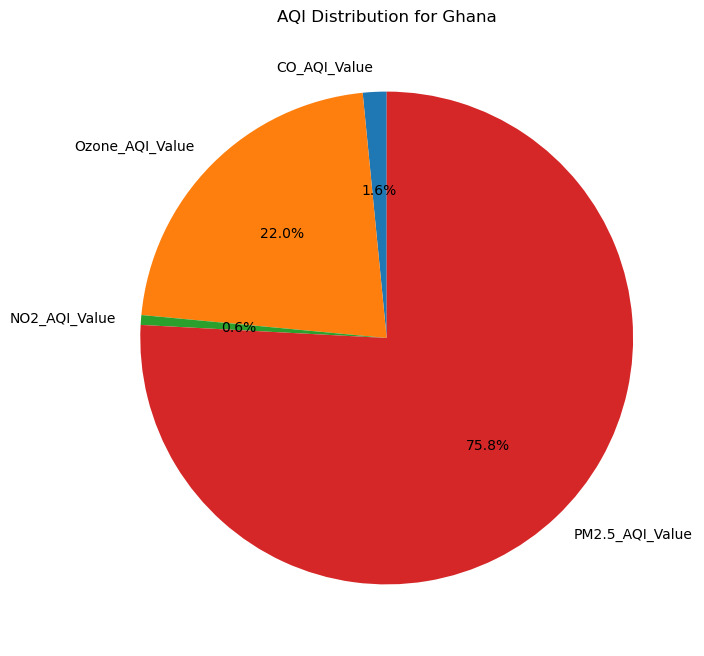

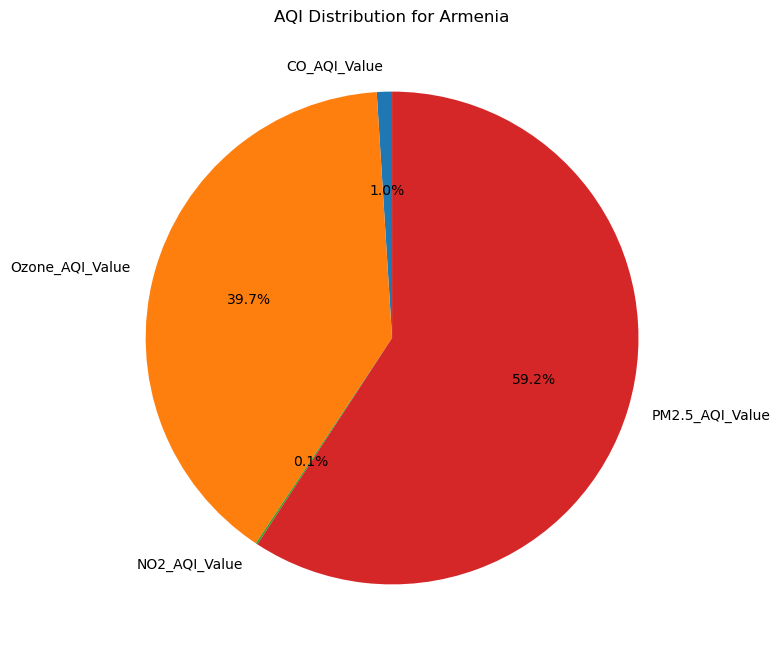

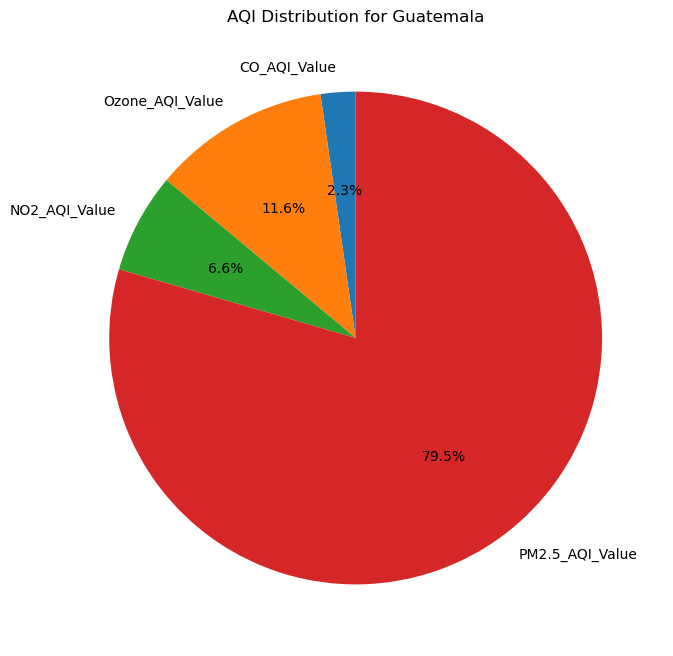

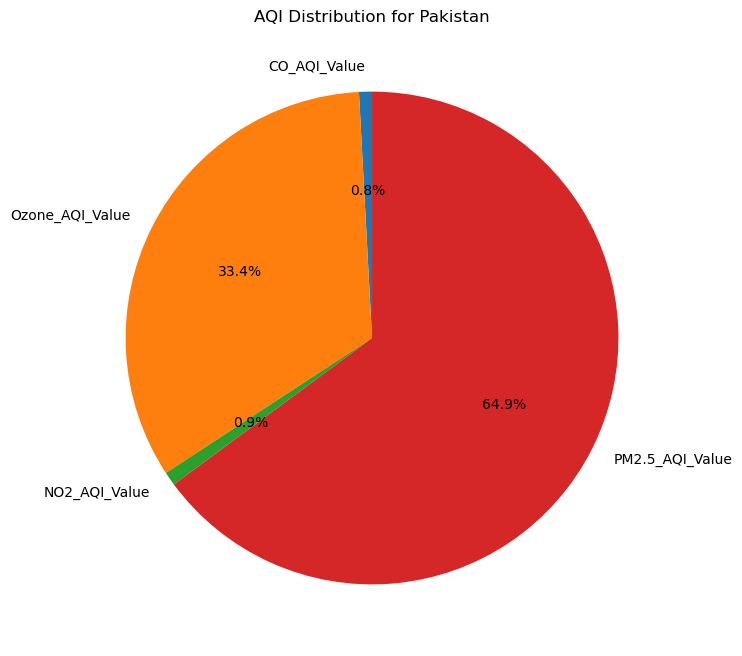

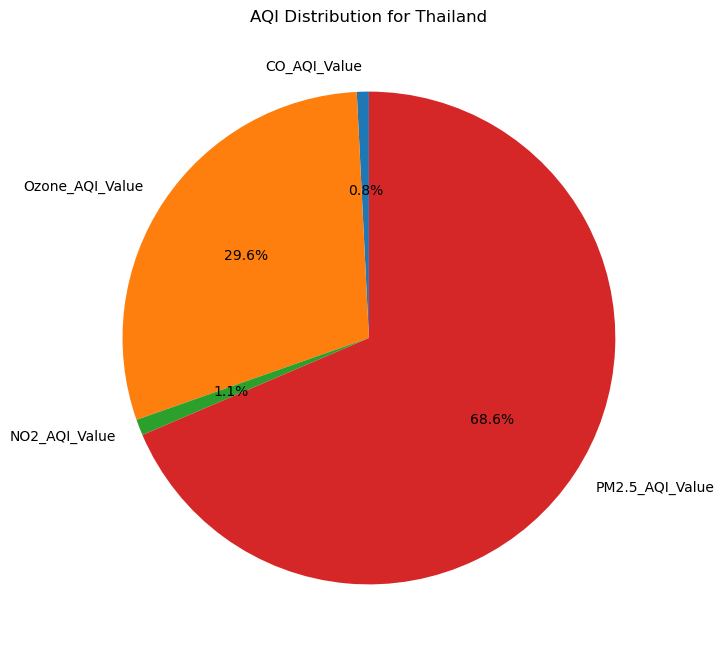

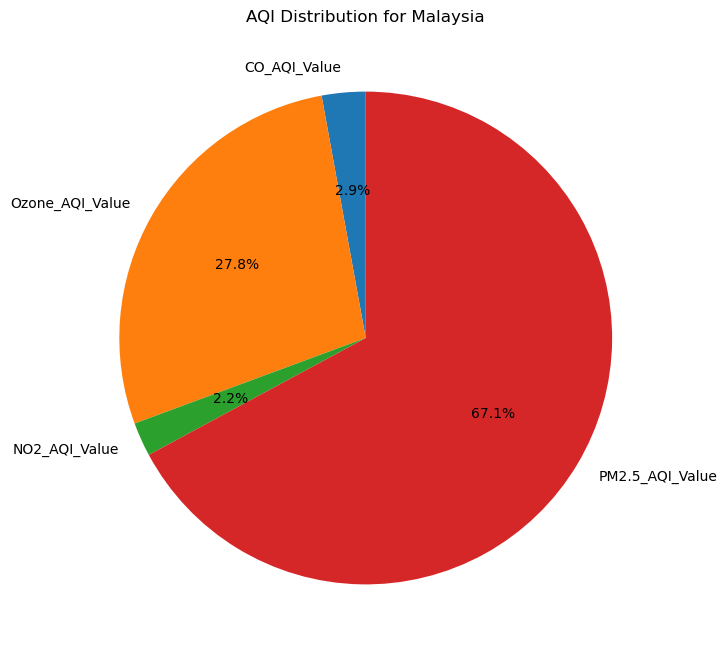

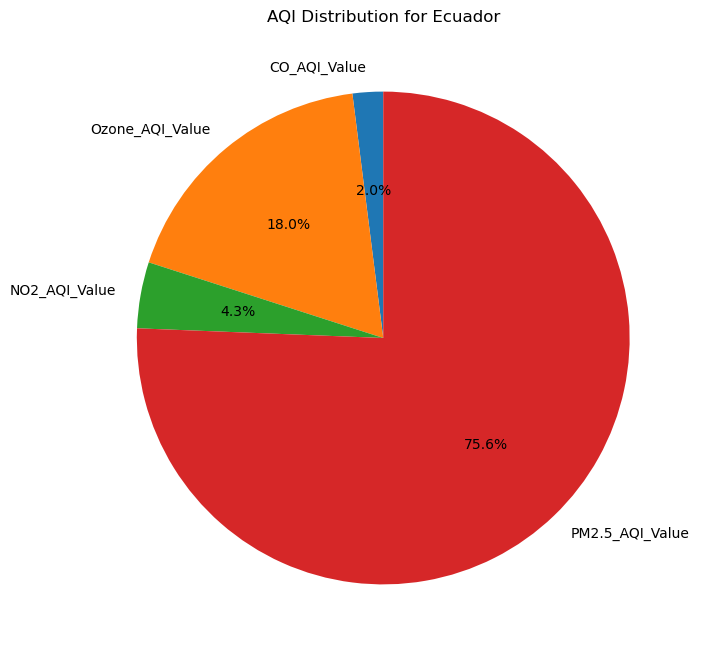

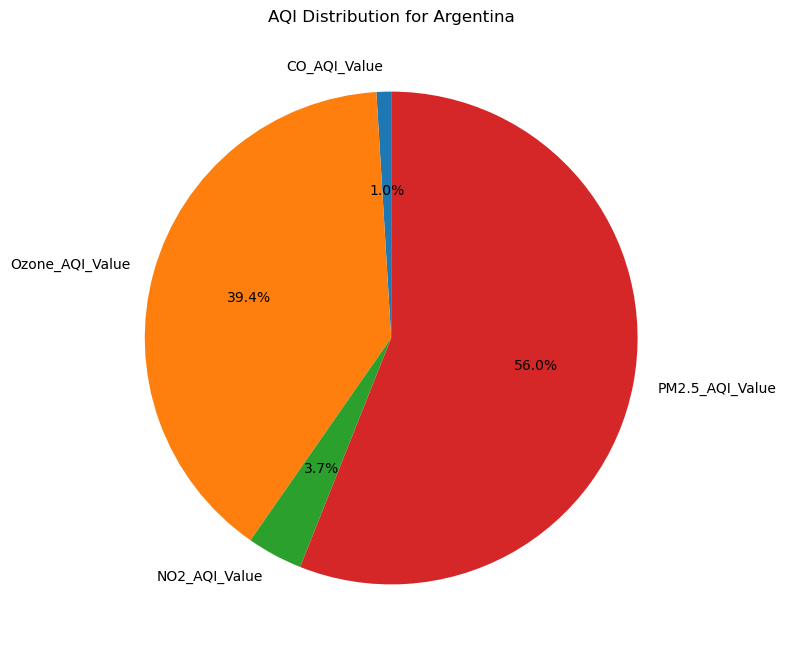

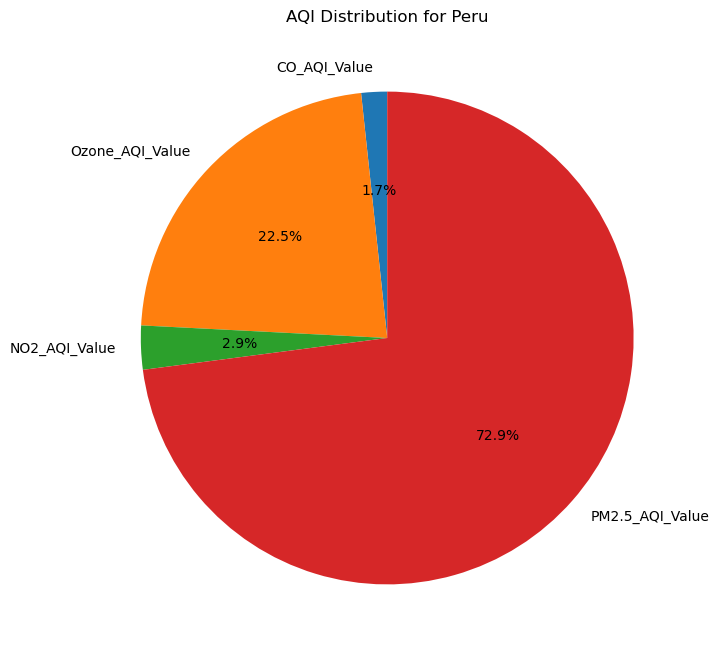

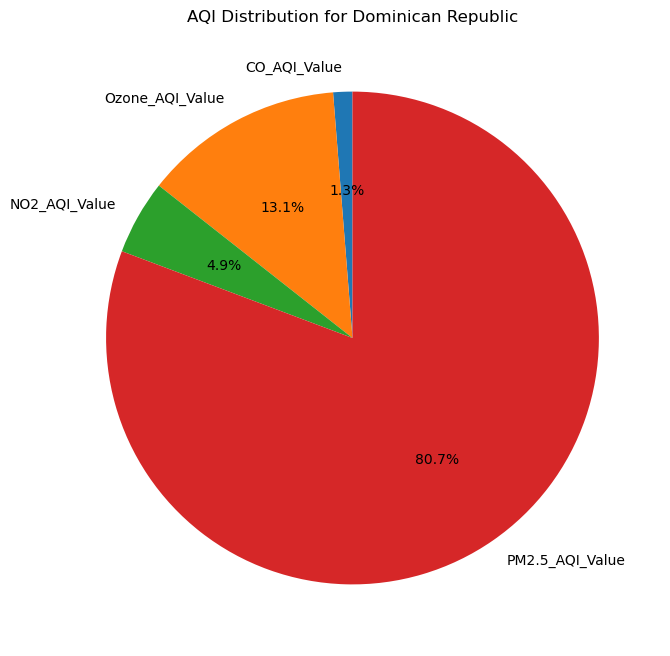

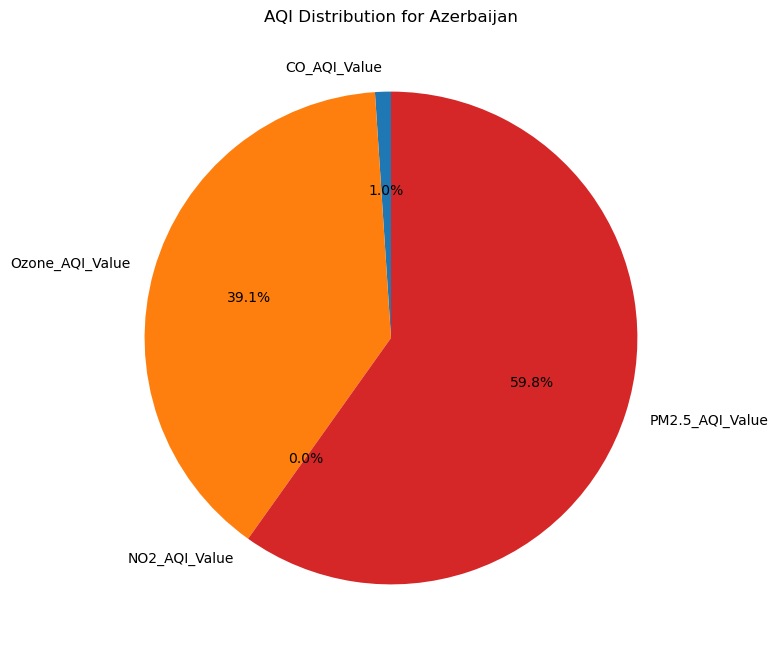

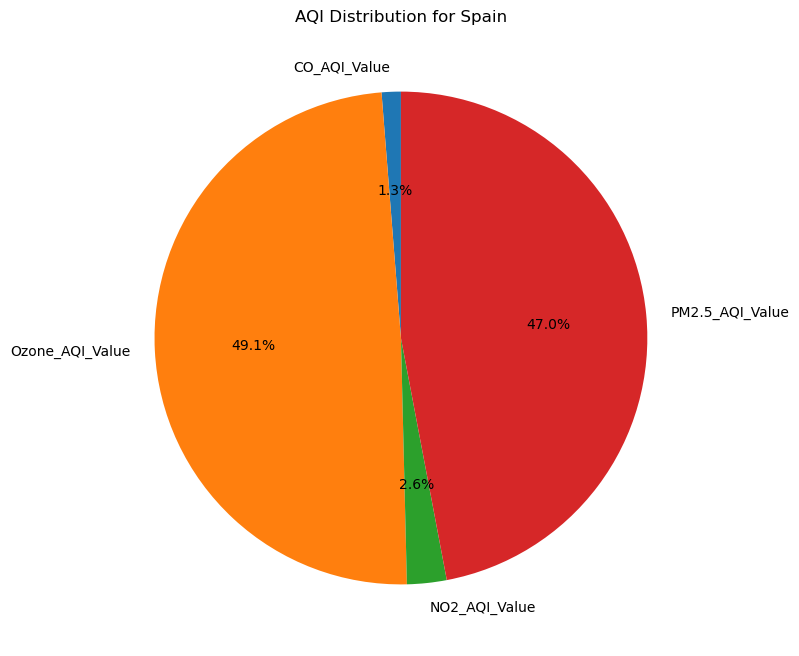

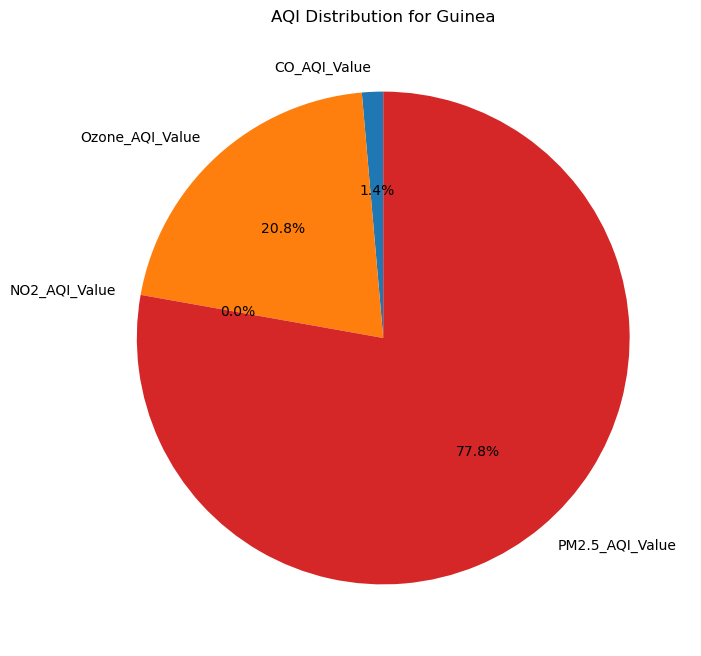

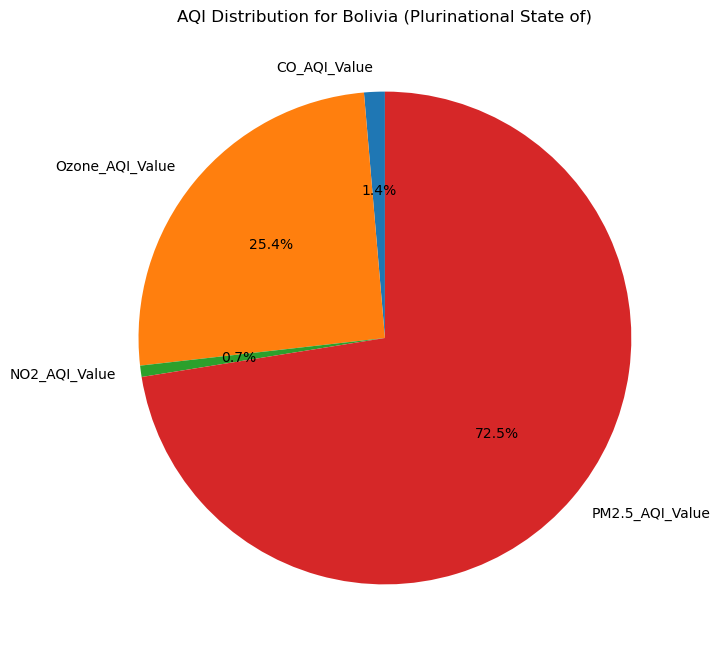

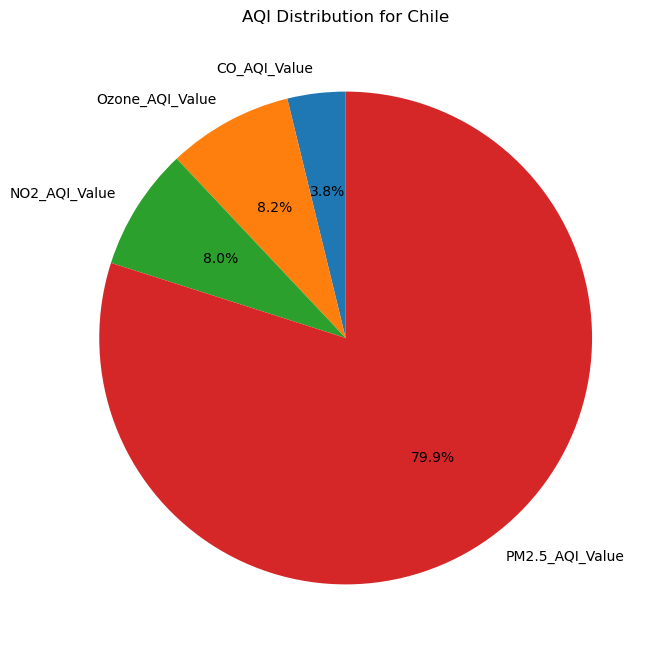

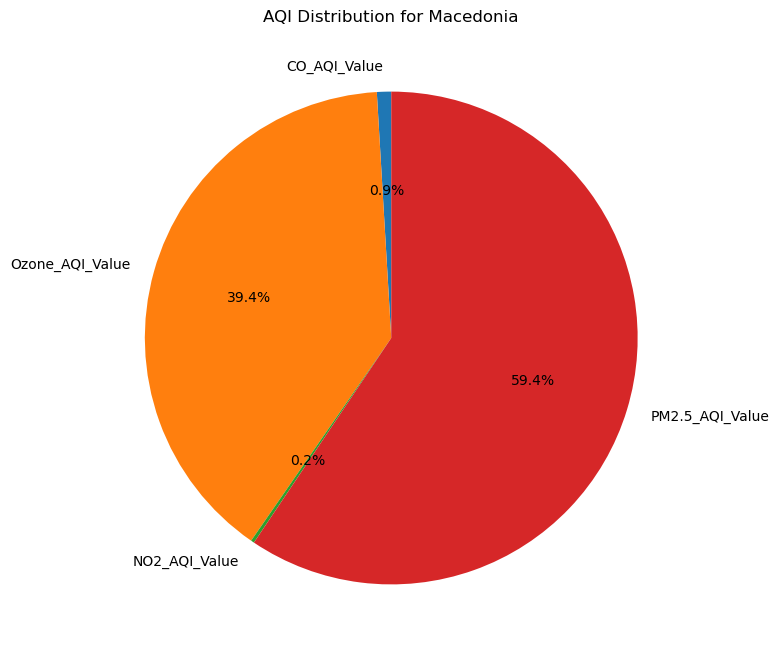

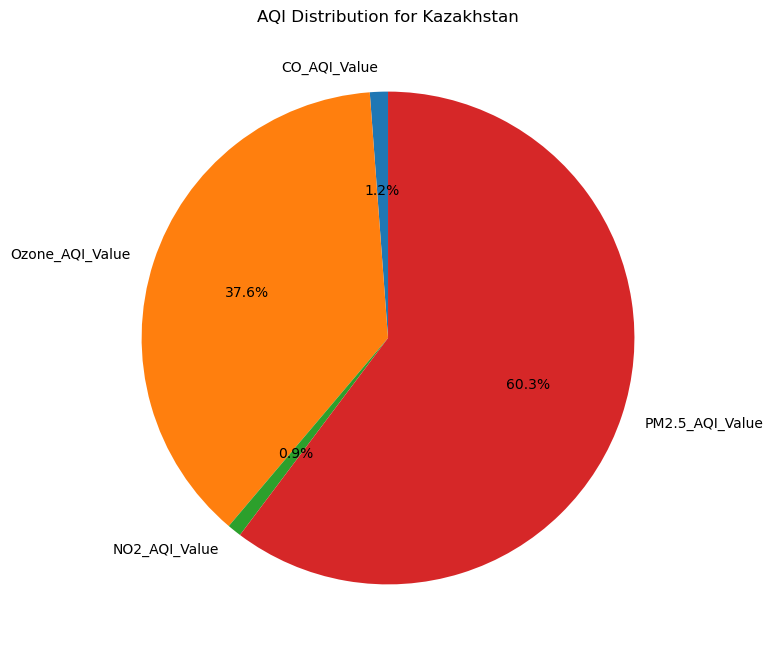

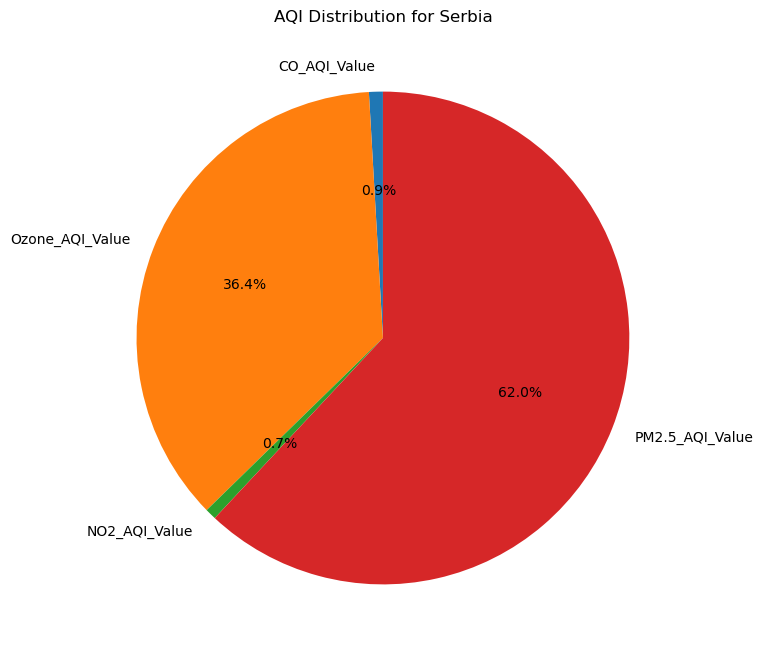

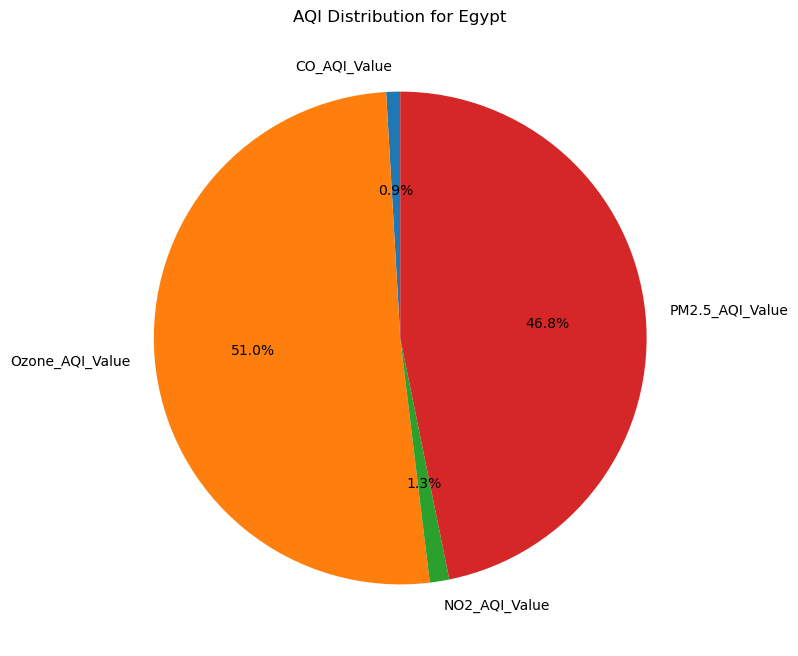

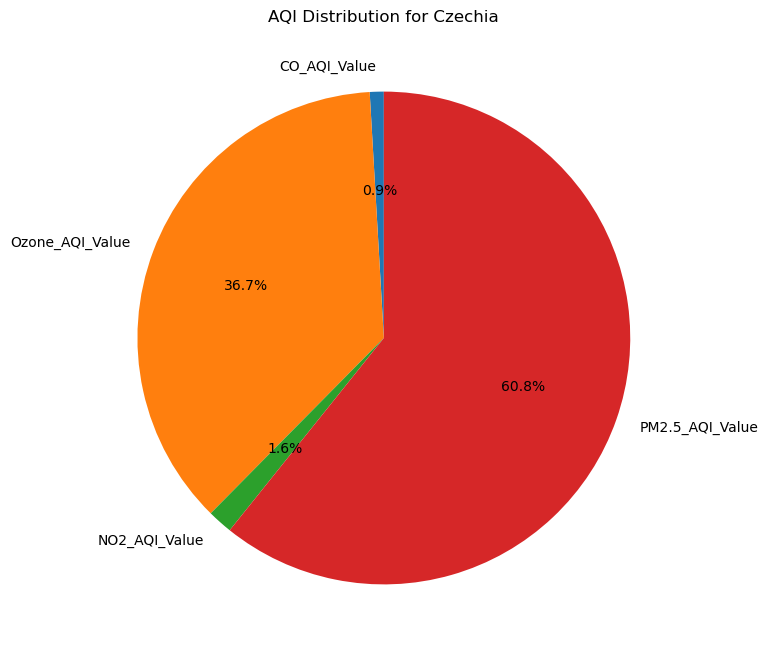

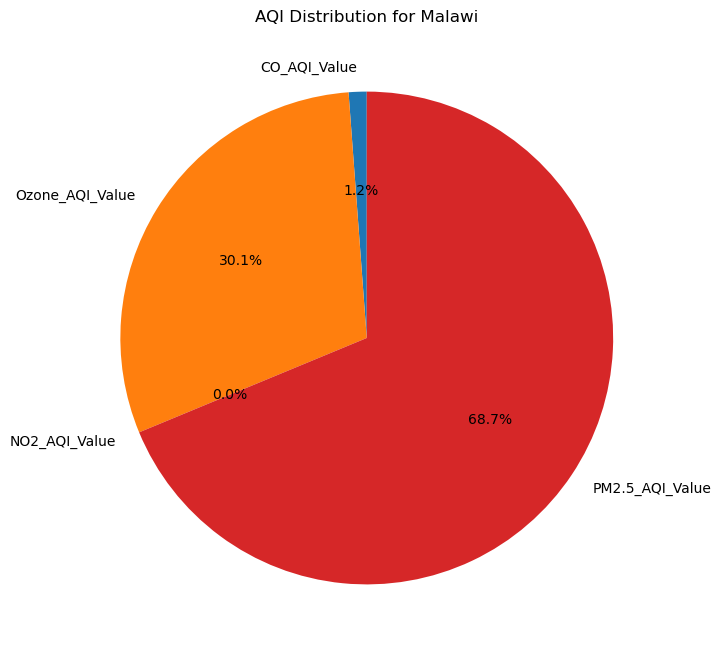

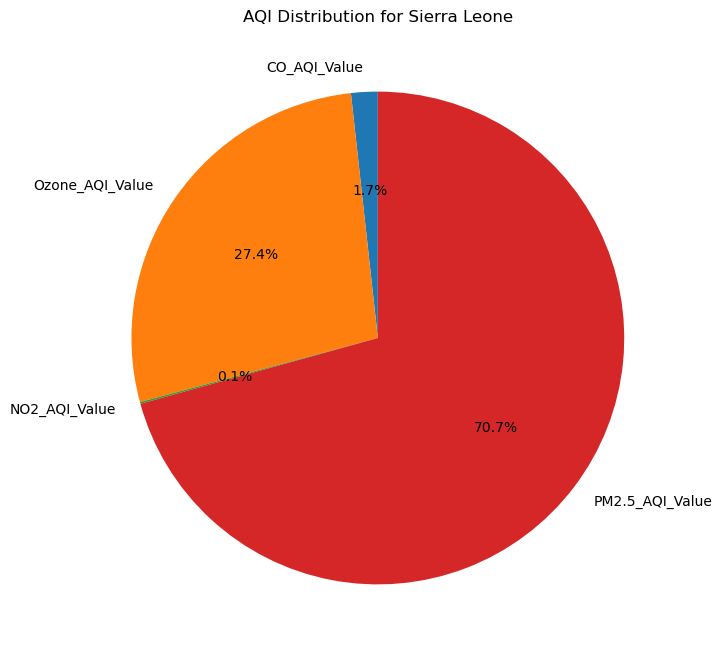

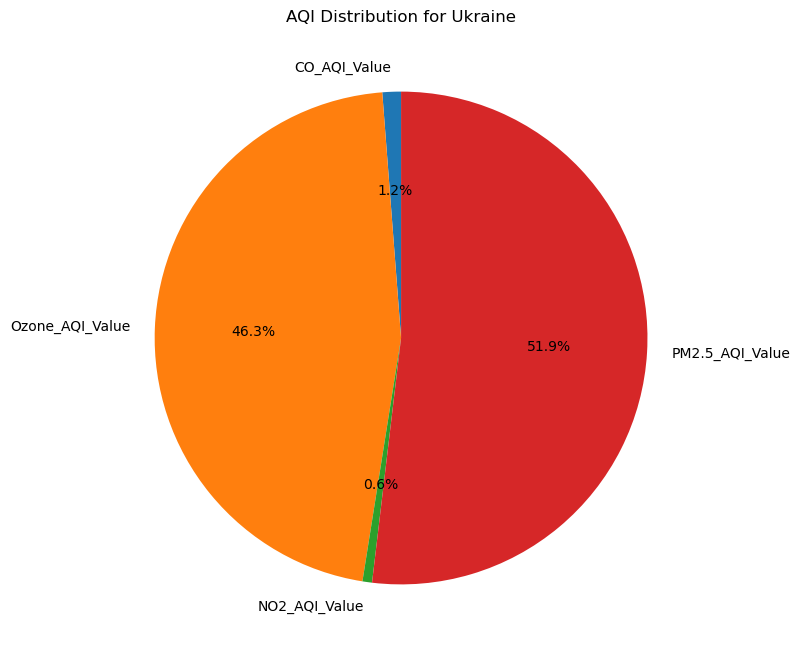

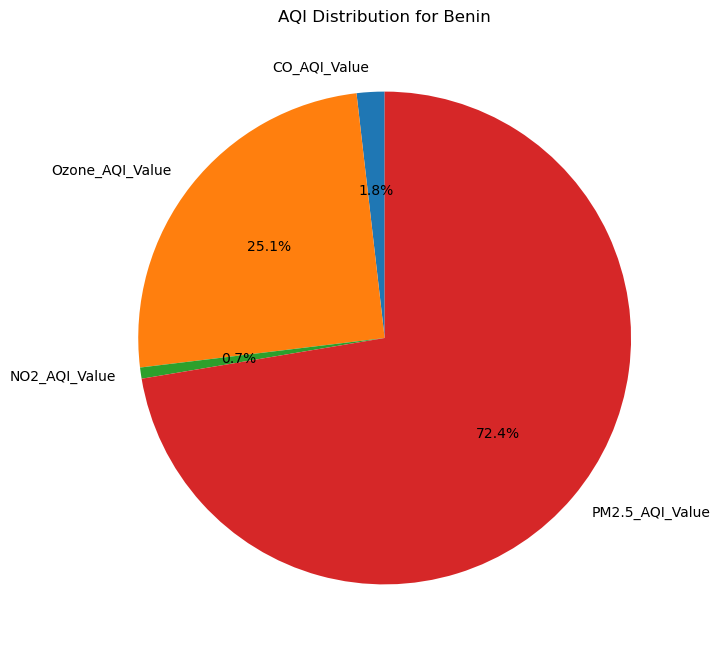

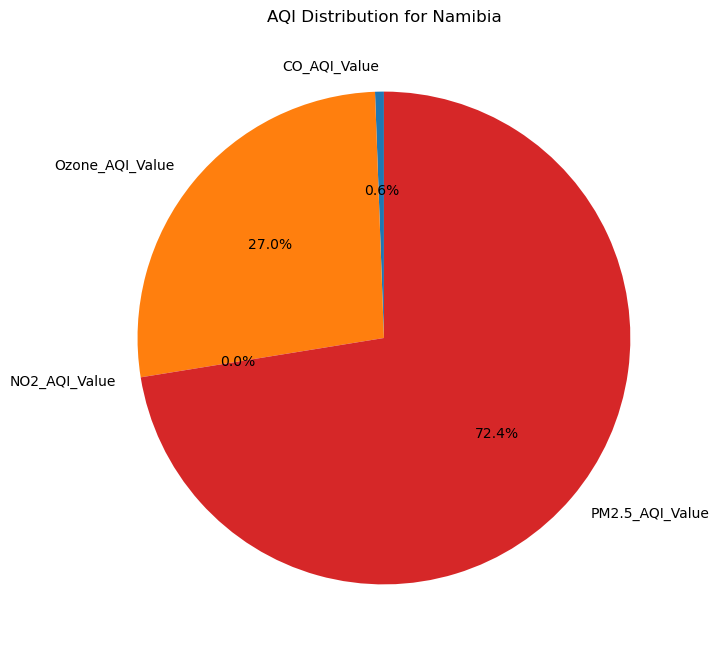

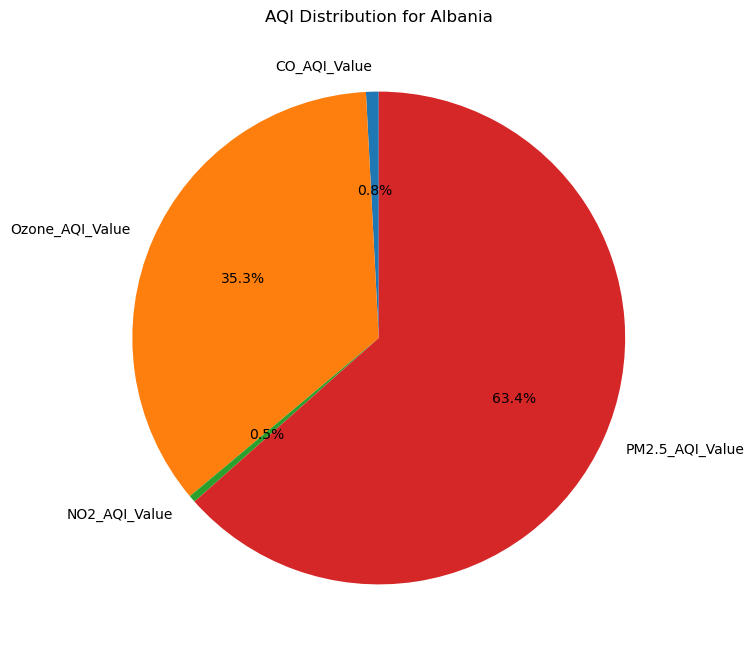

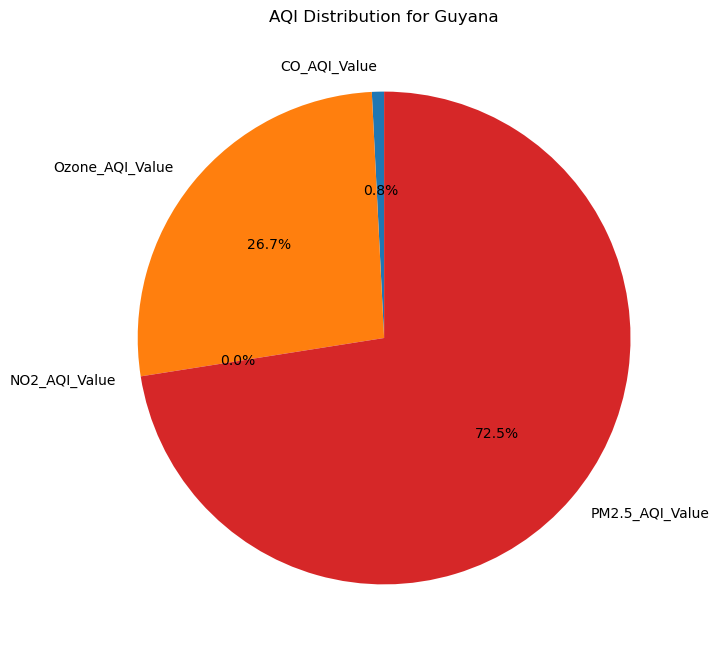

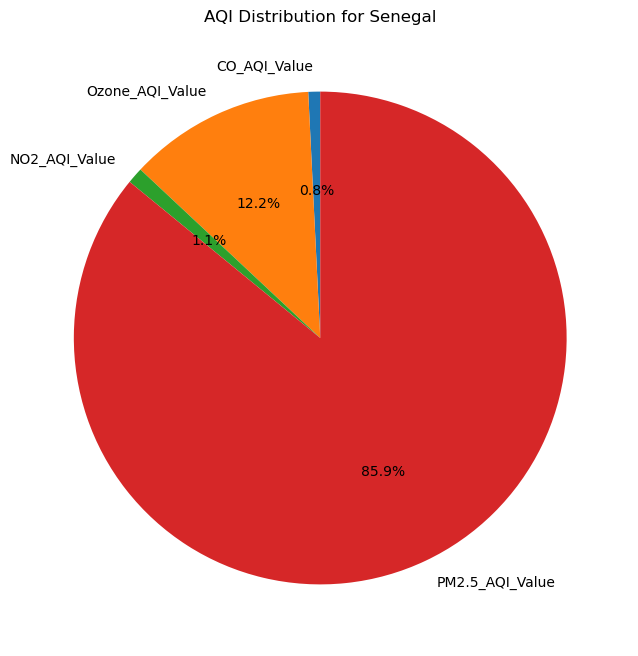

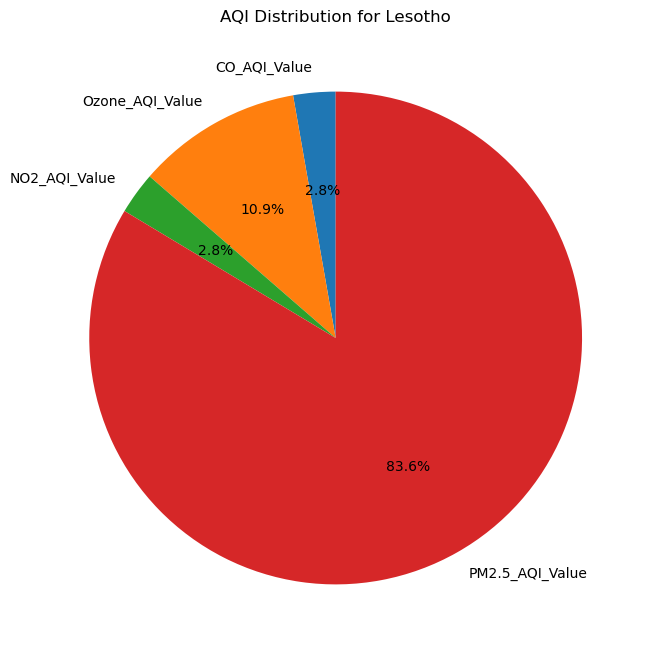

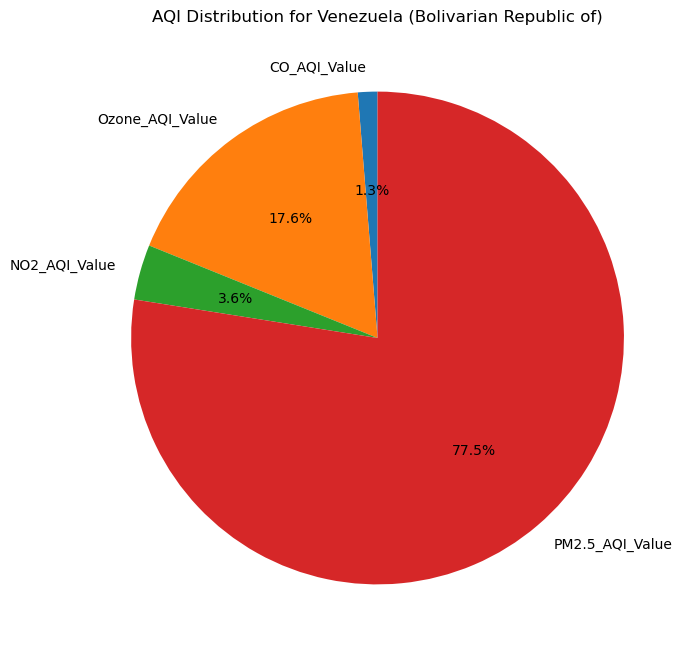

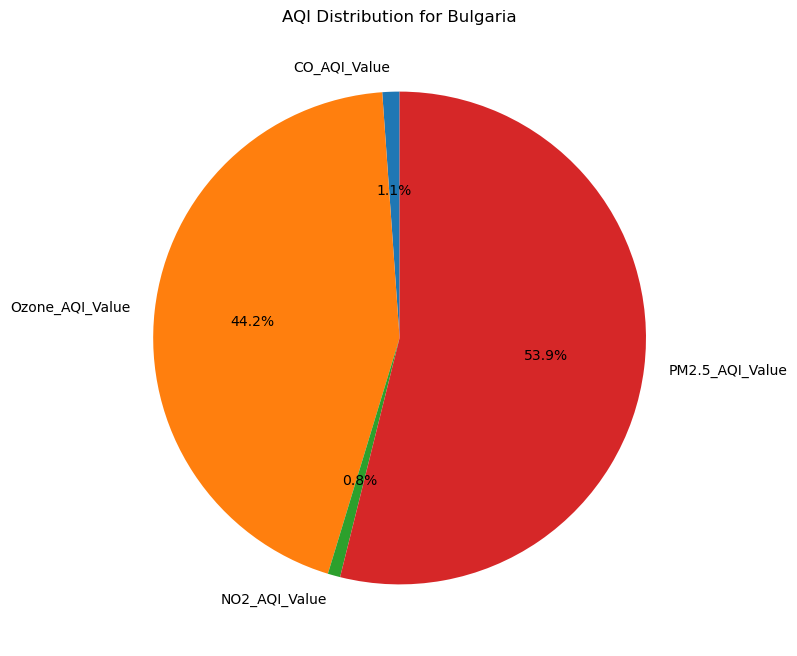

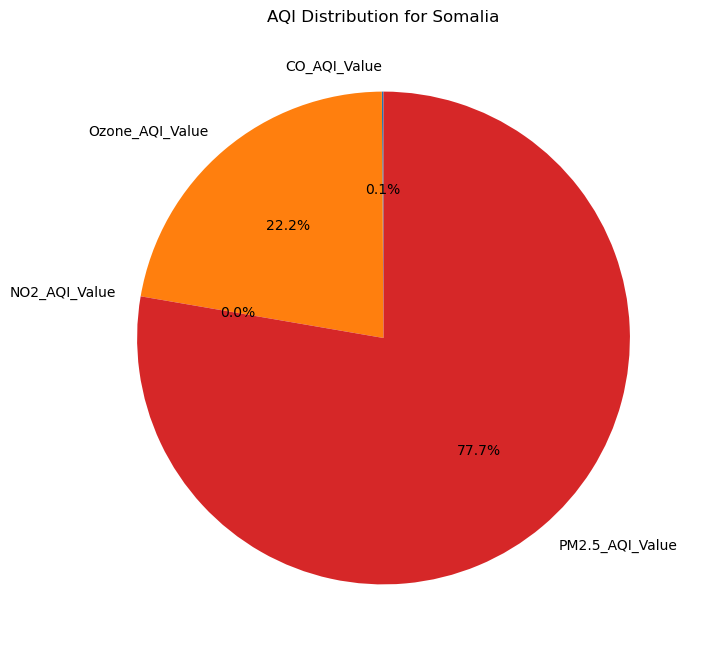

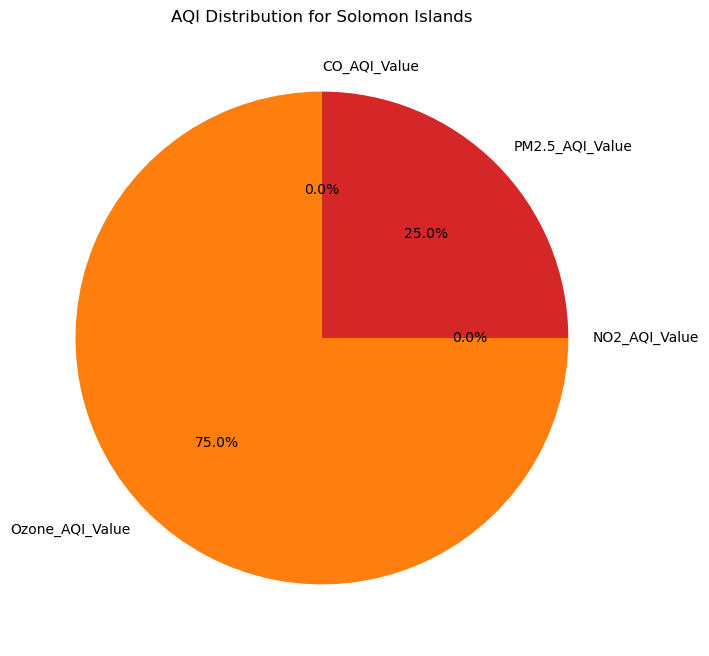

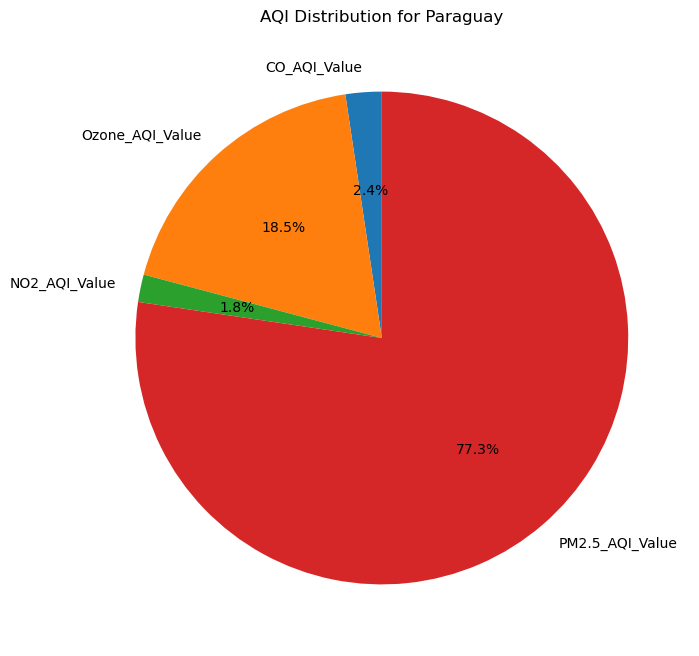

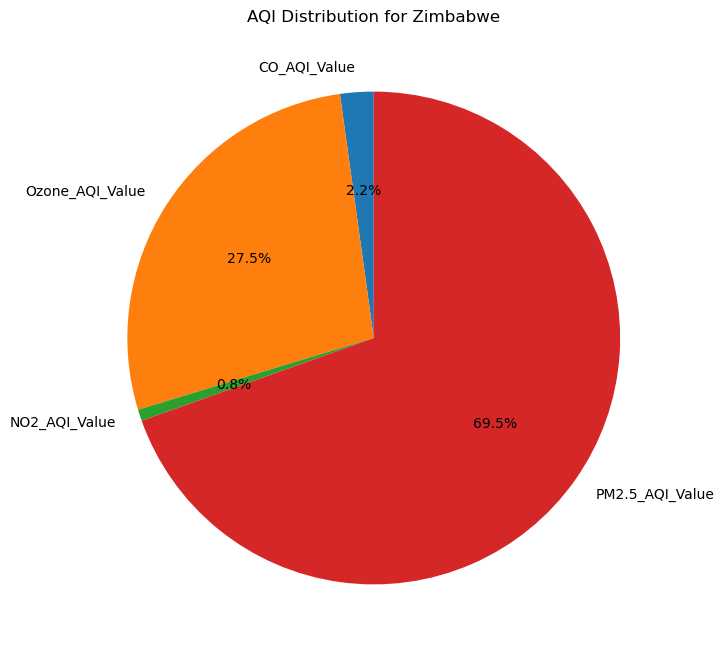

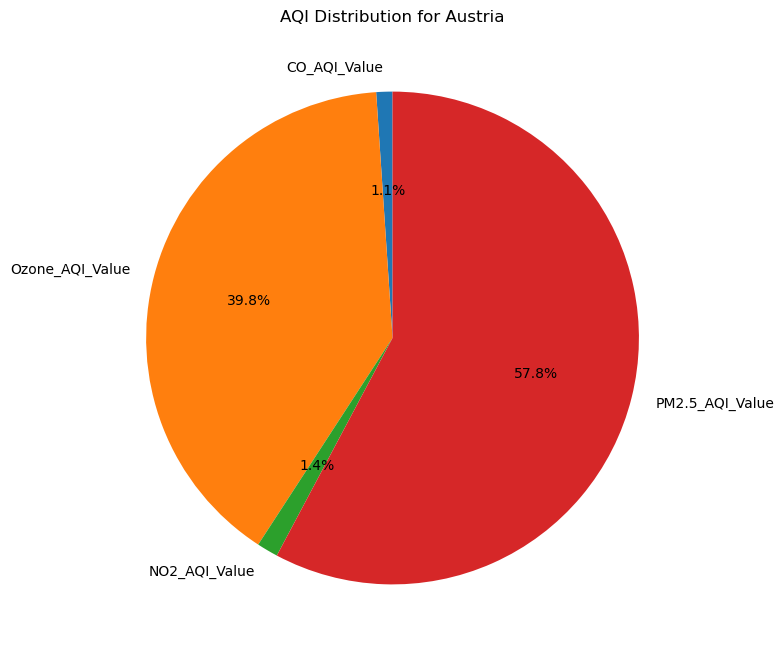

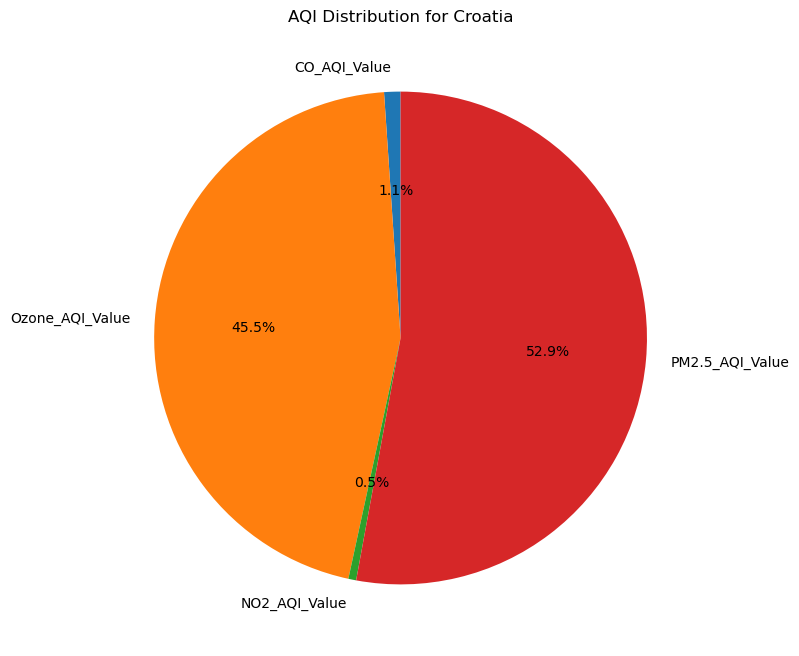

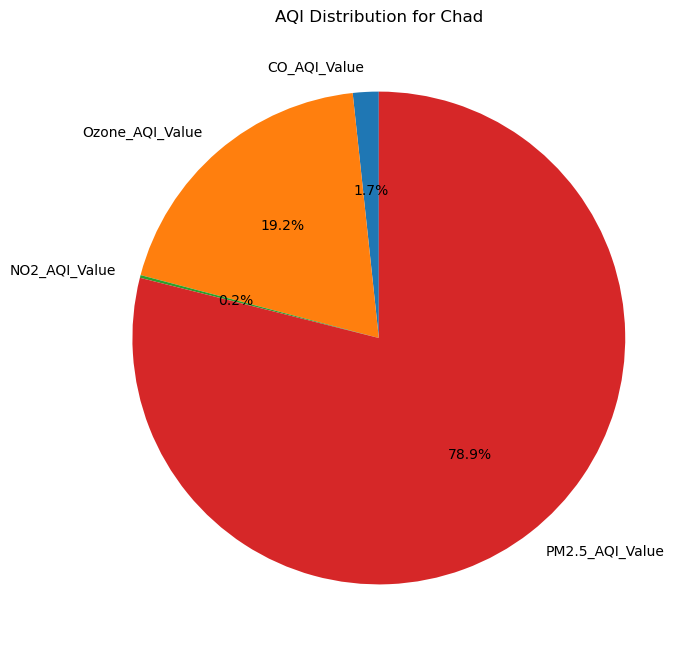

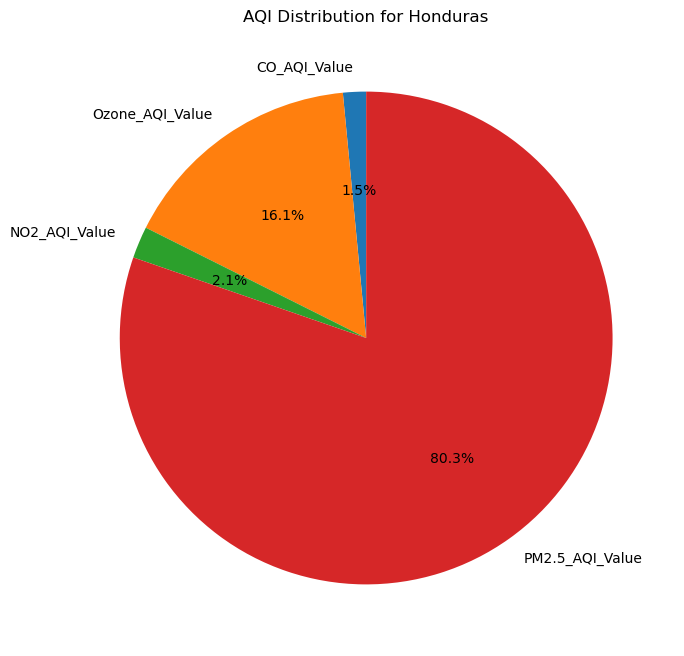

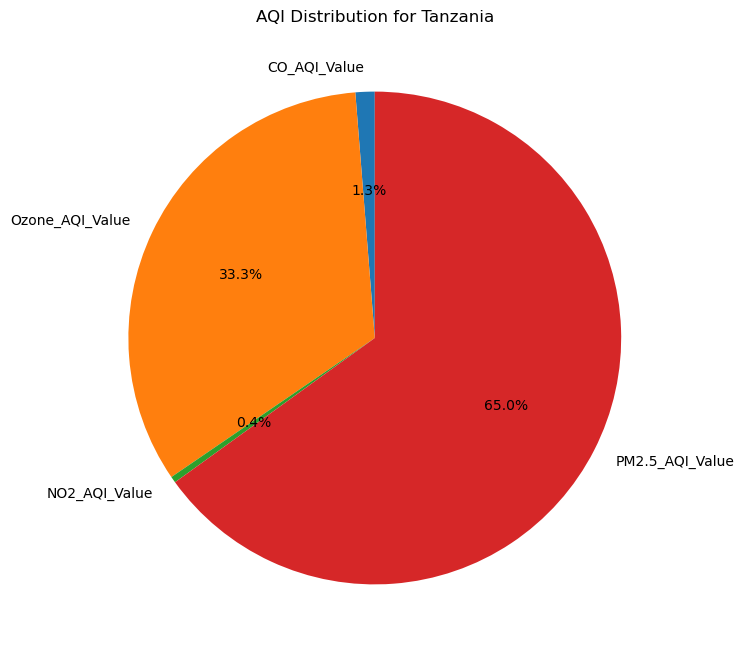

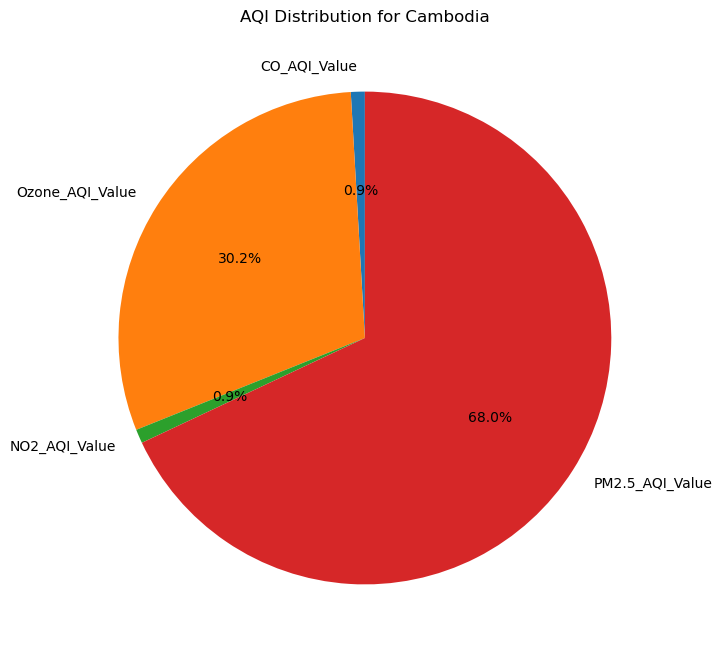

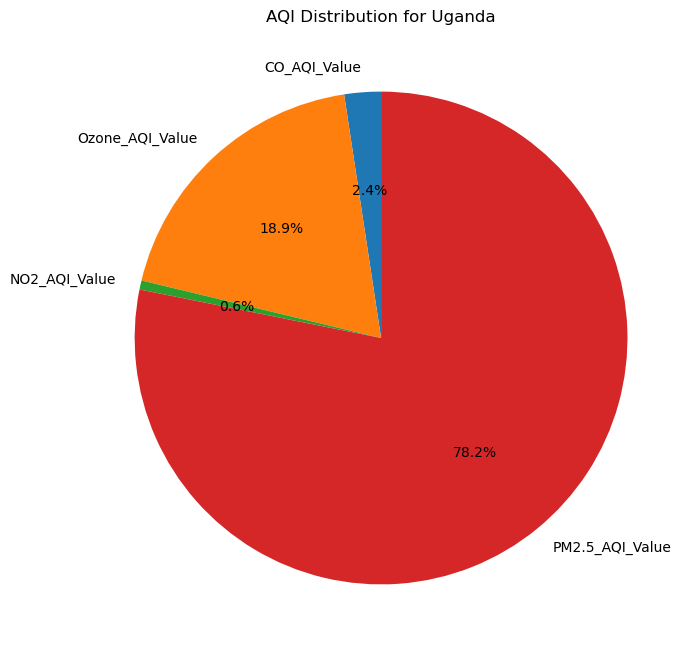

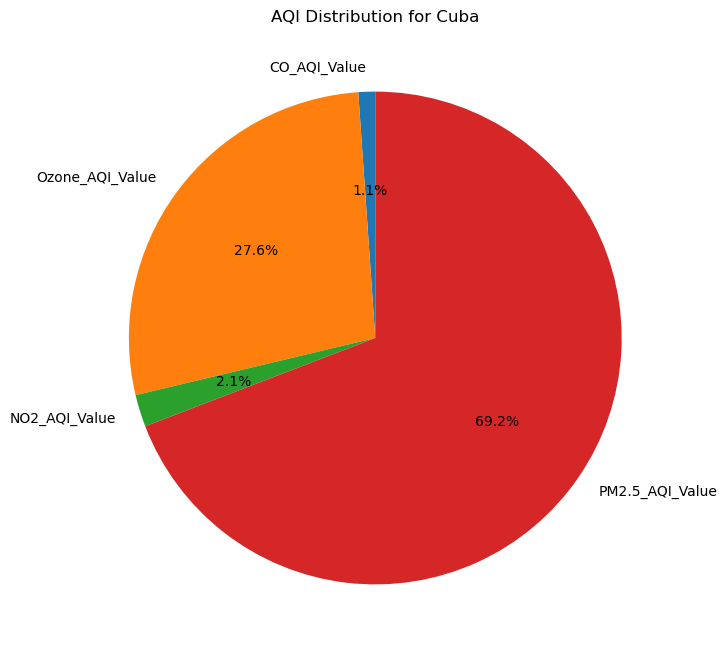

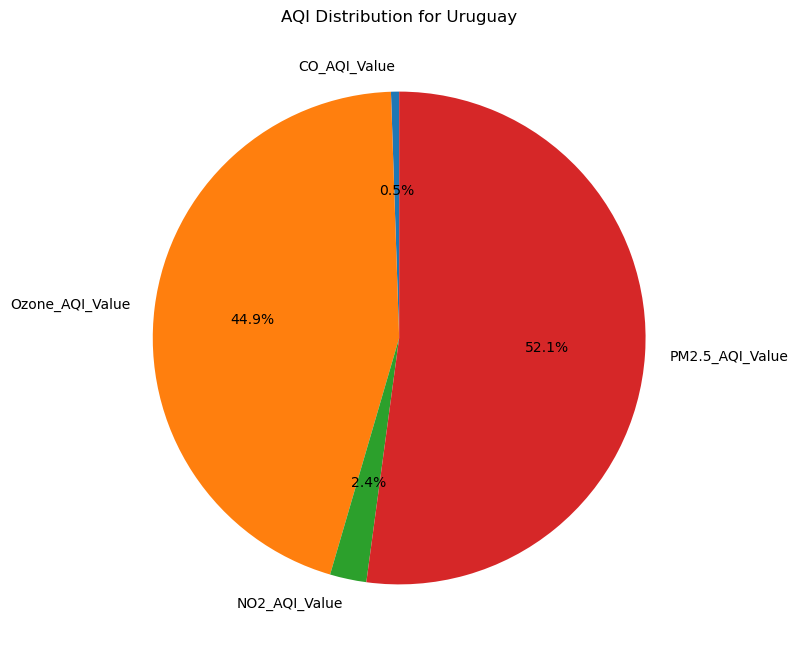

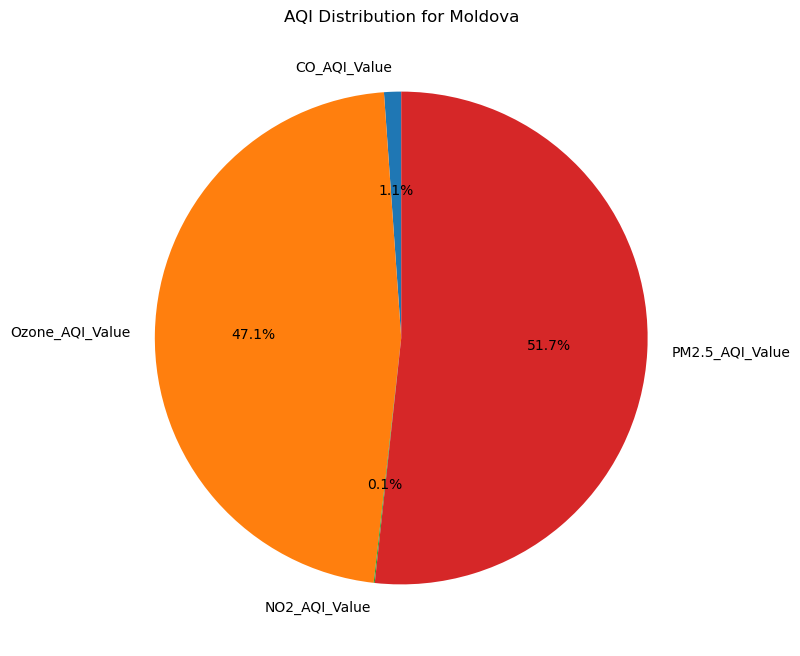

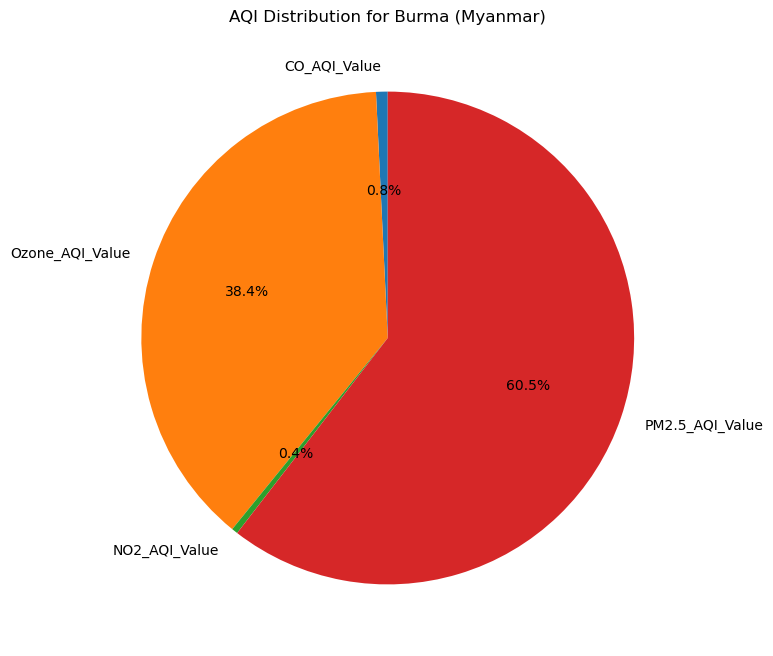

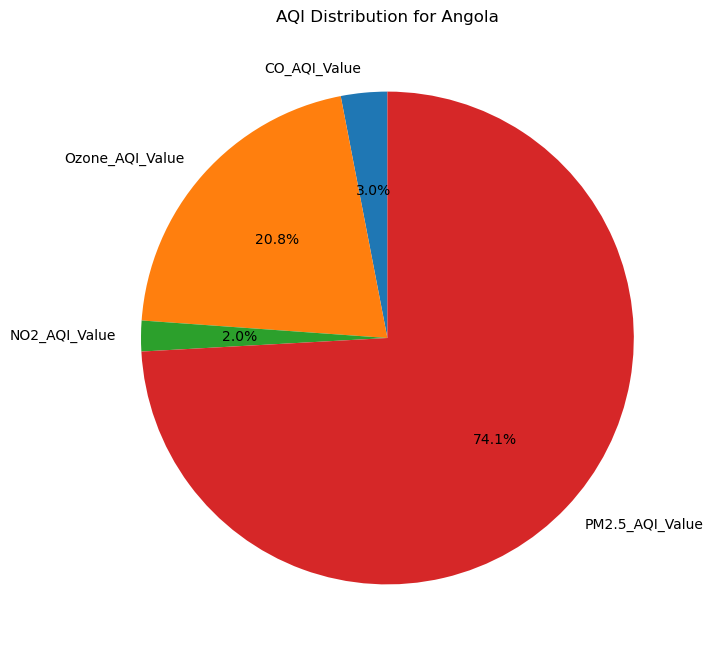

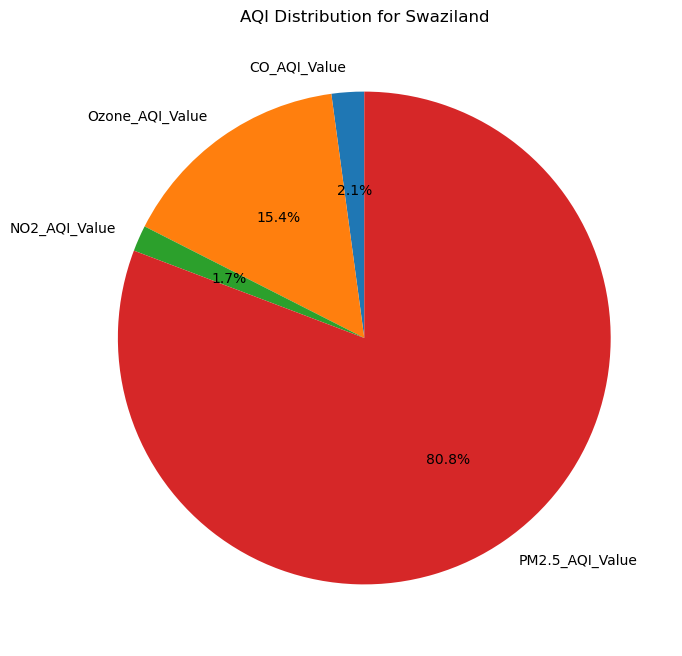

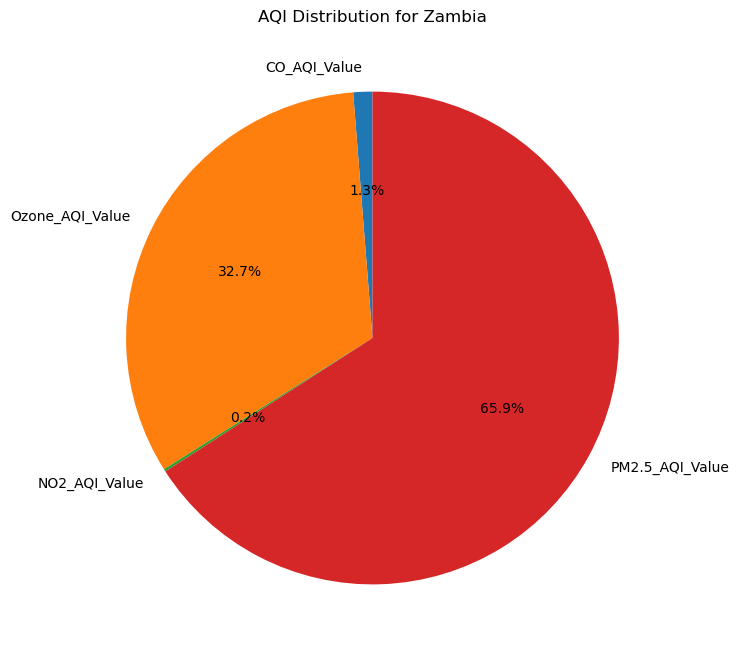

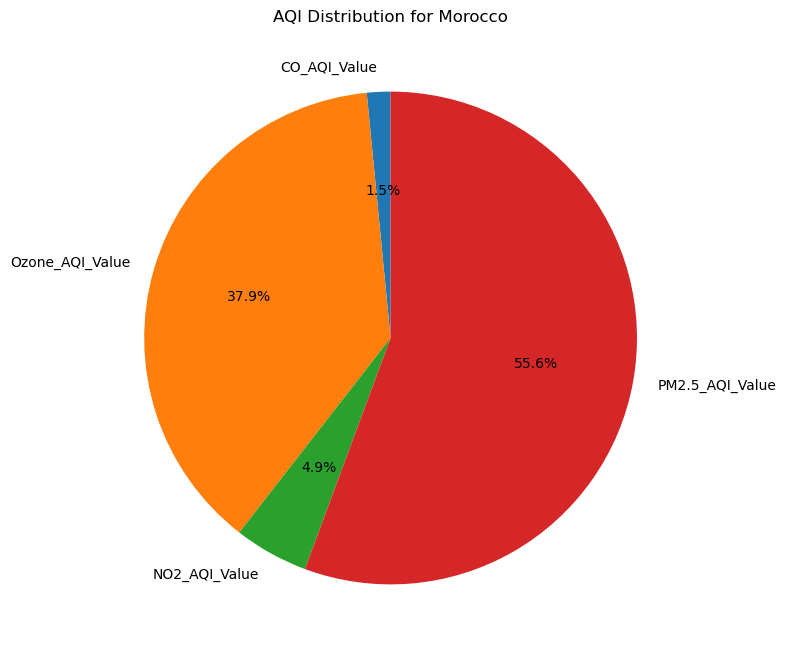

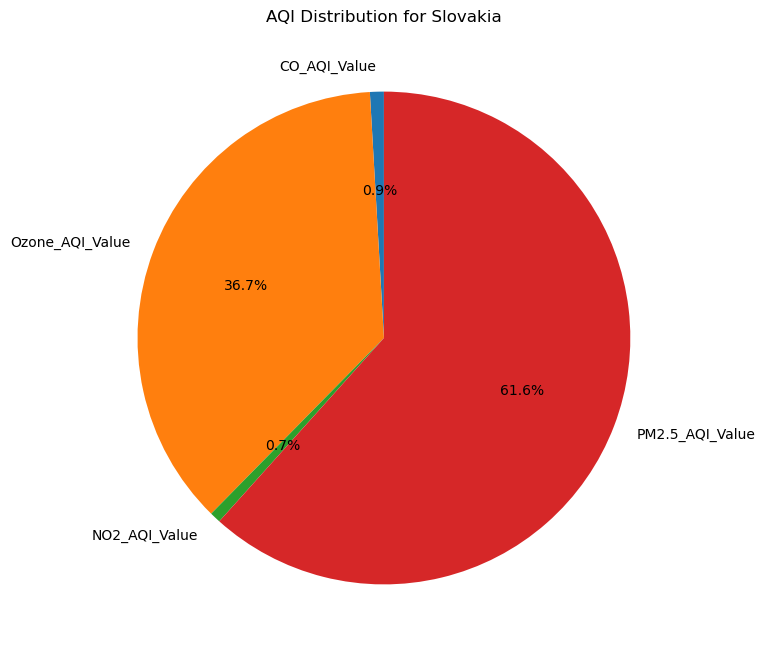

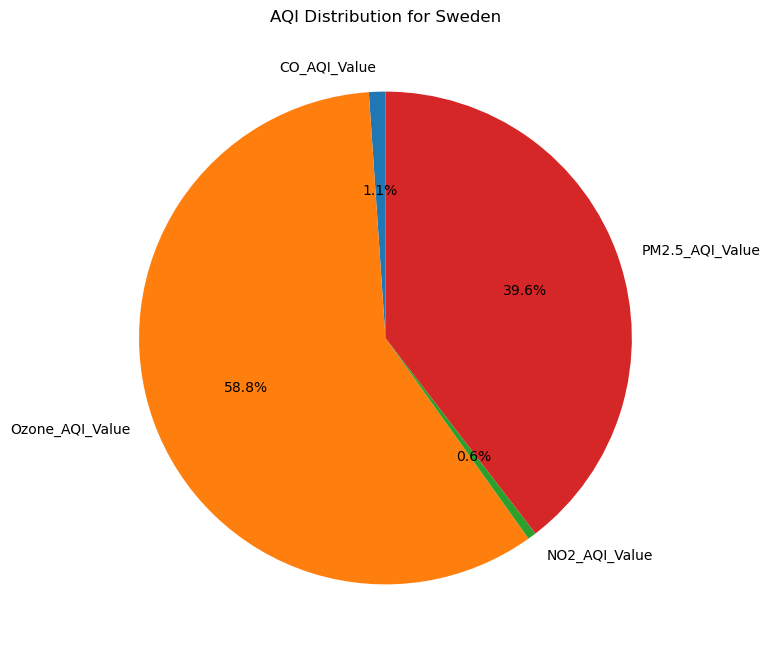

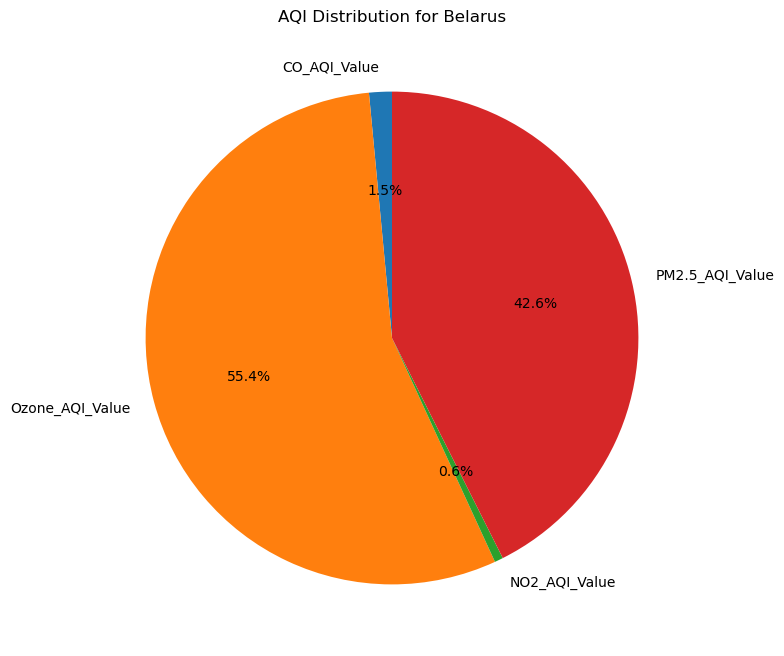

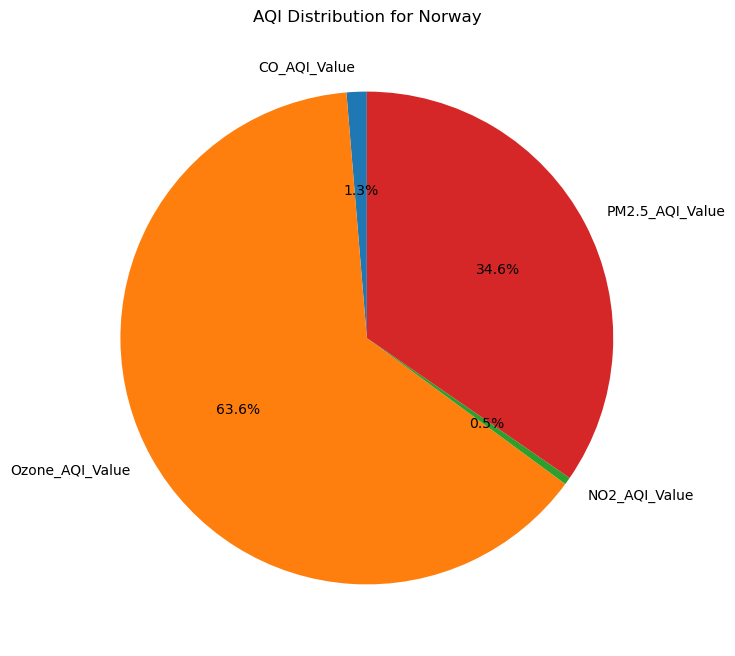

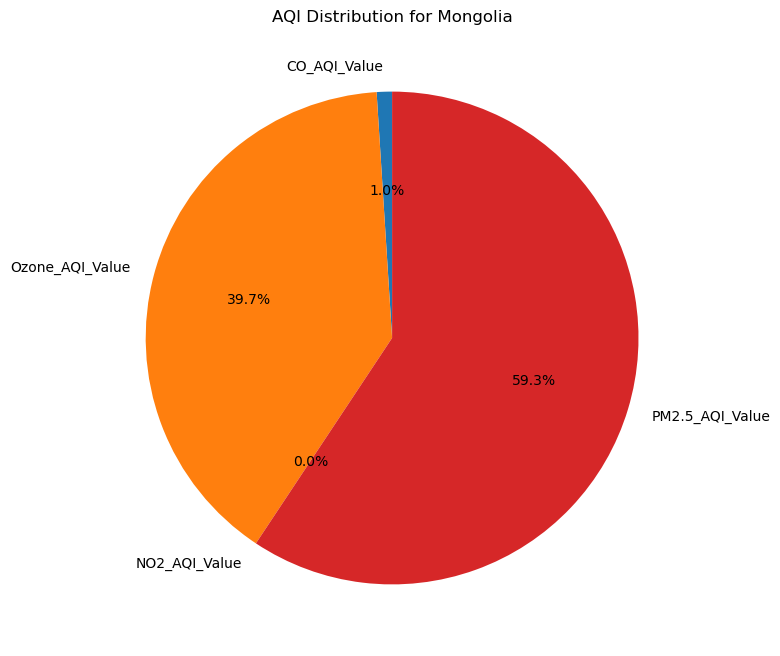

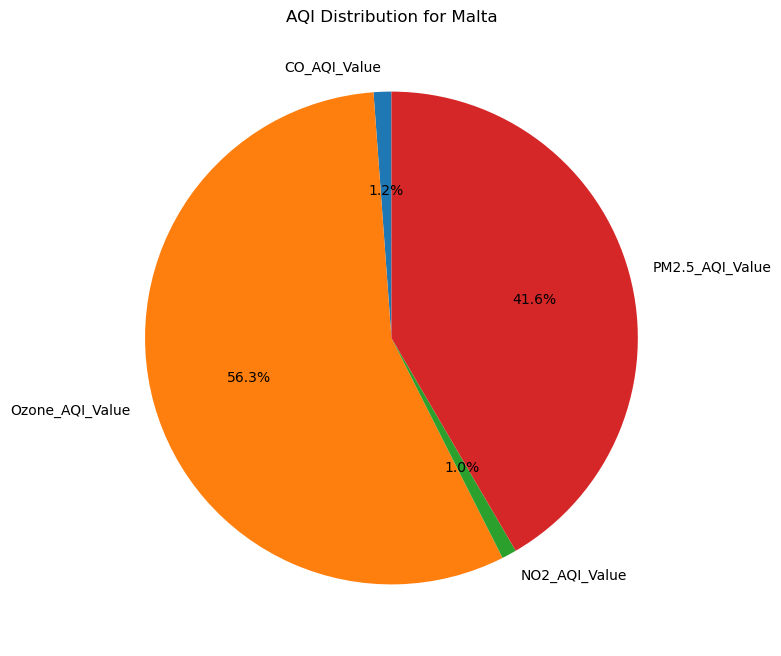

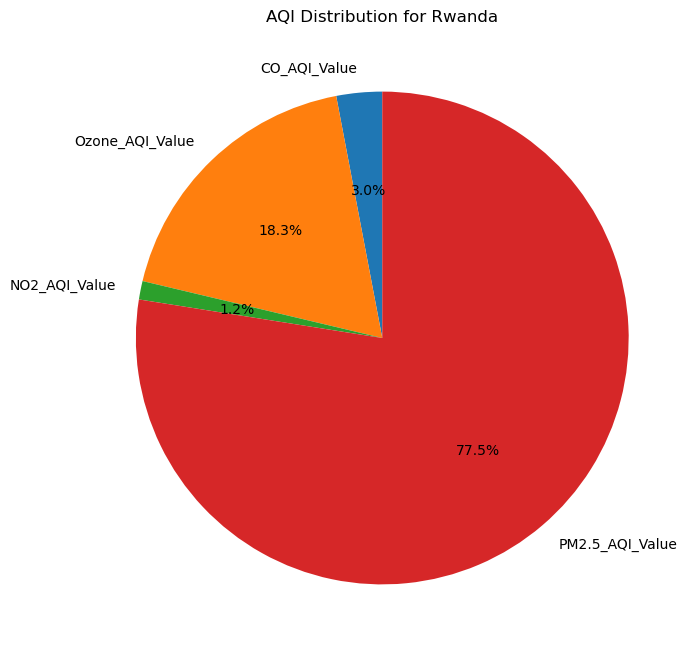

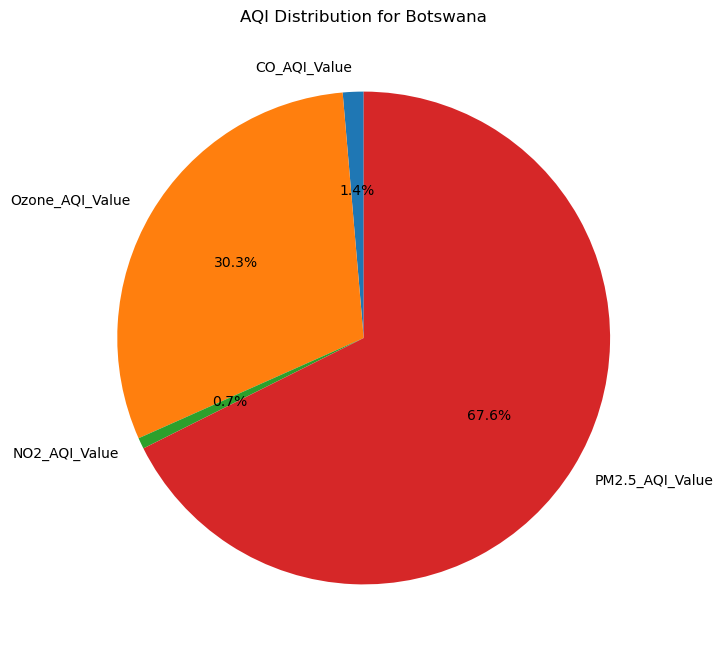

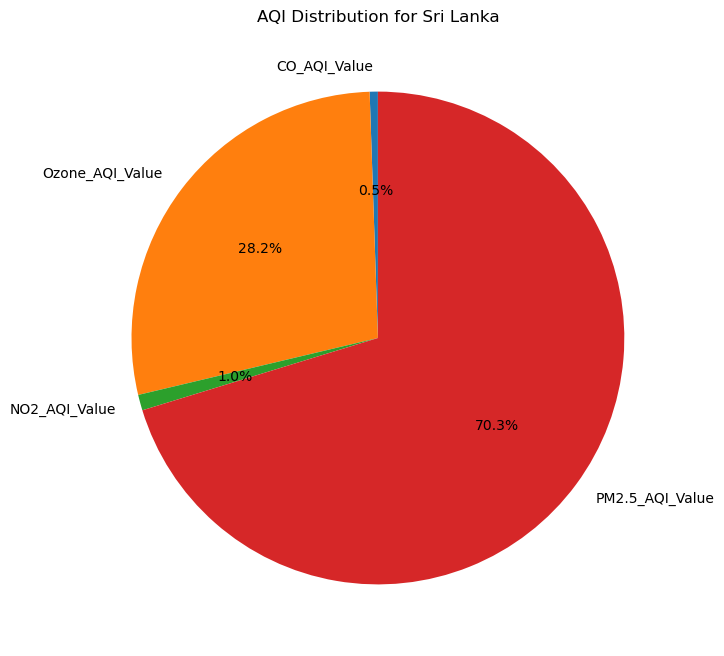

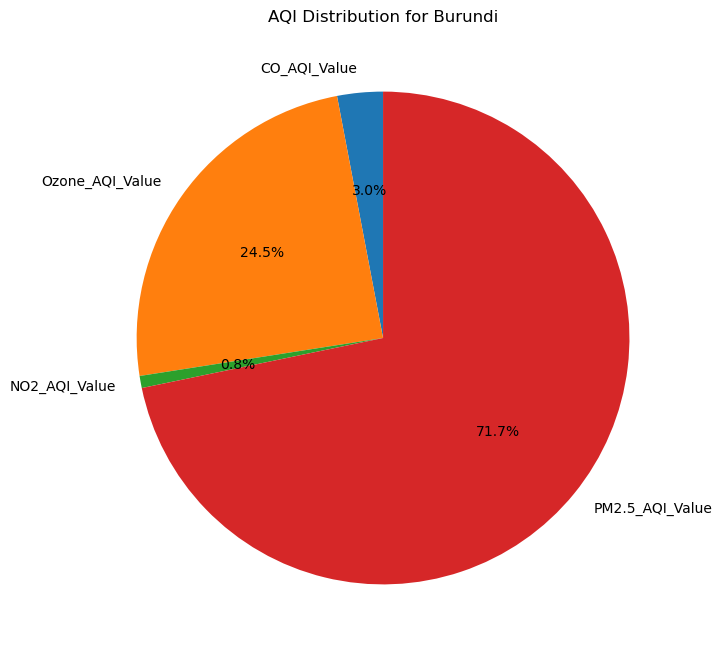

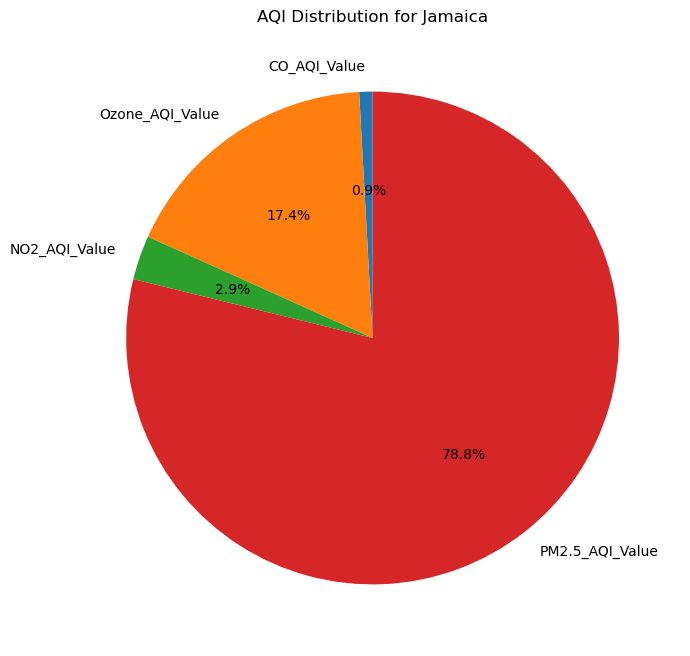

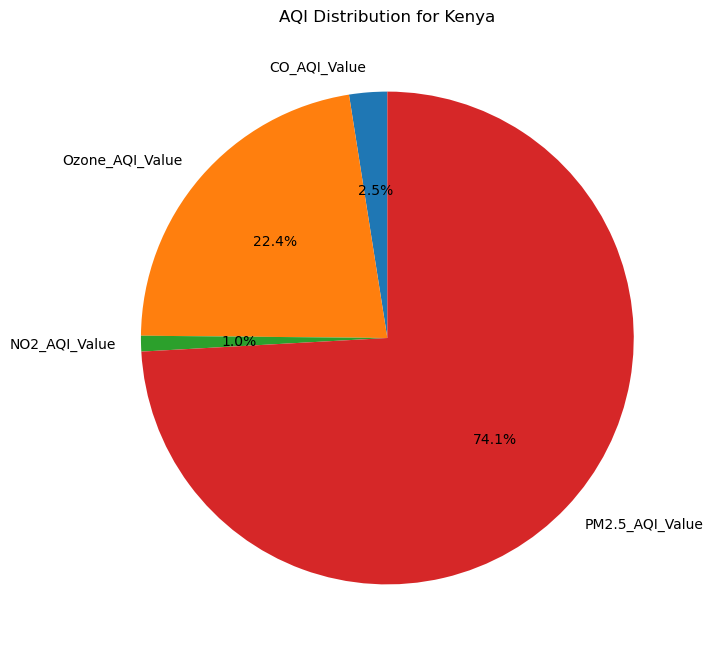

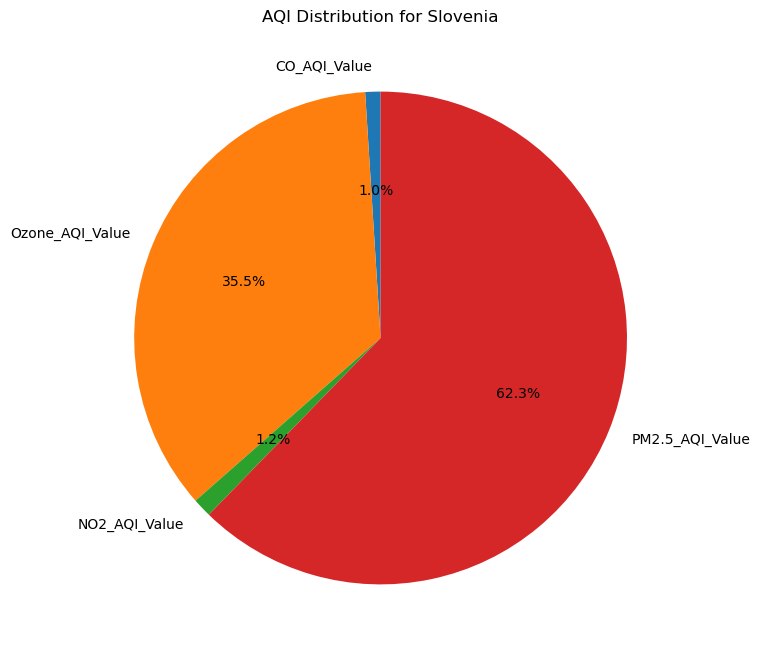

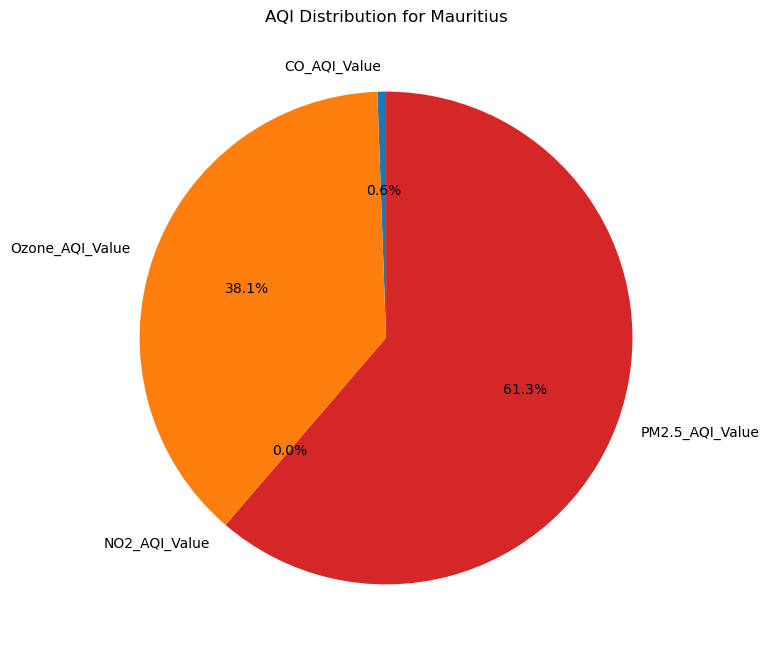

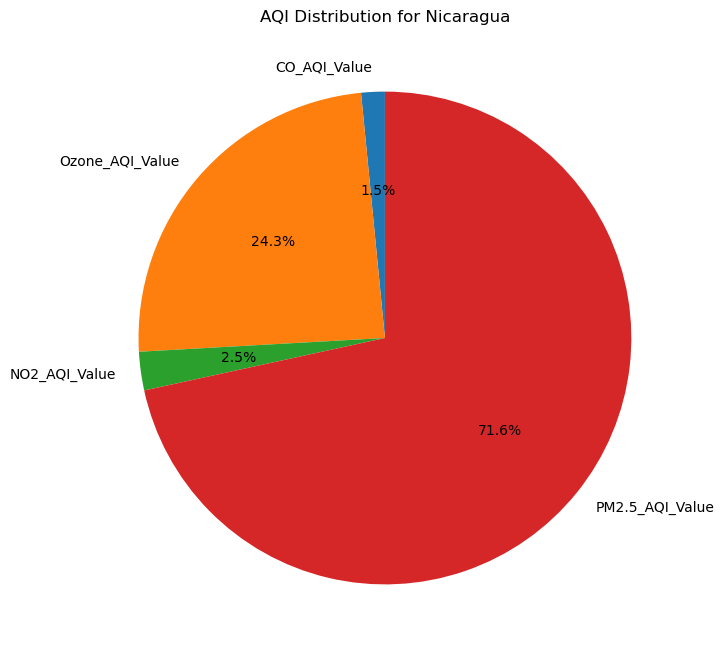

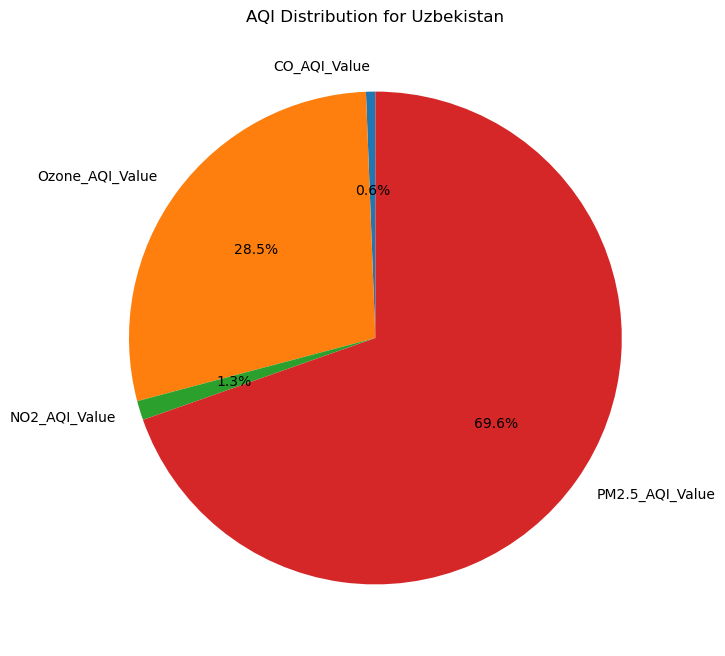

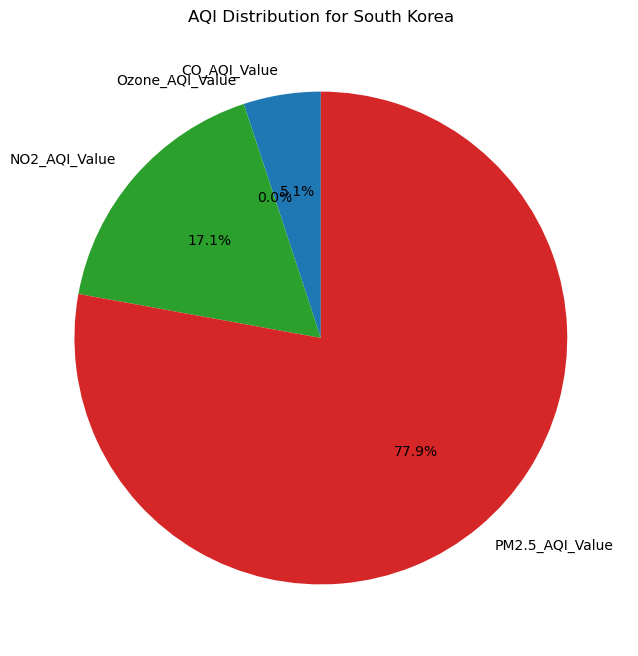

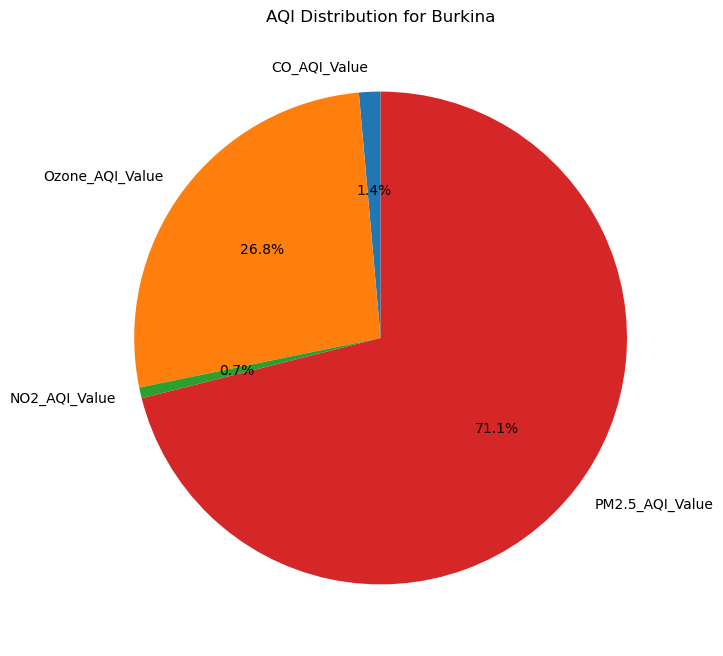

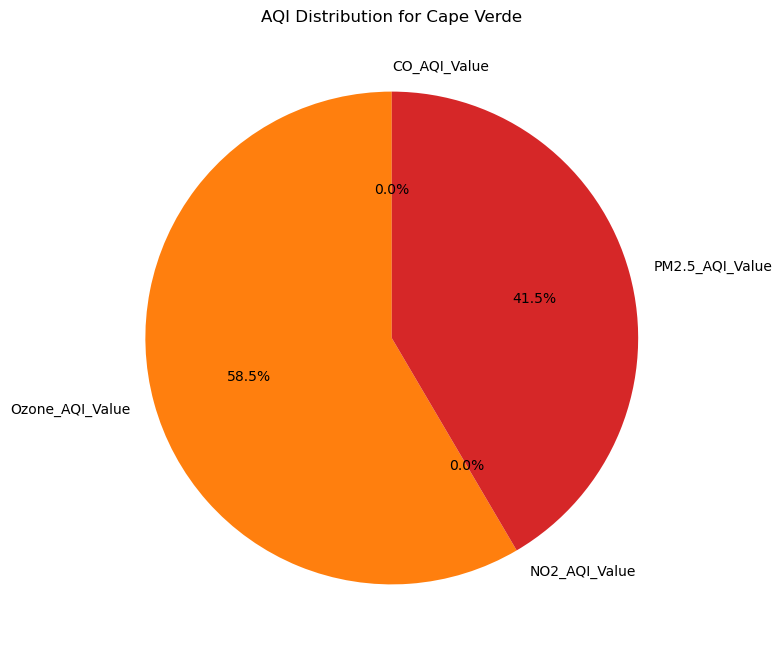

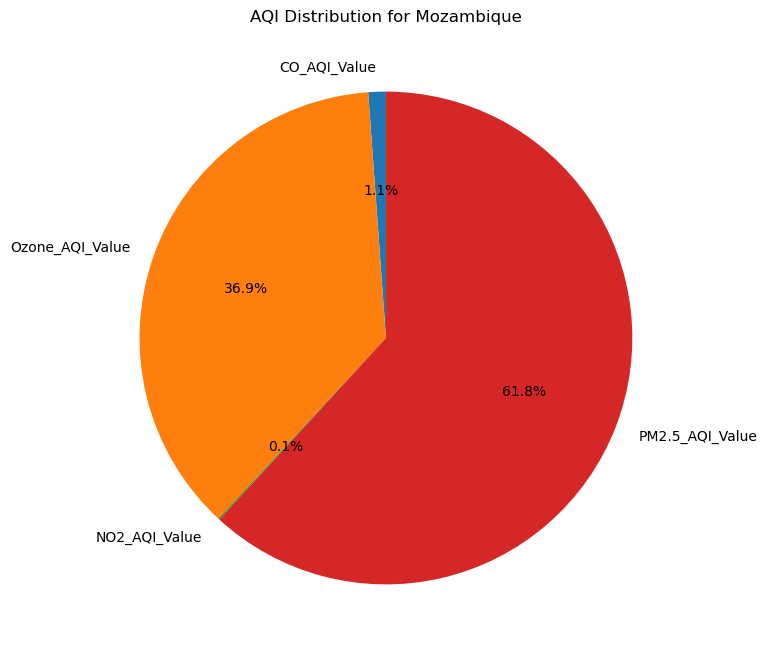

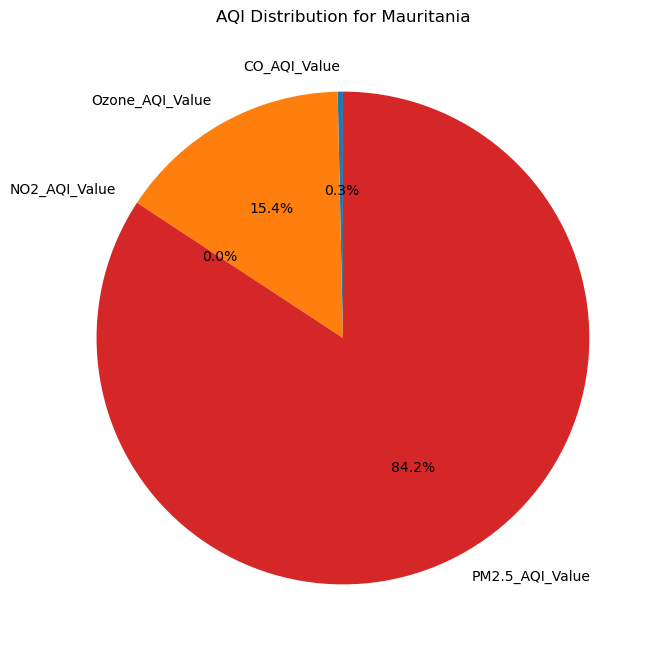

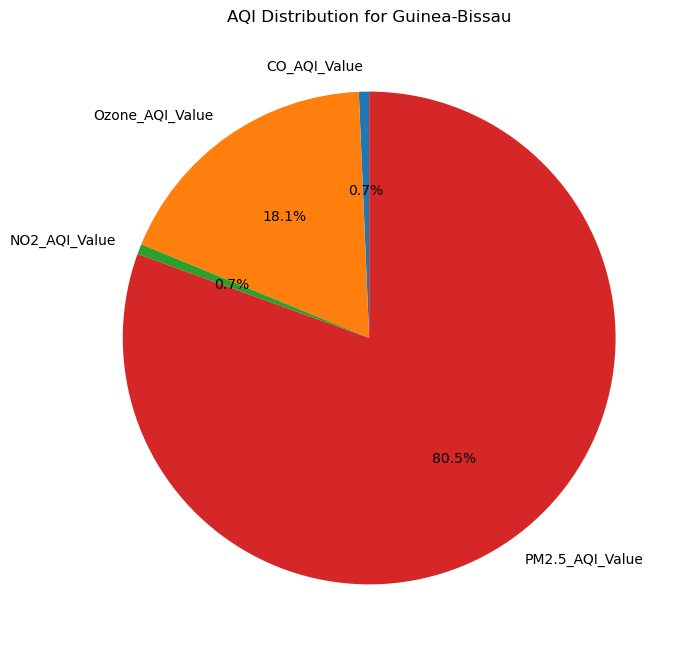

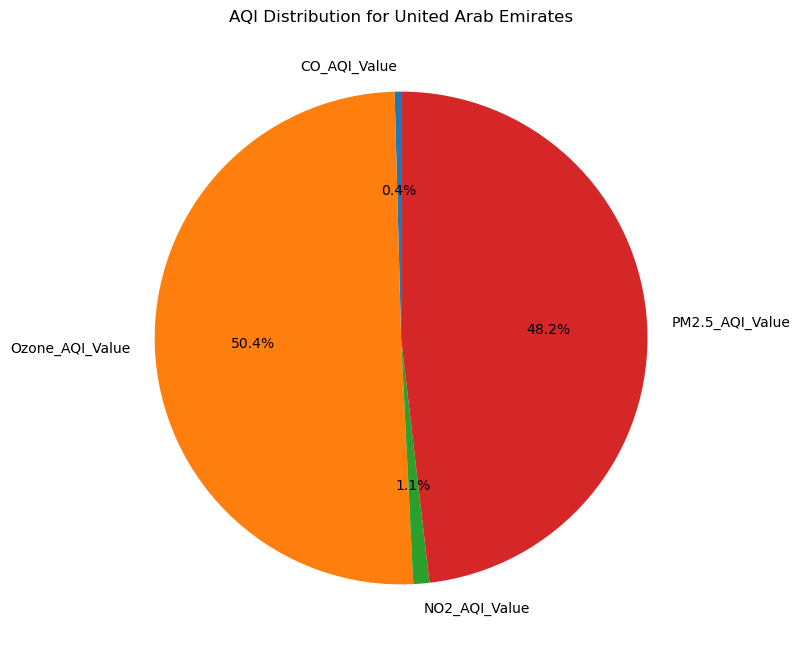

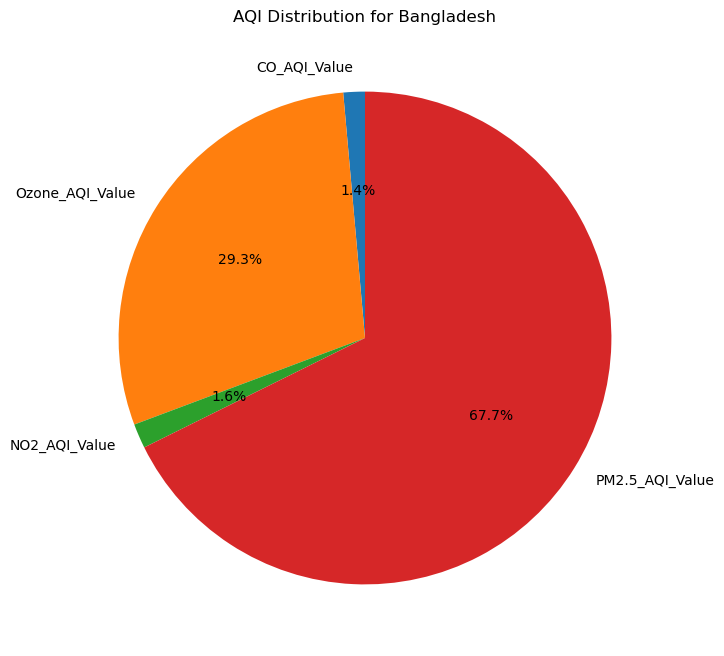

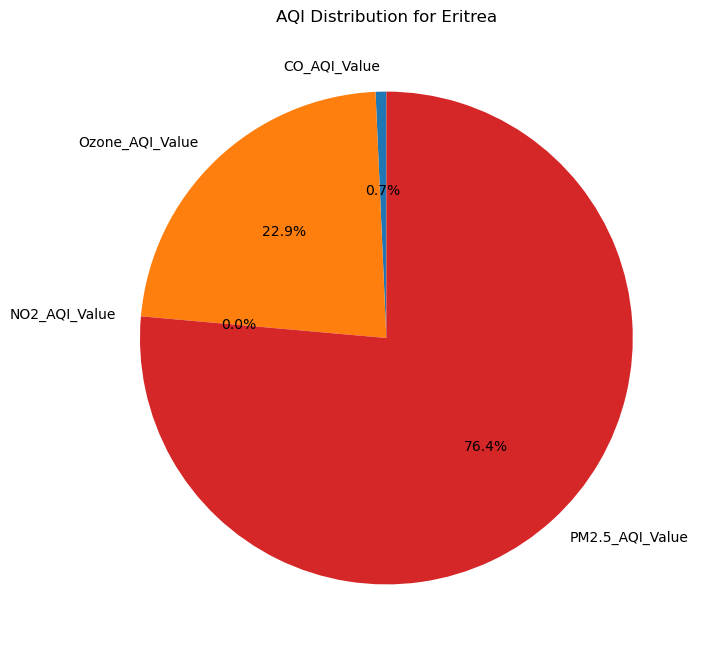

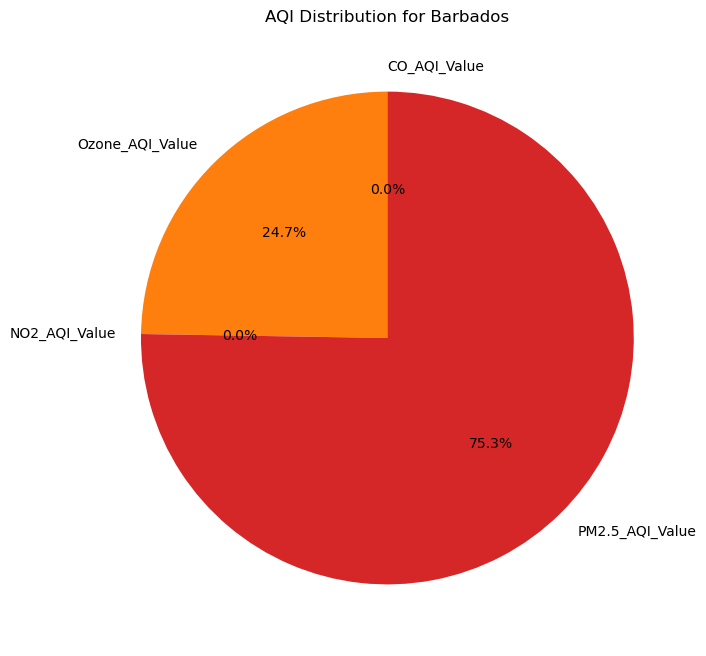

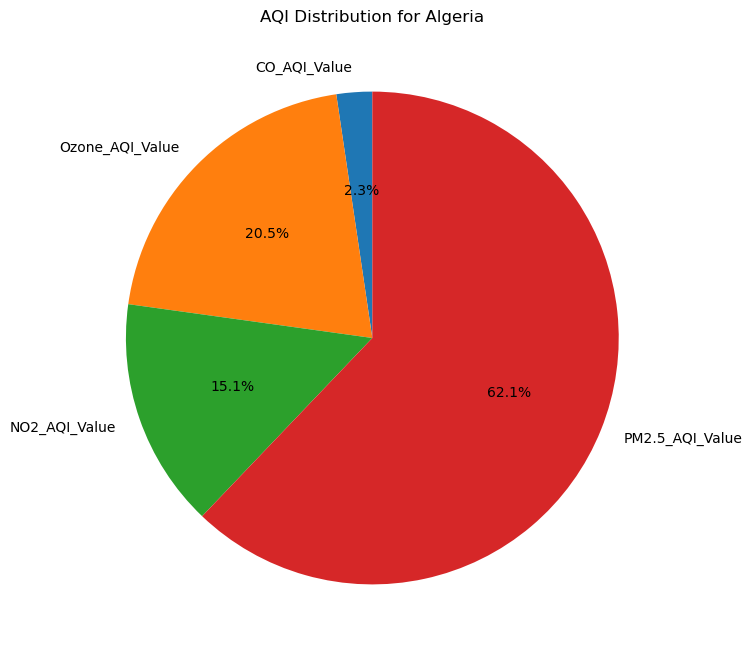

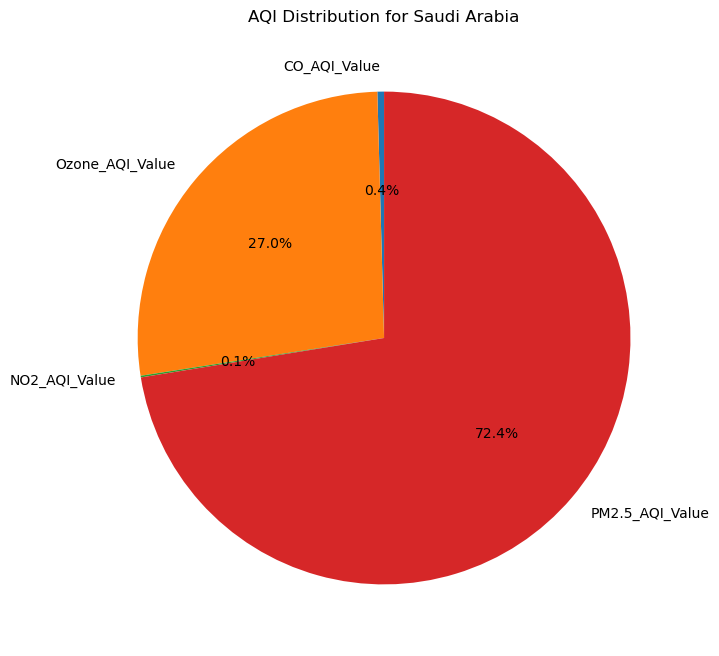

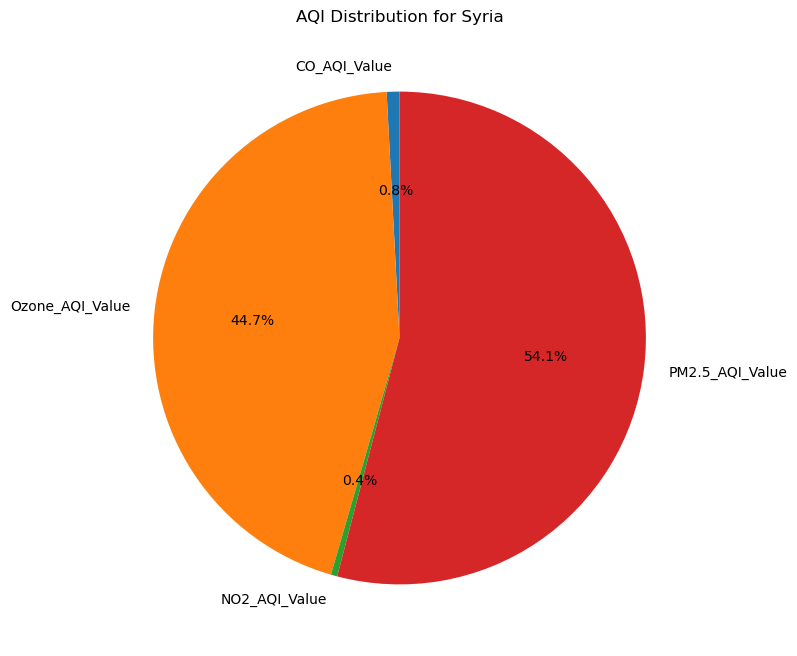

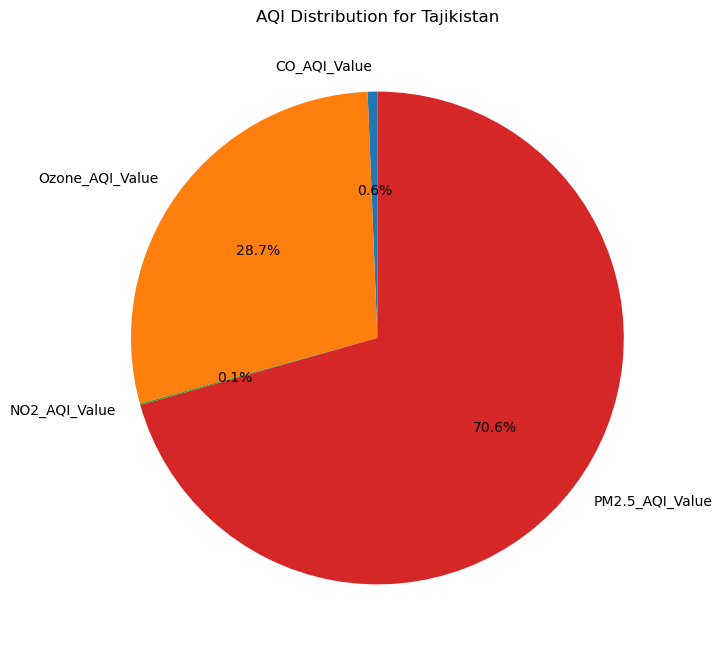

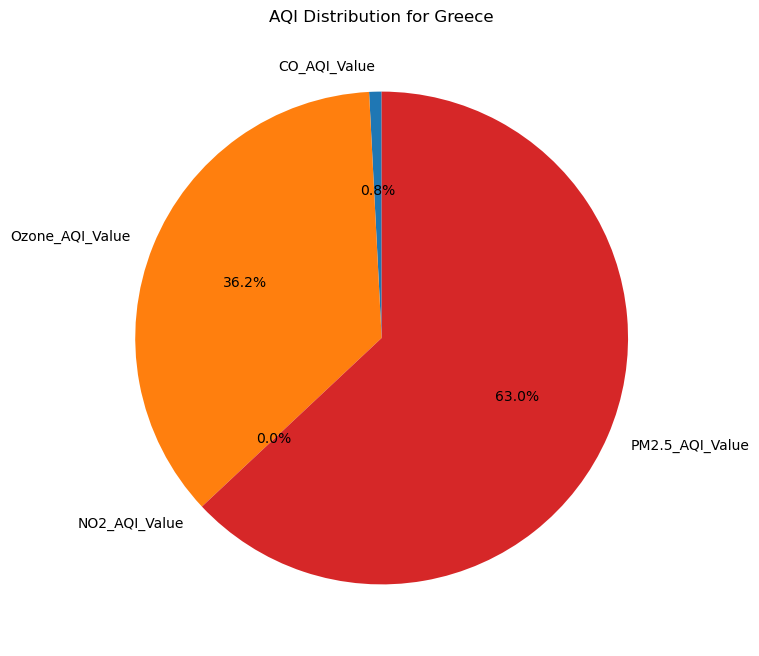

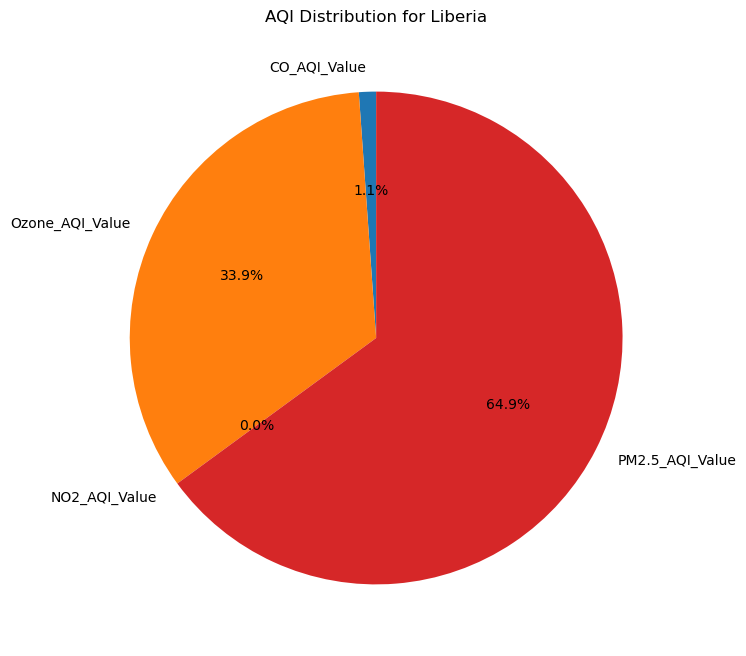

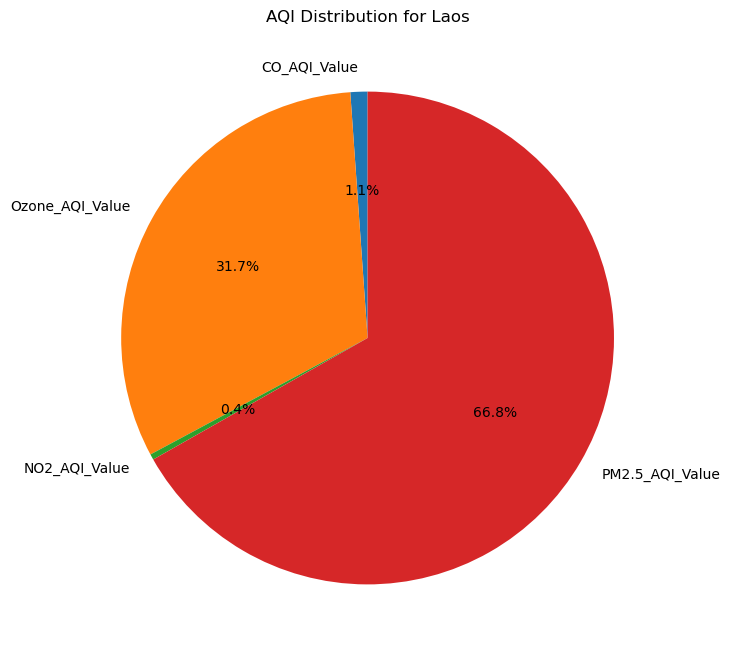

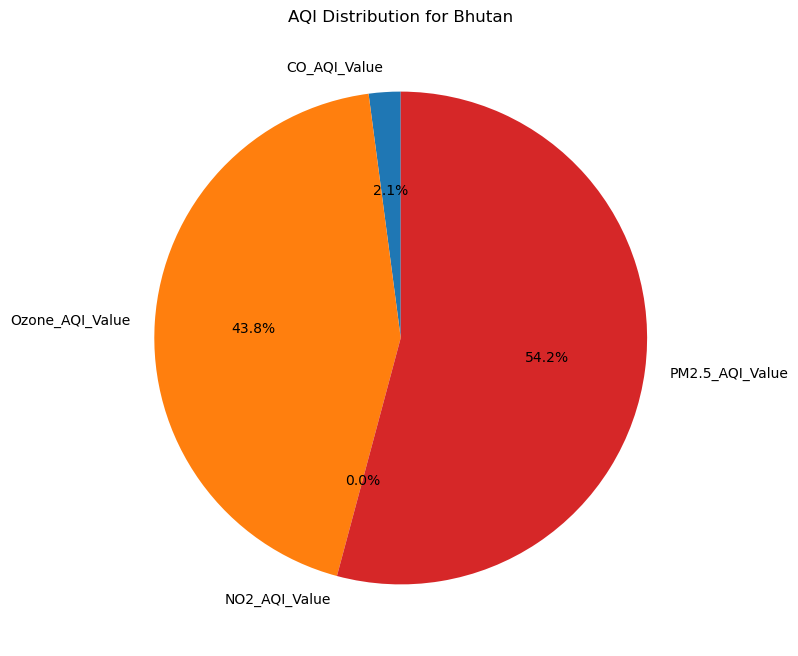

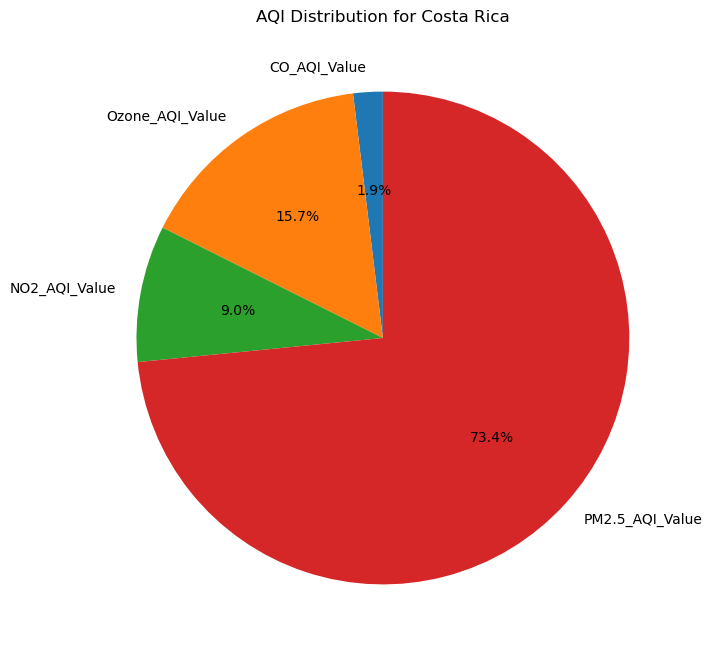

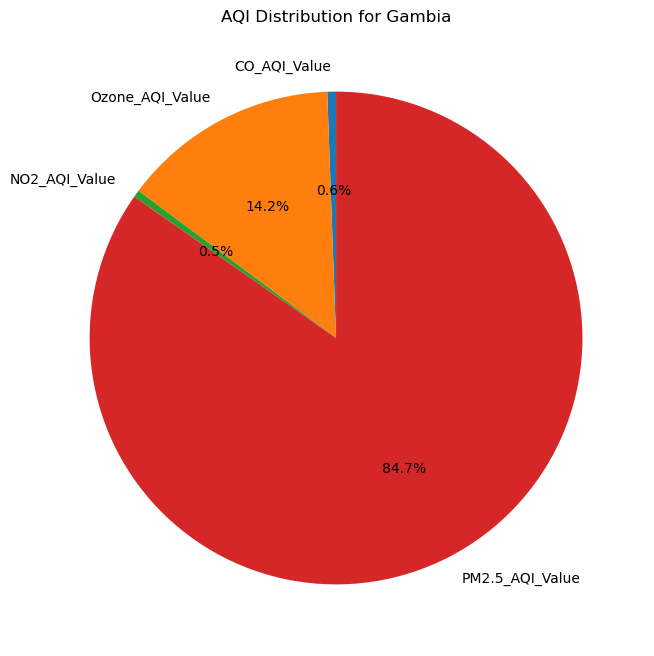

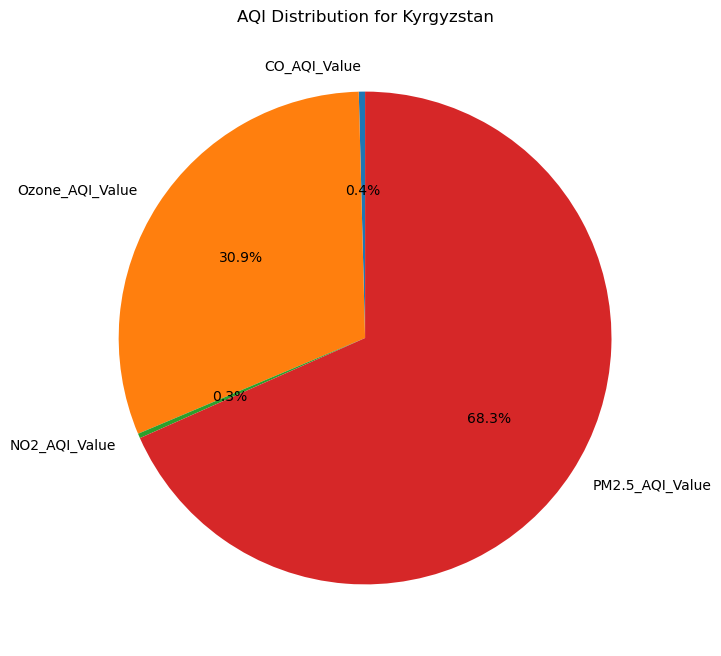

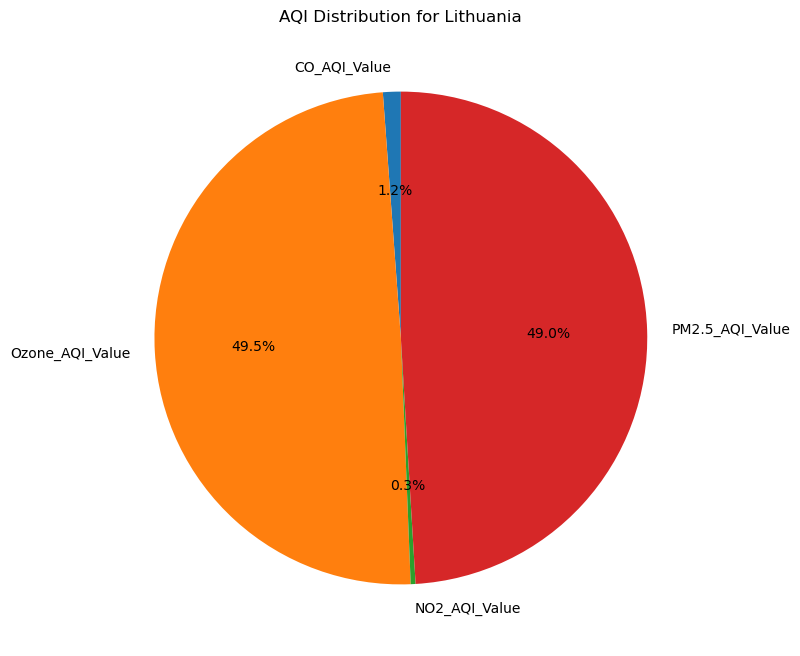

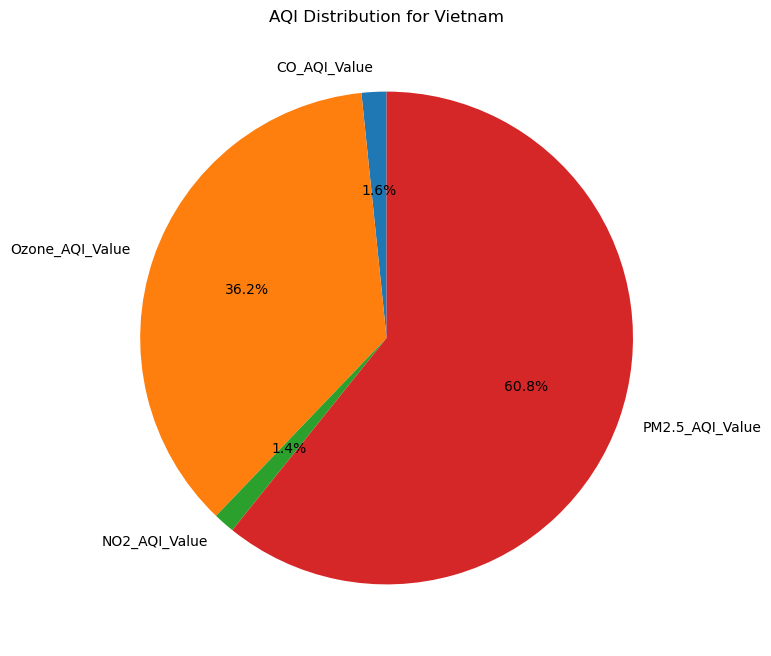

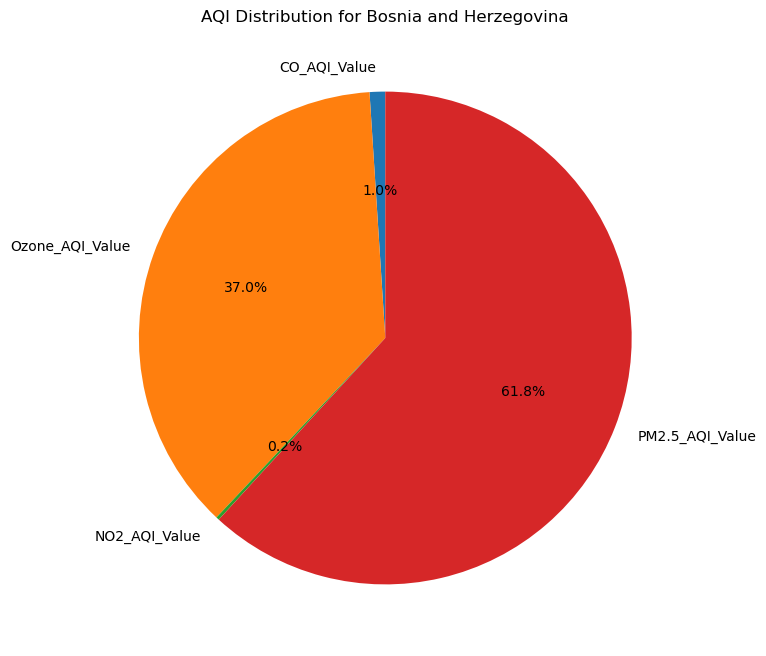

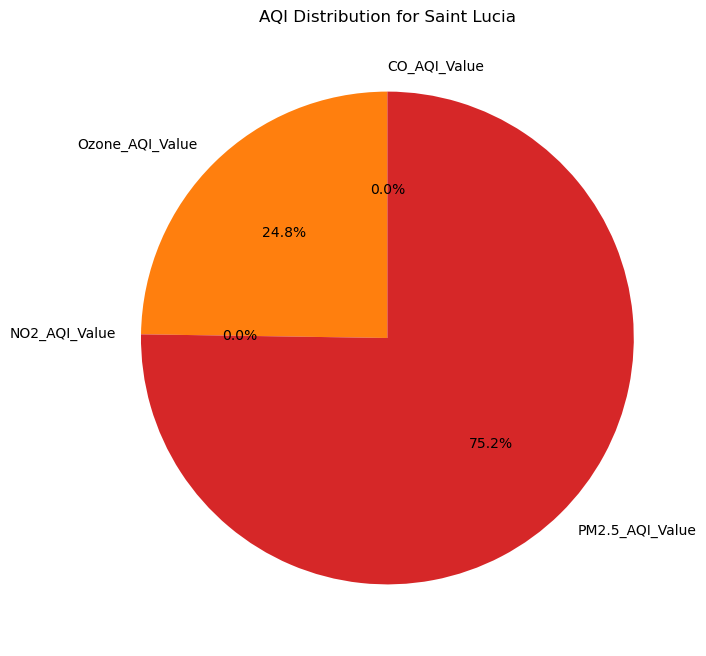

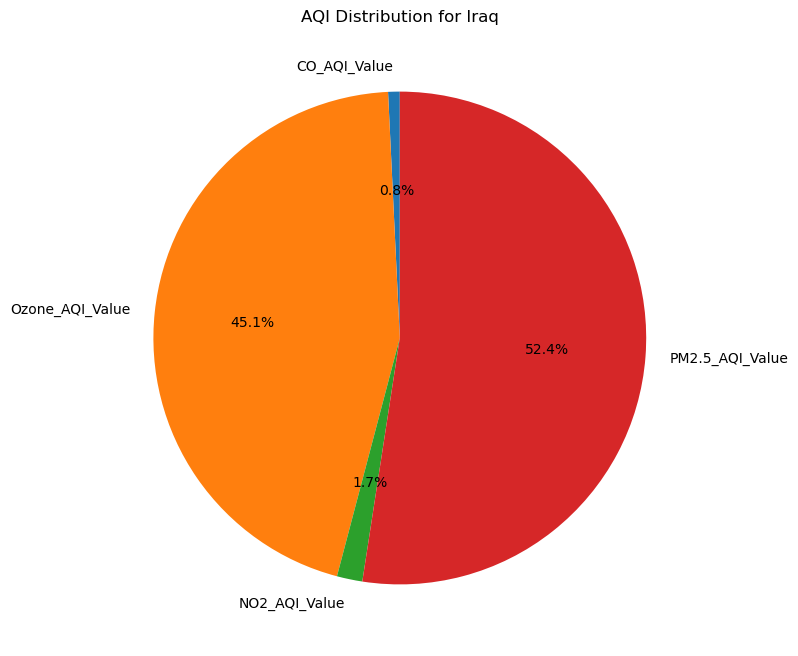

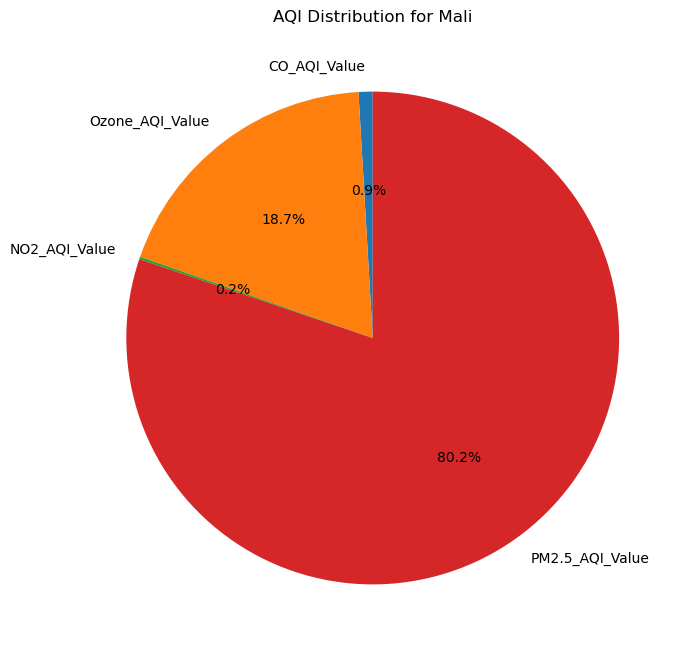

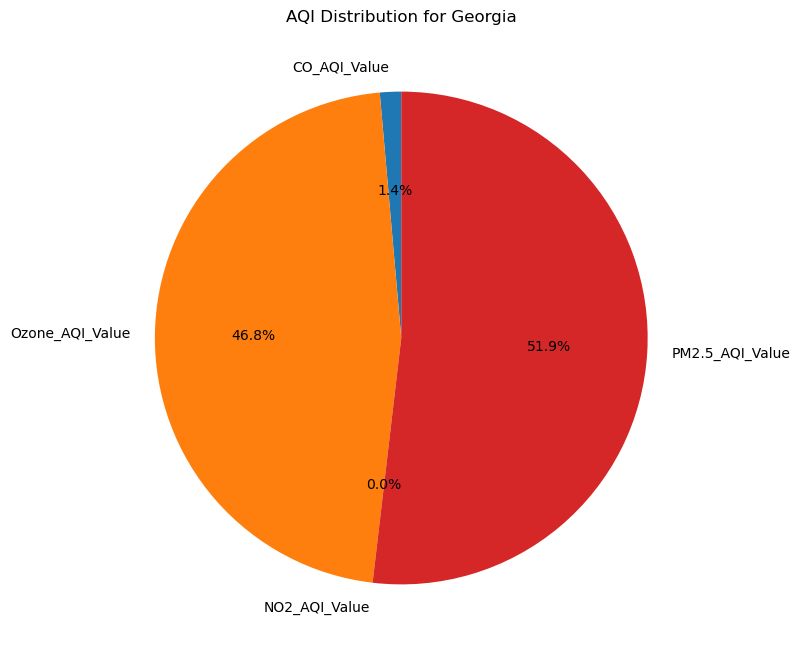

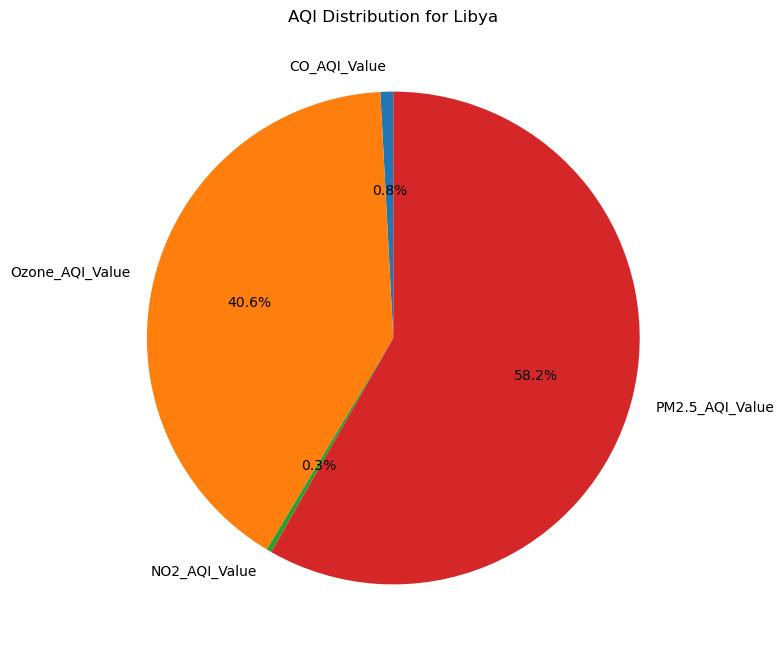

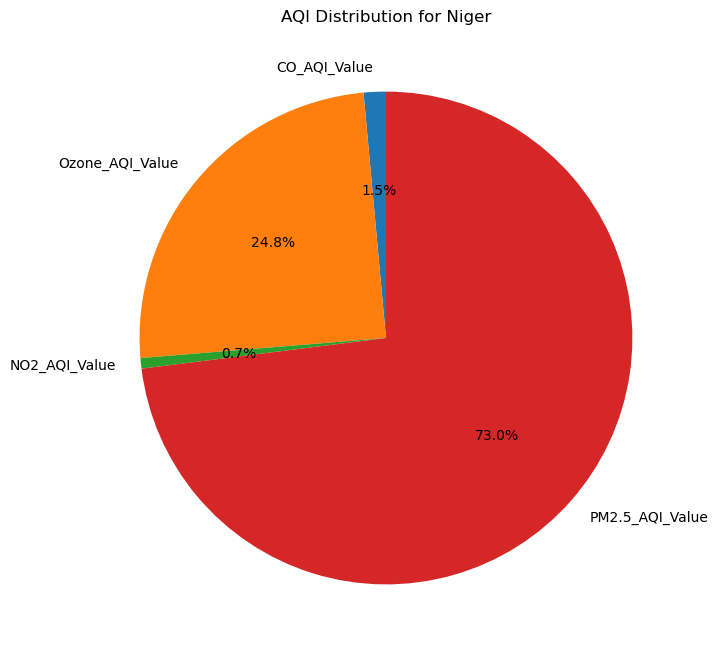

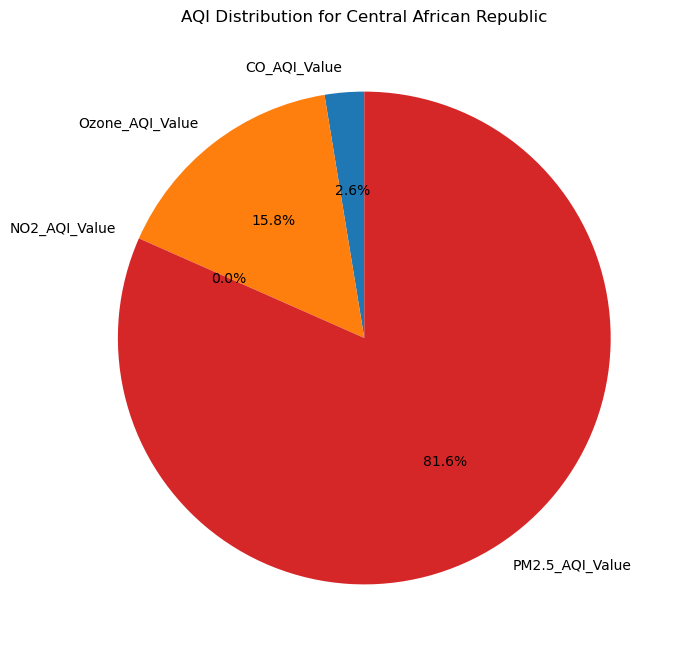

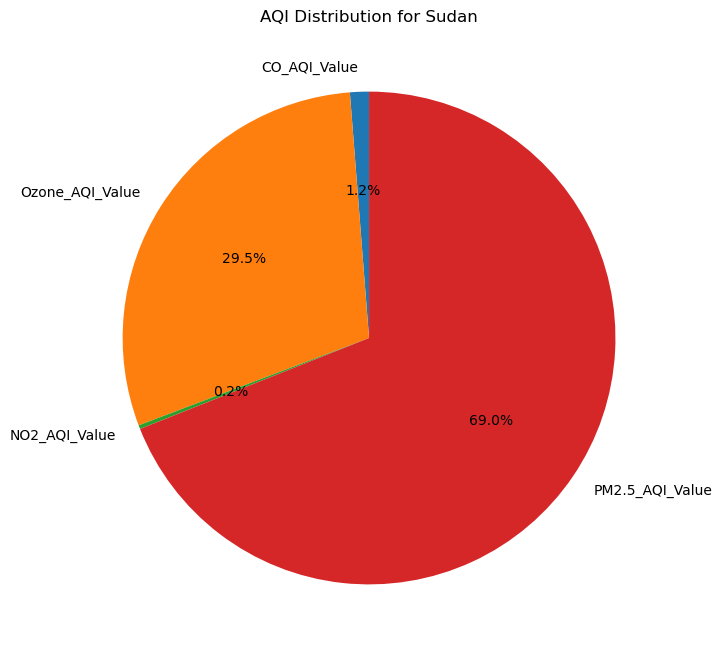

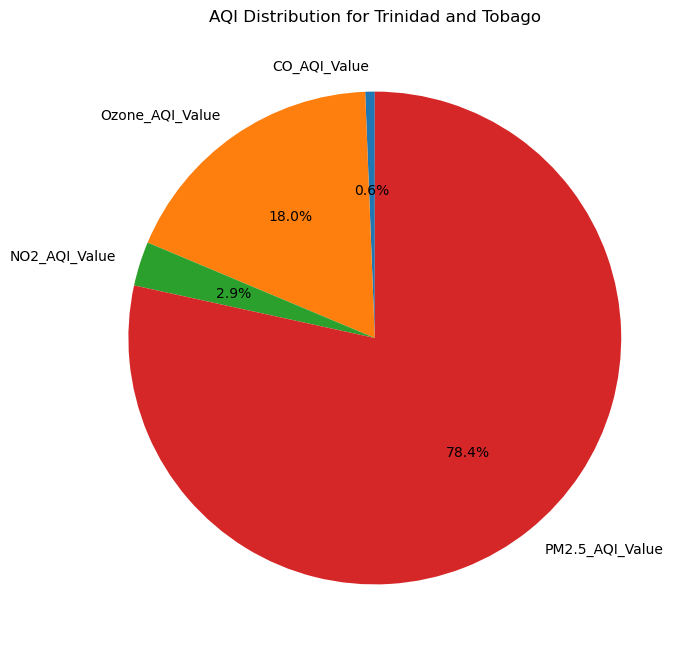

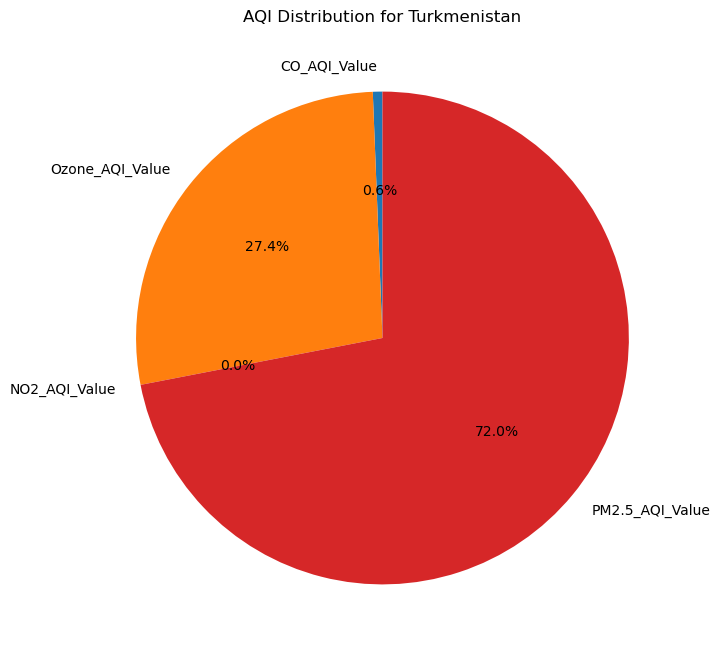

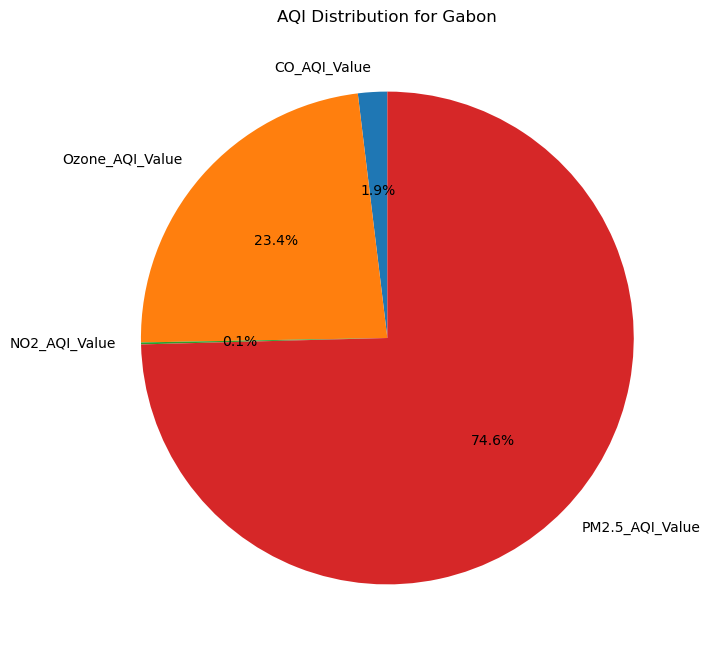

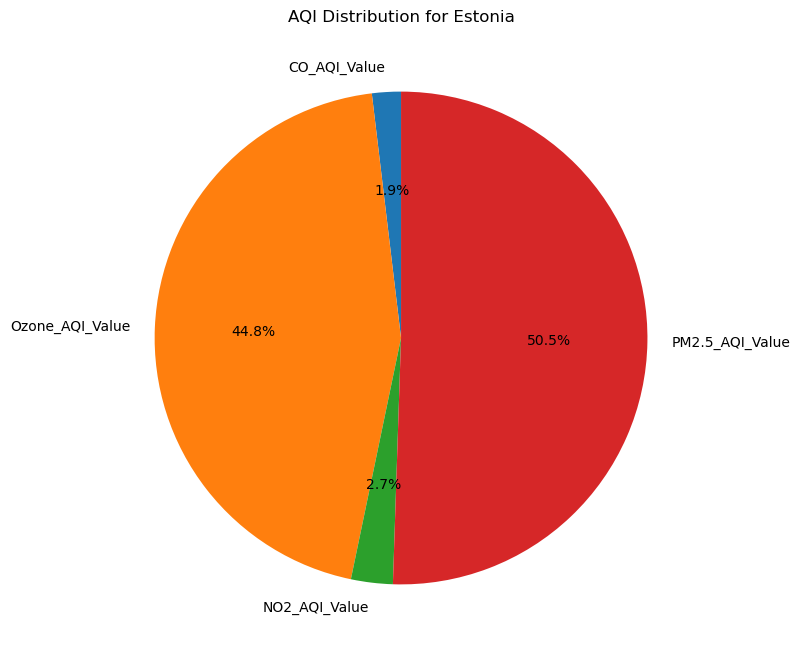

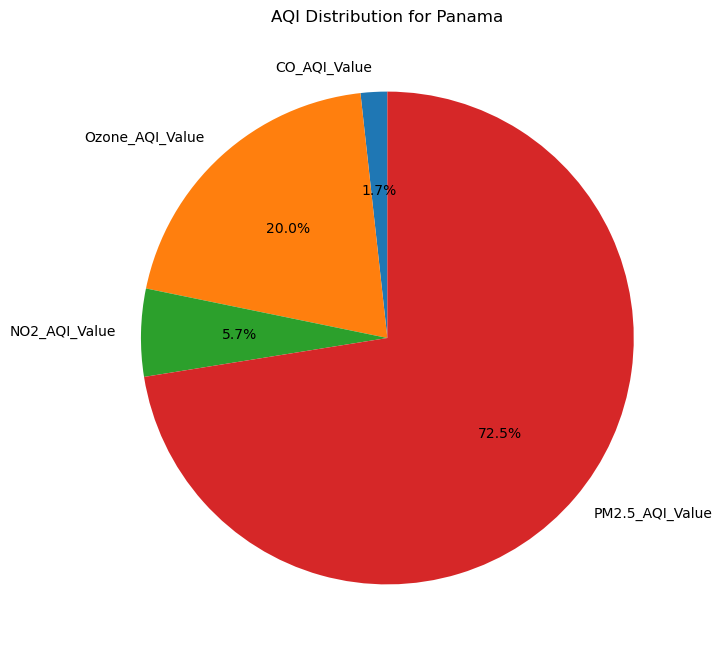

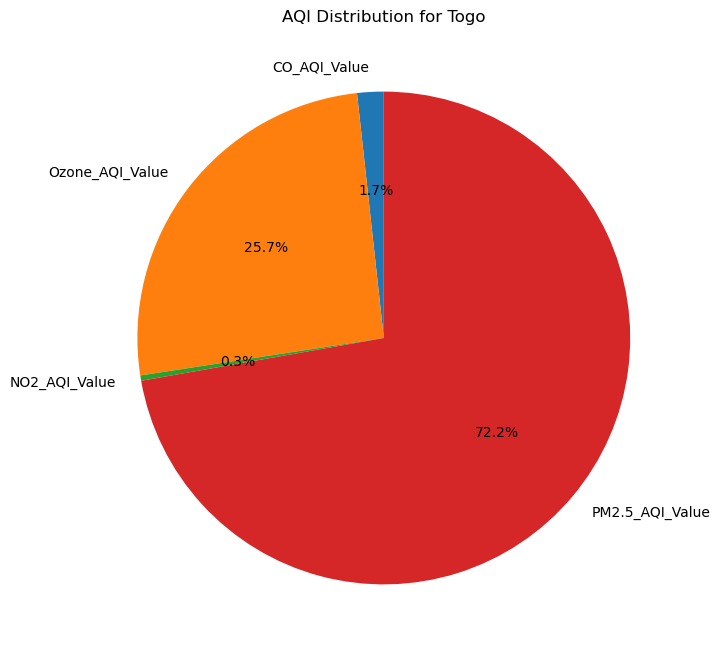

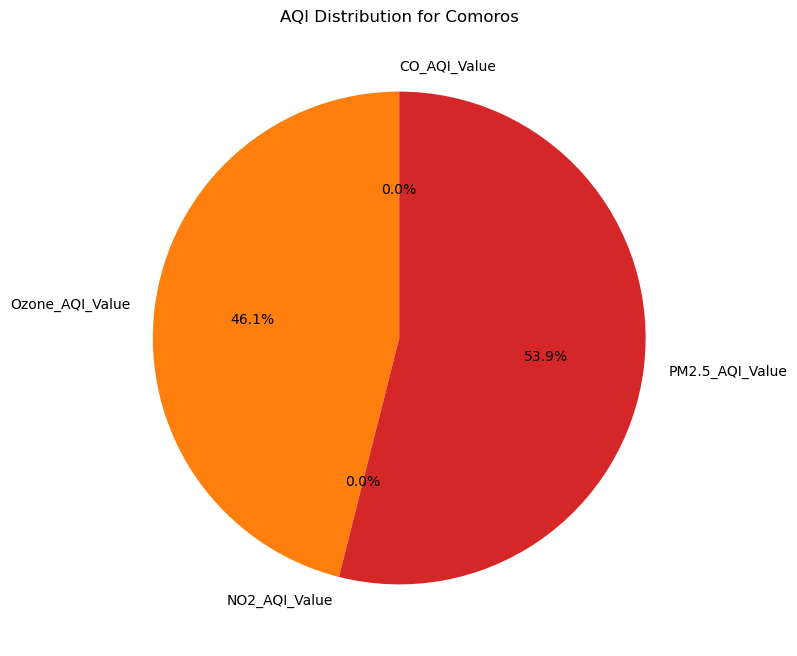

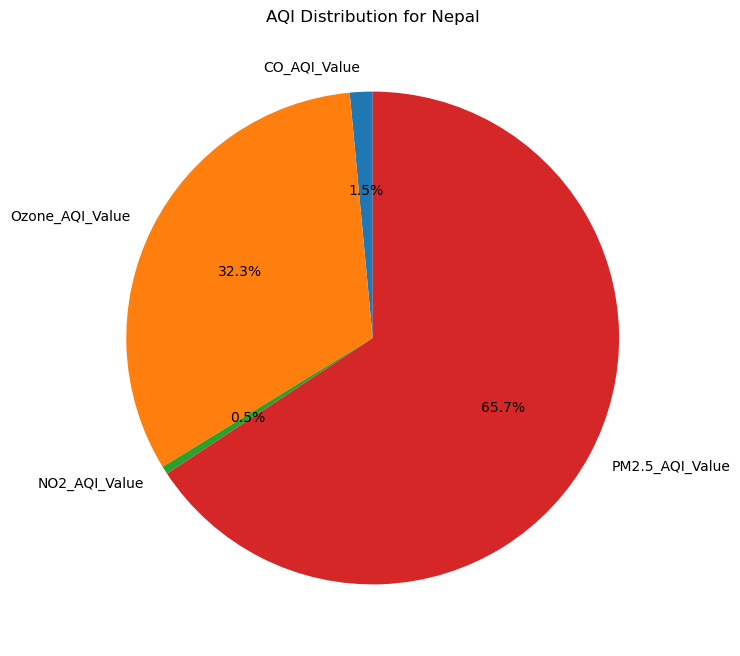

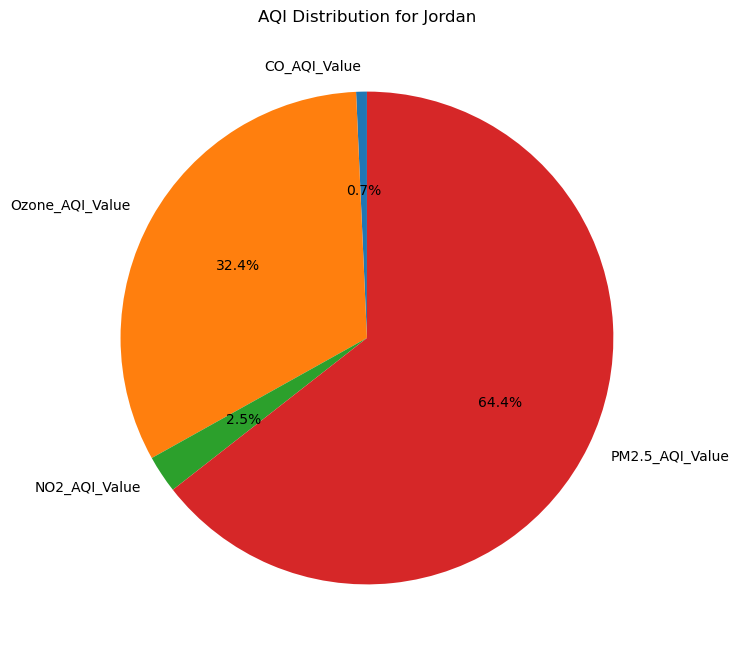

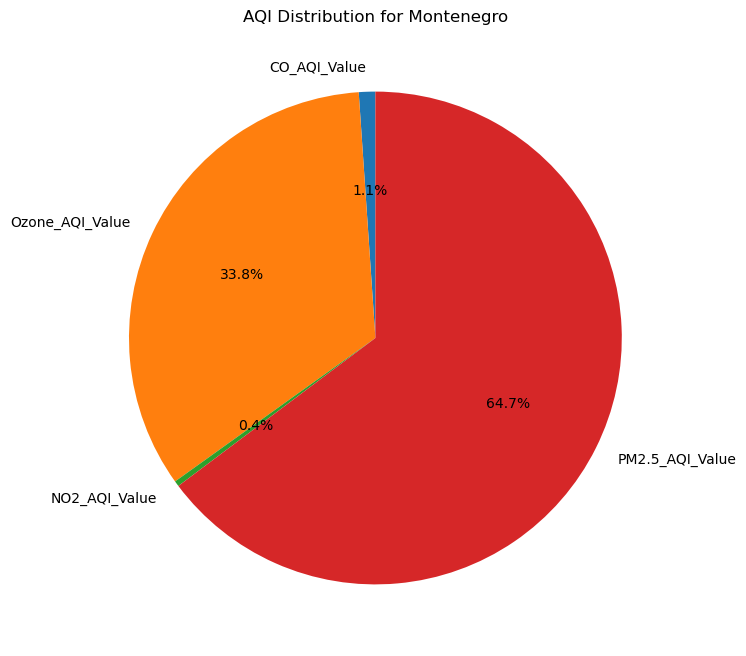

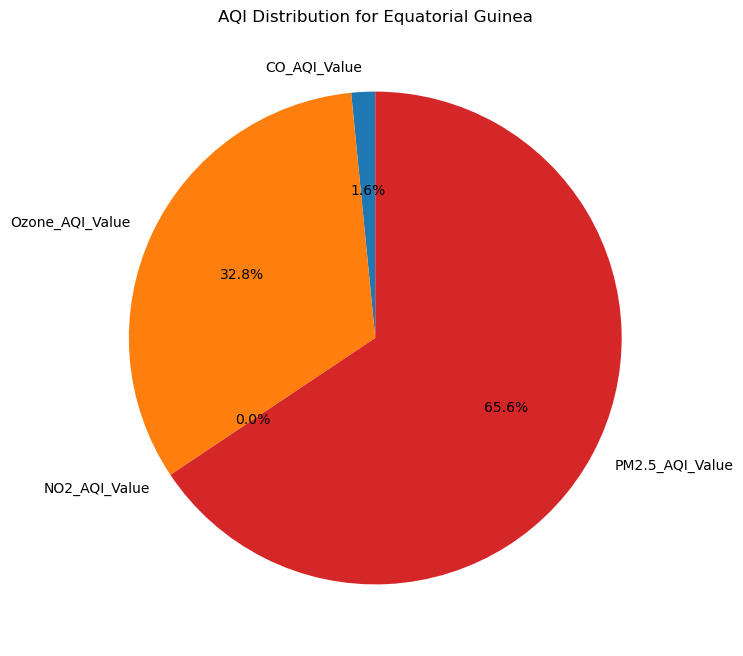

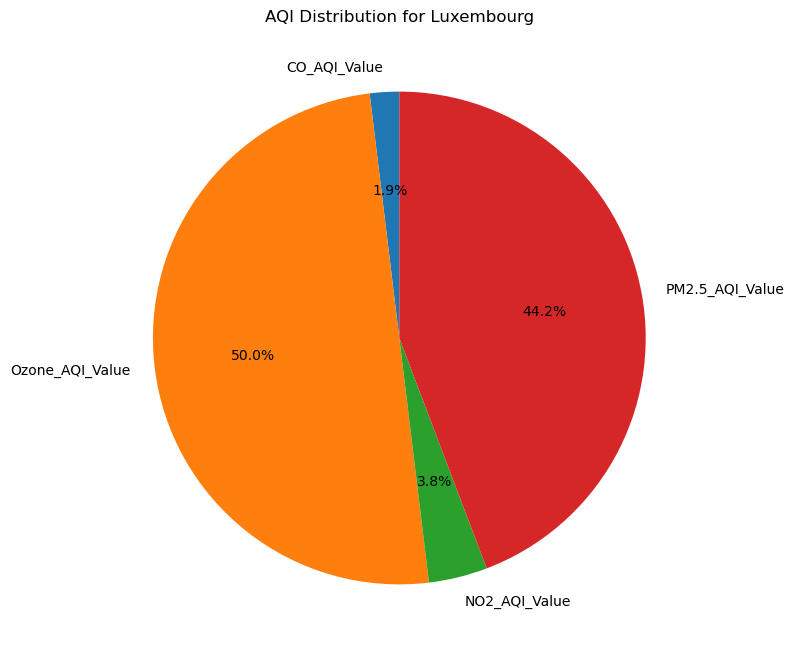

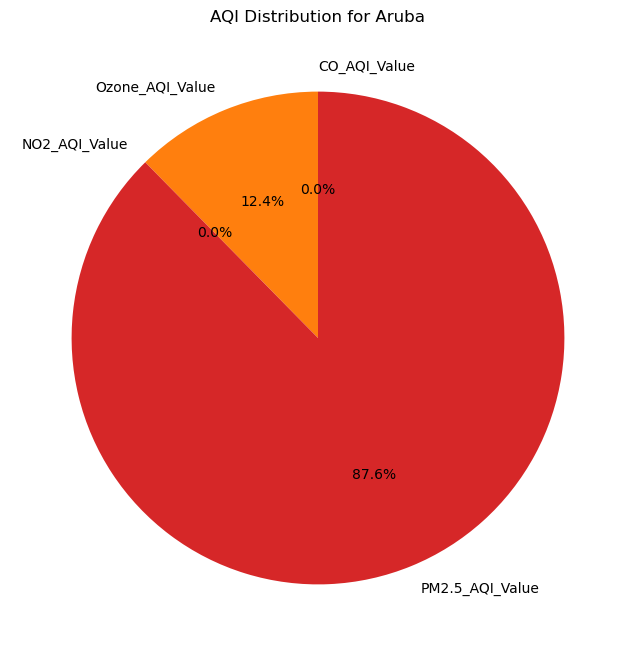

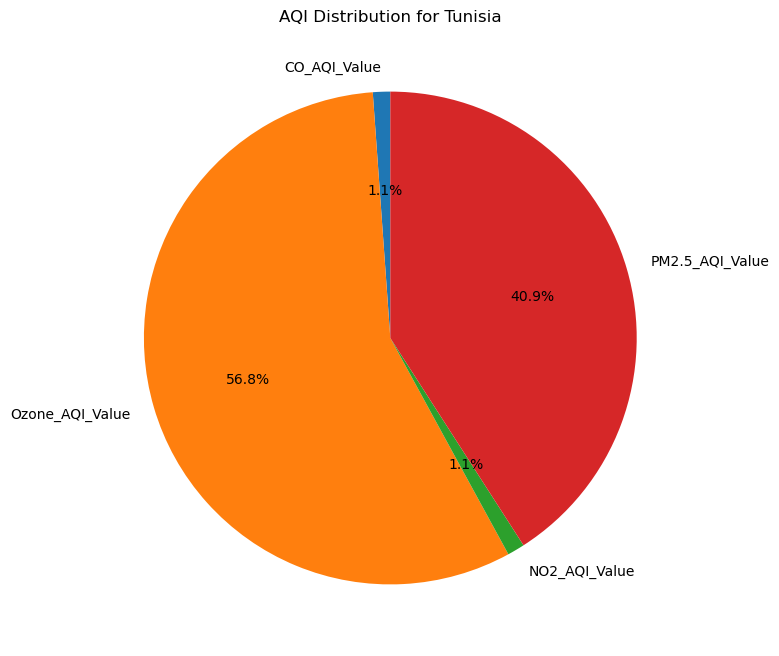

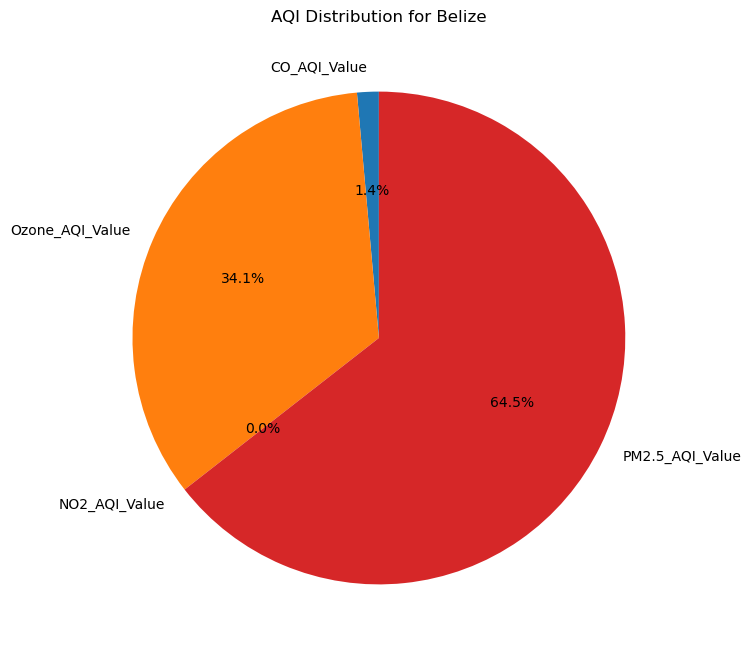

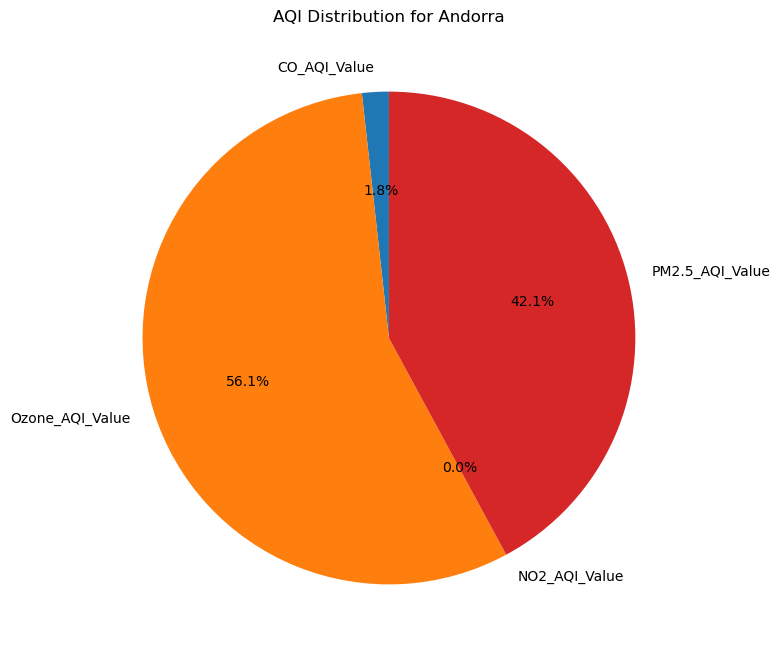

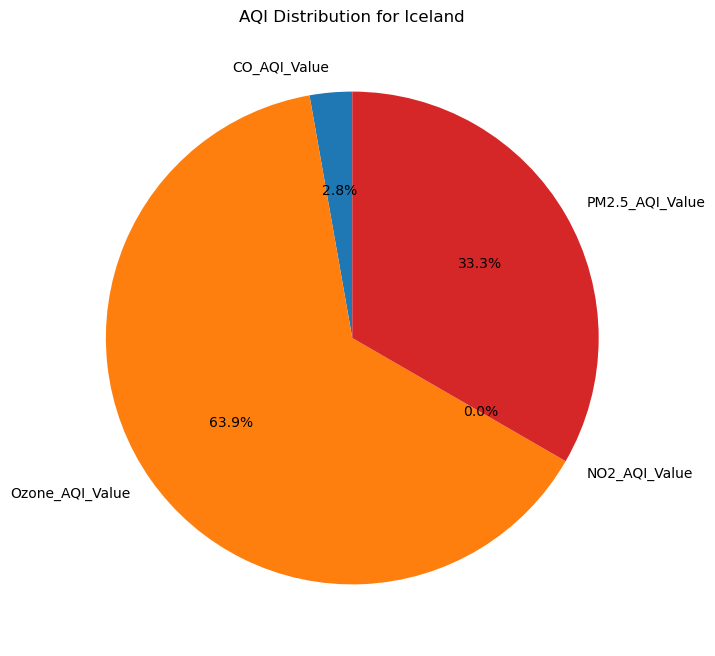

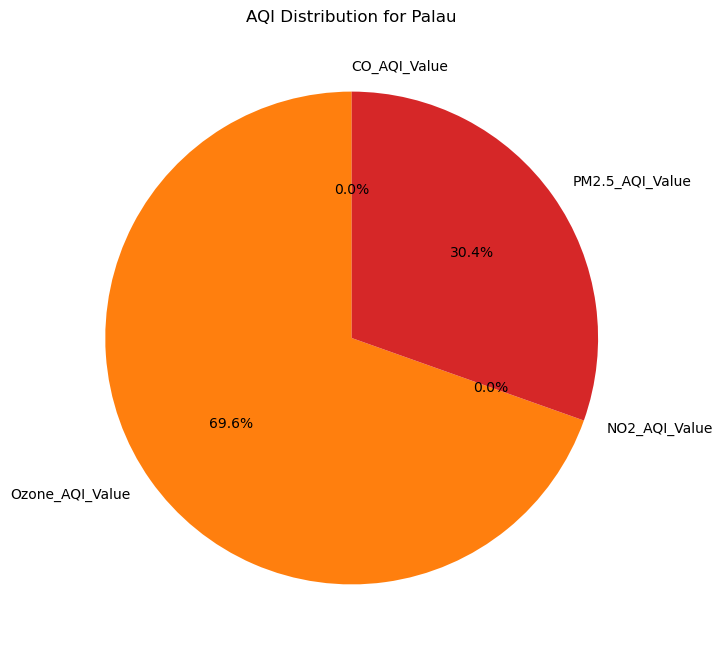

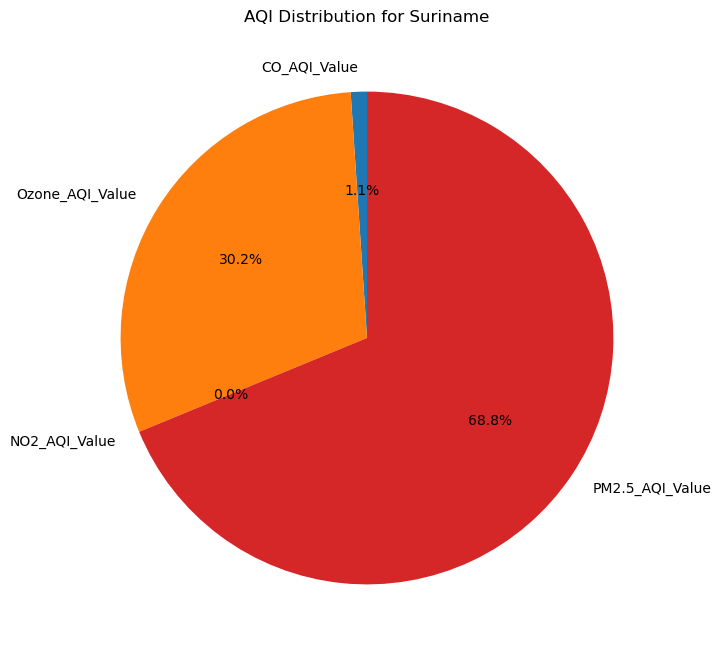

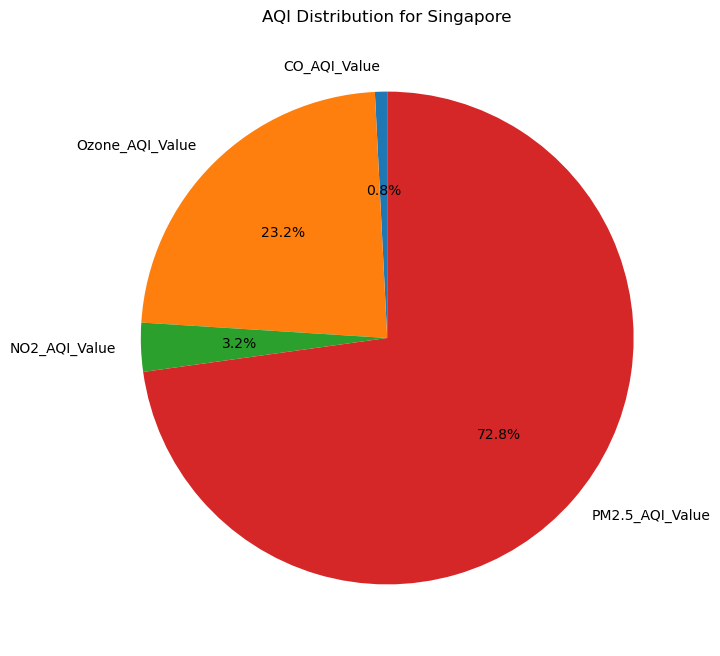

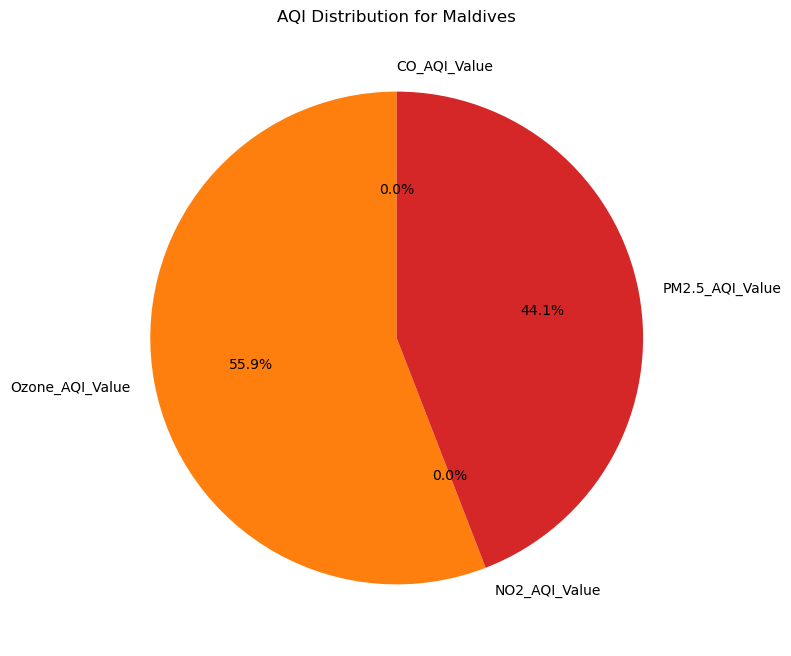

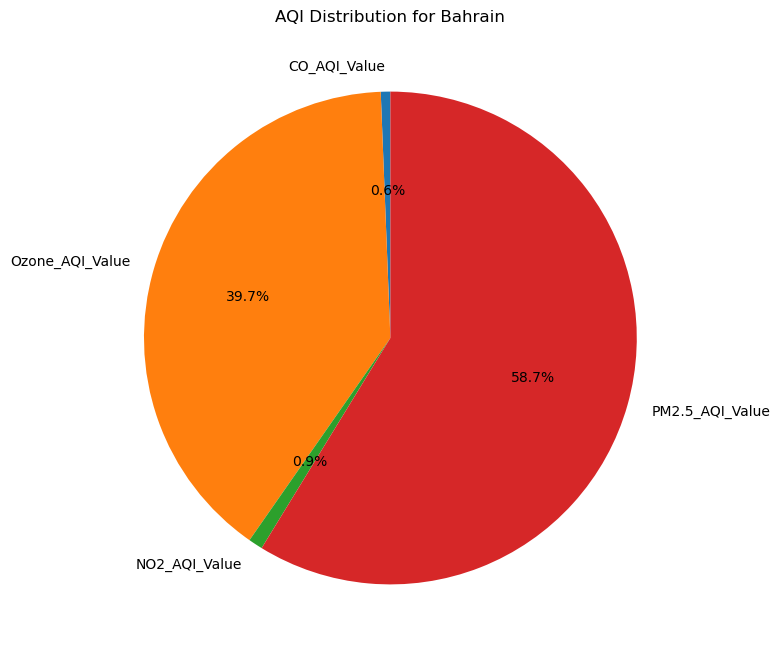

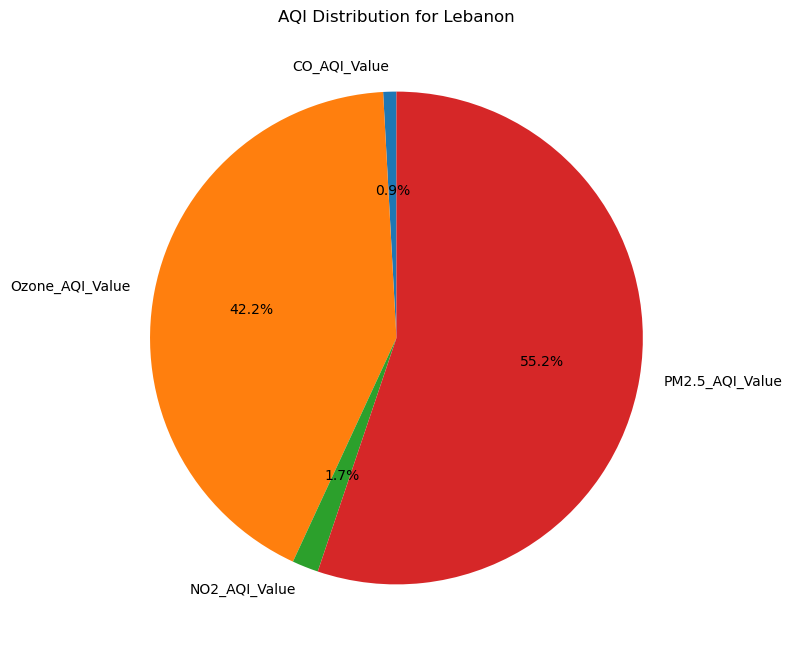

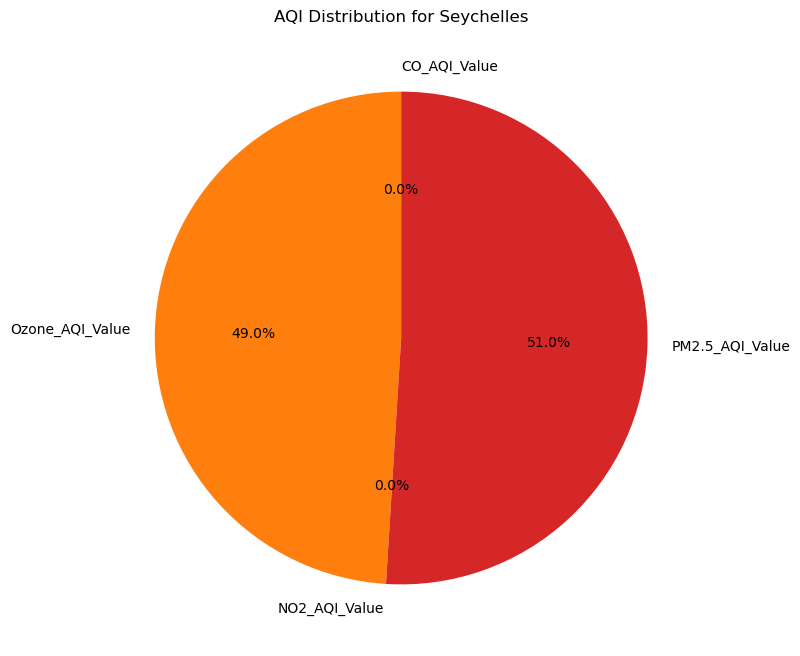

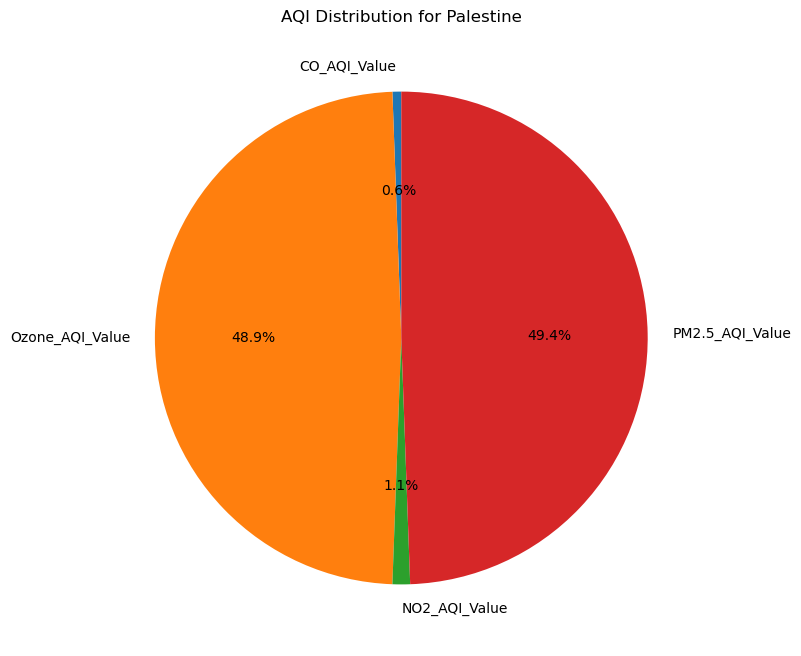

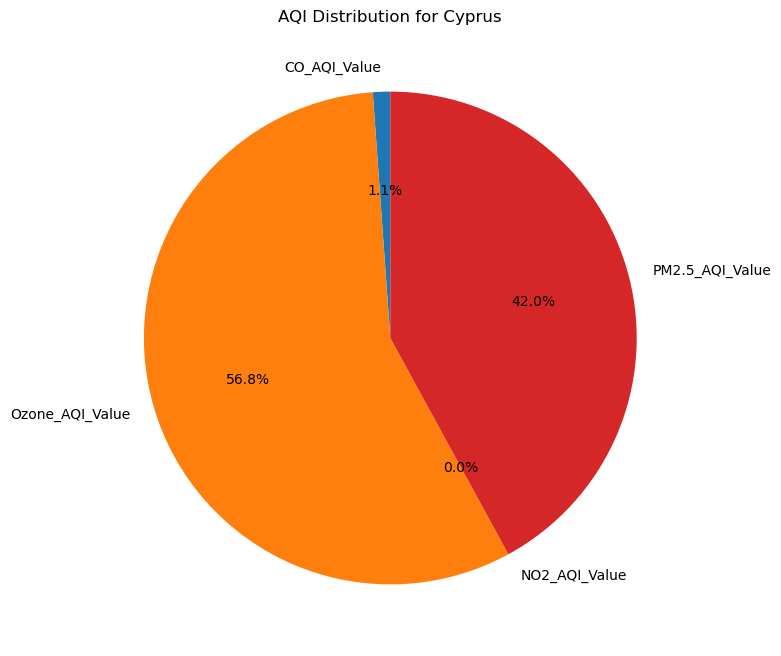

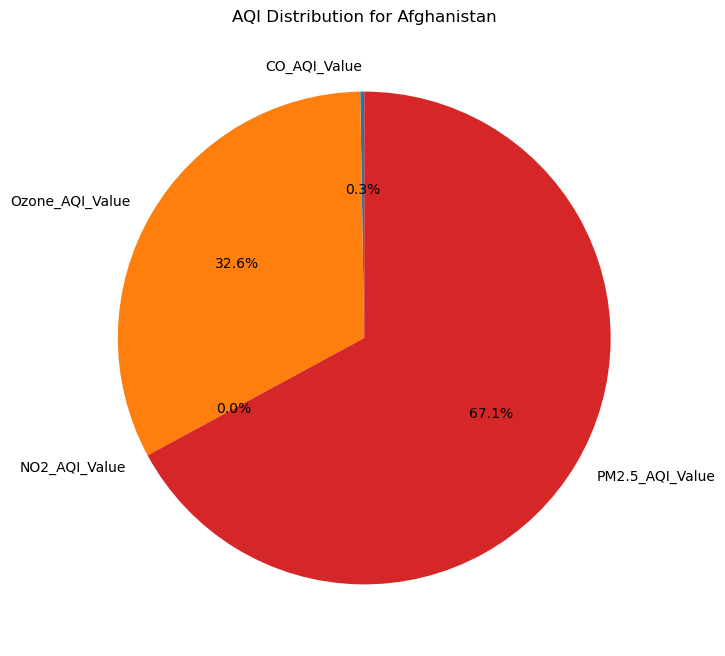

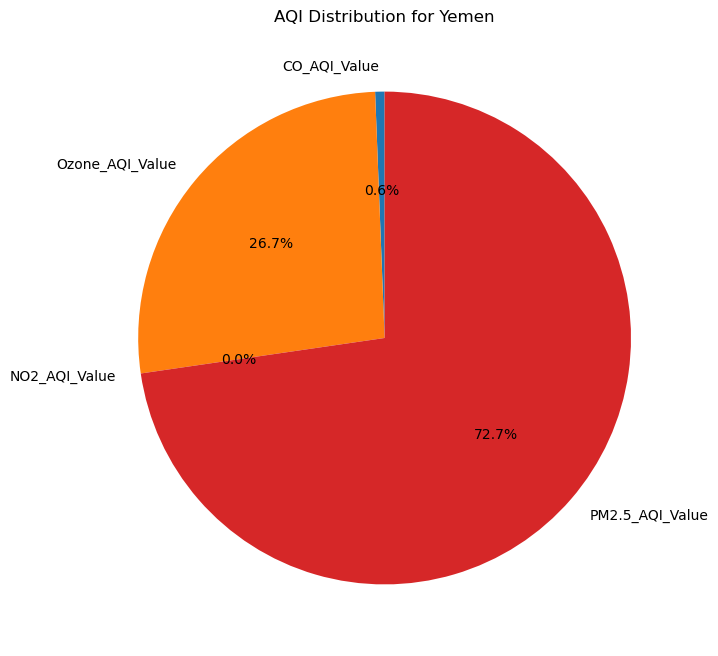

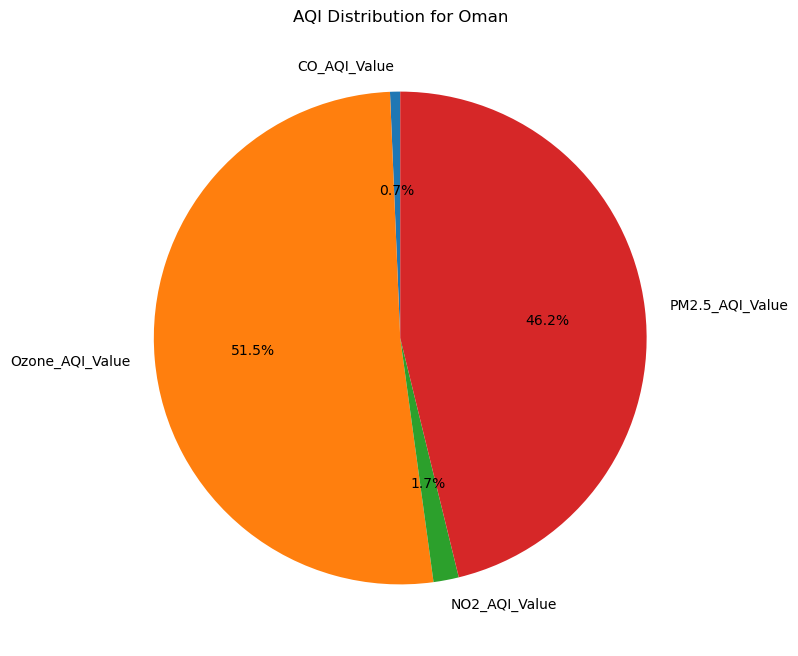

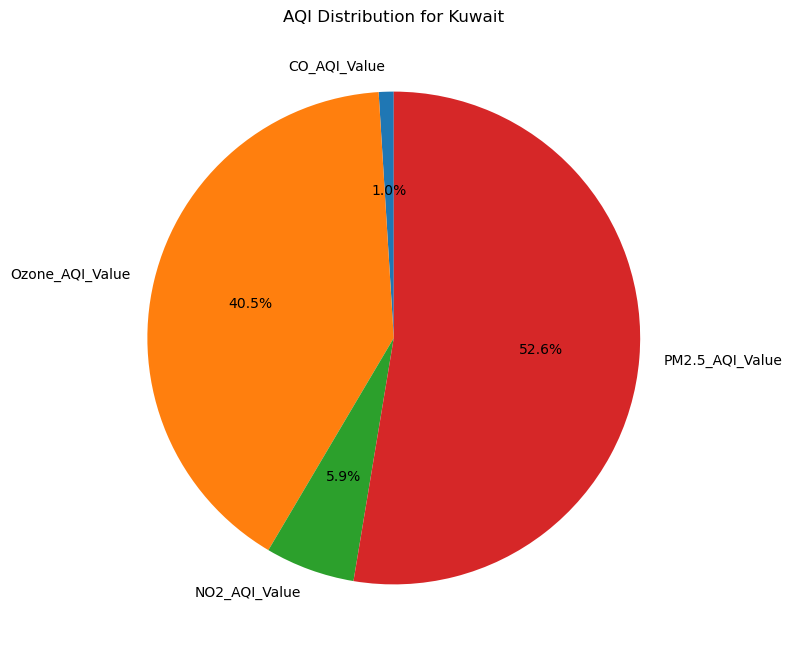

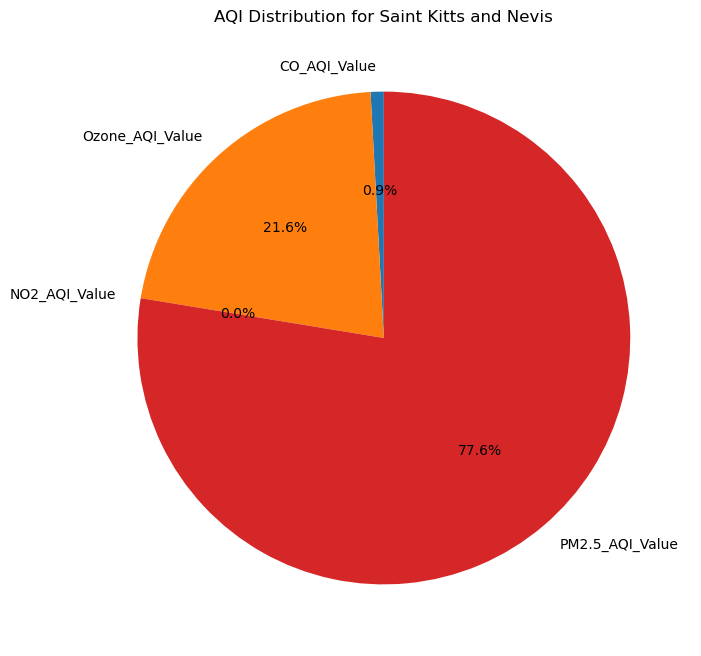

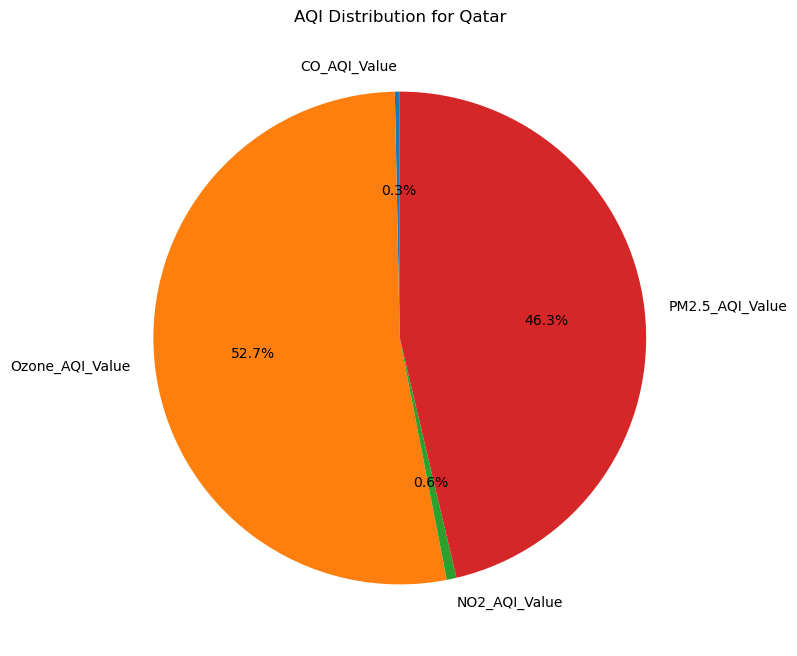

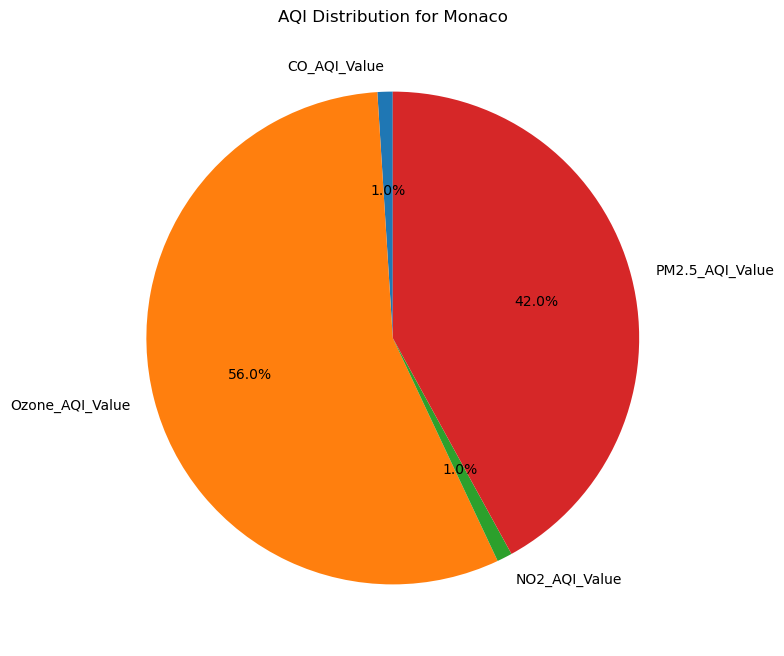

In [24]:
for country in cities_continents_merged['Country'].unique():
    country_data = cities_continents_merged[cities_continents_merged['Country'] == country][['CO_AQI_Value',
    'Ozone_AQI_Value', 'NO2_AQI_Value', 'PM2.5_AQI_Value']].sum()
    
    plt.figure(figsize=(8, 8))
    plt.pie(country_data, labels=country_data.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'AQI Distribution for {country}')
    plt.show()

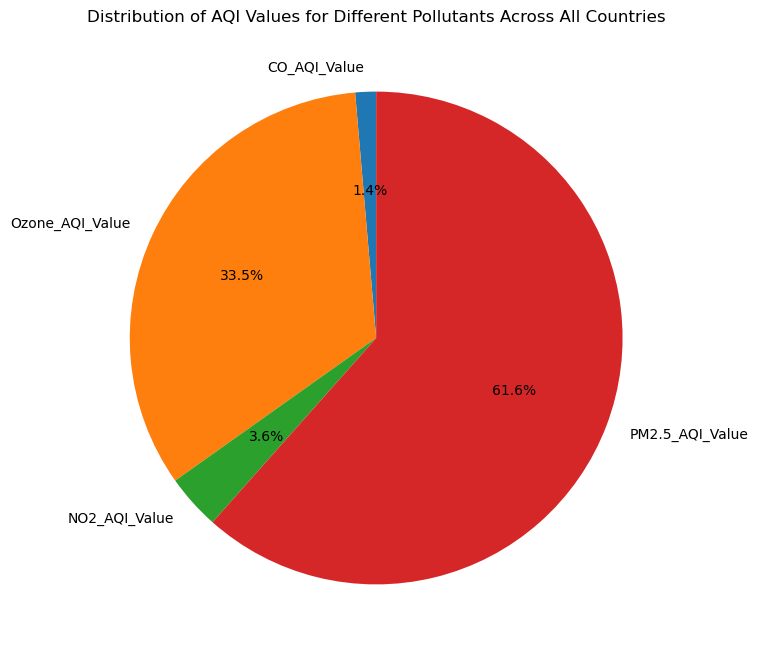

In [19]:
pollutant_totals = cities_continents_merged[['CO_AQI_Value', 'Ozone_AQI_Value', 'NO2_AQI_Value', 'PM2.5_AQI_Value']].sum()
# Step 2: Create a pie chart that shows the percentage distribution of each pollutant across the entire dataset
plt.figure(figsize=(8, 8))  # Optional: Adjust the figure size
plt.pie(pollutant_totals, labels=pollutant_totals.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of AQI Values for Different Pollutants Across All Countries')

# Display the pie chart
plt.show()

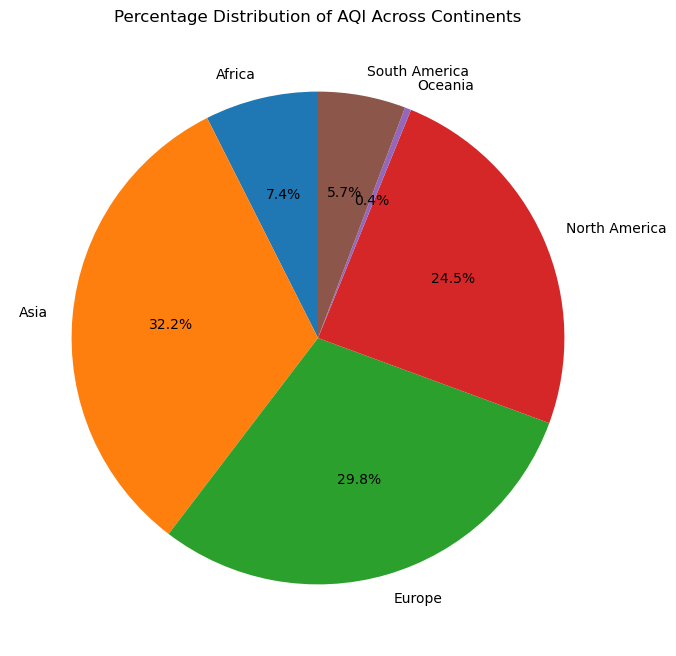

In [20]:
cities_continents_merged['Total_AQI'] = cities_continents_merged[['CO_AQI_Value', 'Ozone_AQI_Value', 'NO2_AQI_Value', 'PM2.5_AQI_Value']].sum(axis=1)

# Step 2: Group by 'Continent' and sum the 'Total_AQI' values across countries
continent_aqi = cities_continents_merged.groupby('Continent')['Total_AQI'].sum()

# Step 3: Create the pie chart
plt.figure(figsize=(8, 8))  # Optional: Adjust the figure size
plt.pie(continent_aqi, labels=continent_aqi.index, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Percentage Distribution of AQI Across Continents')

# Display the pie chart
plt.show()

In [38]:
lowest_aqi = float('inf') 
winner = []  

for index, row in cities_continents_merged.iterrows():
    country = row['Country']  
    air_quality_value = row['Air_Quality_Value'] 

    if air_quality_value < lowest_aqi:
        winner = [country]  # Reset winners list if a new highest AQI is found
        lowest_aqi = air_quality_value
    elif air_quality_value == lowest_aqi:
        winner.append(country)  # Add the country if there's a tie

# Print all countries with the highest AQI
print(f"Countries with the lowest AQI: {', '.join(winner)}, Air Quality Value: {lowest_aqi}")

Countries with the lowest AQI: Ecuador, Air Quality Value: 7


In [41]:
highest_aqi = 0 
loser = []  

for index, row in cities_continents_merged.iterrows():
    country = row['Country']  
    air_quality_value = row['Air_Quality_Value'] 

    if air_quality_value > highest_aqi:
        loser = [country]  # Reset winners list if a new highest AQI is found
        highest_aqi = air_quality_value
    elif air_quality_value == highest_aqi:
        loser.append(country)  # Add the country if there's a tie

# Print all countries with the highest AQI
print(f"Countries with the highest AQI: {', '.join(loser)}, Air Quality Value: {highest_aqi}")

Countries with the highest AQI: Pakistan, Pakistan, India, India, India, India, United States, India, India, India, India, India, India, India, India, India, India, South Africa, India, India, Russia, Air Quality Value: 500


In [46]:
# Sorting the cities by AQI in descending order (most polluted first)
sorted_cities = cities_continents_merged.sort_values(by='Air_Quality_Value', ascending=True)

# Show the top 10 most polluted cities
top_10_most_polluted = sorted_cities.head(20)

# Show the bottom 10 least polluted cities
top_10_least_polluted = sorted_cities.tail(20)

# Print the leaderboard
print("\nTop 20 Least Polluted Cities:")
for index, row in top_10_most_polluted.iterrows():
    print(f"{row['City']}, {row['Country']} - AQI: {row['Air_Quality_Value']}")

print("\nTop 20 Most Polluted Cities:")
for index, row in top_10_least_polluted.iterrows():
    print(f"{row['City']}, {row['Country']} - AQI: {row['Air_Quality_Value']}")


Top 20 Least Polluted Cities:
Macas, Ecuador - AQI: 7
Tari, Papua New Guinea - AQI: 8
Azogues, Ecuador - AQI: 8
Huaraz, Peru - AQI: 9
Huancavelica, Peru - AQI: 10
Manokwari, Indonesia - AQI: 10
Nueva Loja, Ecuador - AQI: 10
Andradina, Brazil - AQI: 11
Mendi, Papua New Guinea - AQI: 11
Nazca, Peru - AQI: 11
Comodoro Rivadavia, Argentina - AQI: 11
Mount Hagen, Papua New Guinea - AQI: 11
La Rioja, Argentina - AQI: 11
Puerto Madryn, Argentina - AQI: 11
Huamachuco, Peru - AQI: 11
Correntina, Brazil - AQI: 11
Young, Uruguay - AQI: 11
Puquio, Peru - AQI: 11
Uyuni, Bolivia (Plurinational State of) - AQI: 12
General Roca, Argentina - AQI: 12

Top 20 Most Polluted Cities:
Mahendragarh, India - AQI: 500
Phalodi, India - AQI: 500
Ratangarh, India - AQI: 500
Jalalabad, India - AQI: 500
Maur, India - AQI: 500
Boksburg, South Africa - AQI: 500
Tynda, Russia - AQI: 500
Etah, India - AQI: 500
Delhi, India - AQI: 500
Durango, United States - AQI: 500
Pokaran, India - AQI: 500
Nohar, India - AQI: 500
Ha

In [53]:
# Sorting the cities by AQI in ascending order (least polluted first)
sorted_cities = cities_continents_merged.sort_values(by='Air_Quality_Value', ascending=True)

# Show the top 20 most polluted cities (highest AQI)
top_20_most_polluted = sorted_cities.tail(20)

# Show the top 20 least polluted cities (lowest AQI)
top_20_least_polluted = sorted_cities.head(20)

# Combine the DataFrames (optional)
pollution_leaderboard = pd.concat([top_20_most_polluted, top_20_least_polluted], keys=["Most Polluted", "Least Polluted"])

# Apply some styling with softer colors
styled_leaderboard = pollution_leaderboard[['City', 'Country', 'Air_Quality_Value']].style.applymap(
    lambda x: 'background-color: #ffcccc' if x > 150 else 'background-color: #d4f8e8' if x < 50 else '', subset=['Air_Quality_Value']
).set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#4CAF50'), ('color', 'white'), ('font-weight', 'bold')]},
    {'selector': 'tbody td', 'props': [('text-align', 'center'), ('font-size', '14px')]},
    {'selector': 'table', 'props': [('border-collapse', 'collapse'), ('width', '100%')]},
    {'selector': 'tr:nth-child(odd)', 'props': [('background-color', '#f2f2f2')]},  # Stripe the rows
    {'selector': 'tr:nth-child(even)', 'props': [('background-color', 'white')]},
])

# Display the styled DataFrame
styled_leaderboard

C:\Users\vsanh\AppData\Local\Temp\ipykernel_5716\979648107.py:14: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_leaderboard = pollution_leaderboard[['City', 'Country', 'Air_Quality_Value']].style.applymap(
